In [81]:
#importing dependencies
import pandas as pd
import numpy as np
from numpy import mean
from numpy import std
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso,LassoCV,Ridge,RidgeCV
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report, accuracy_score
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.utils import resample
from collections import Counter
from imblearn.over_sampling import SMOTE
from matplotlib import pyplot
from xgboost import XGBRegressor
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor




from sklearn import metrics
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder
from scipy.stats import boxcox

from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import GridSearchCV as gs
from sklearn.model_selection import RandomizedSearchCV as rs

import pickle


In [82]:
#converting csv file into DataFrame
house_train=pd.read_csv('train.csv')
house_test=pd.read_csv('test.csv')

# Exploratory Analysis

In [83]:
#checking the shape of the train and test data
print('train shape :',house_train.shape)
print('test shape :',house_test.shape)

train shape : (1168, 81)
test shape : (292, 80)


In [84]:
house_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1168 entries, 0 to 1167
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1168 non-null   int64  
 1   MSSubClass     1168 non-null   int64  
 2   MSZoning       1168 non-null   object 
 3   LotFrontage    954 non-null    float64
 4   LotArea        1168 non-null   int64  
 5   Street         1168 non-null   object 
 6   Alley          77 non-null     object 
 7   LotShape       1168 non-null   object 
 8   LandContour    1168 non-null   object 
 9   Utilities      1168 non-null   object 
 10  LotConfig      1168 non-null   object 
 11  LandSlope      1168 non-null   object 
 12  Neighborhood   1168 non-null   object 
 13  Condition1     1168 non-null   object 
 14  Condition2     1168 non-null   object 
 15  BldgType       1168 non-null   object 
 16  HouseStyle     1168 non-null   object 
 17  OverallQual    1168 non-null   int64  
 18  OverallC

In [85]:
house_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 292 entries, 0 to 291
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             292 non-null    int64  
 1   MSSubClass     292 non-null    int64  
 2   MSZoning       292 non-null    object 
 3   LotFrontage    247 non-null    float64
 4   LotArea        292 non-null    int64  
 5   Street         292 non-null    object 
 6   Alley          14 non-null     object 
 7   LotShape       292 non-null    object 
 8   LandContour    292 non-null    object 
 9   Utilities      292 non-null    object 
 10  LotConfig      292 non-null    object 
 11  LandSlope      292 non-null    object 
 12  Neighborhood   292 non-null    object 
 13  Condition1     292 non-null    object 
 14  Condition2     292 non-null    object 
 15  BldgType       292 non-null    object 
 16  HouseStyle     292 non-null    object 
 17  OverallQual    292 non-null    int64  
 18  OverallCon

In [86]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [87]:
#checking for null values in the data
house_train.isnull().sum()

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       214
LotArea             0
Street              0
Alley            1091
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          7
MasVnrArea          7
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           30
BsmtCond           30
BsmtExposure       31
BsmtFinType1       30
BsmtFinSF1          0
BsmtFinType2       31
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          0
1stFlrSF            0
2ndFlrSF            0
LowQualFin

In [88]:
house_test.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage       45
LotArea            0
Street             0
Alley            278
LotShape           0
LandContour        0
Utilities          0
LotConfig          0
LandSlope          0
Neighborhood       0
Condition1         0
Condition2         0
BldgType           0
HouseStyle         0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
RoofStyle          0
RoofMatl           0
Exterior1st        0
Exterior2nd        0
MasVnrType         1
MasVnrArea         1
ExterQual          0
ExterCond          0
Foundation         0
BsmtQual           7
BsmtCond           7
BsmtExposure       7
BsmtFinType1       7
BsmtFinSF1         0
BsmtFinType2       7
BsmtFinSF2         0
BsmtUnfSF          0
TotalBsmtSF        0
Heating            0
HeatingQC          0
CentralAir         0
Electrical         1
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath 

1. Size of the data is small contains only 1168 and 292 rows in train and test respectively
2. Dataset contains 81 for train set and 80 for for test set. SalePrice is the target column. 
3. Data contains Null Values in both Train and Test Data
4. Data contains both numerical and ordinal data.  

**Replacing null values with appropriate values** 

In [89]:
house_train['FireplaceQu'].value_counts()

Gd    301
TA    252
Fa     25
Ex     21
Po     18
Name: FireplaceQu, dtype: int64

In [90]:
house_train['Fireplaces'].value_counts()

0    551
1    518
2     94
3      5
Name: Fireplaces, dtype: int64

FireplaceQu has 551 null values in it. FireplaceQu says about the quality of fireplace in the house.

In [91]:
#getting just the null values data to observe it Fireplaces columns
index=[]
for i in range(house_train.shape[0]):
    if house_train['FireplaceQu'].isnull().iloc[i]:
        index.append(i)

In [92]:
inital=index[0:10]
new=[]
for i in inital:
    new.append(house_train.iloc[i])

In [93]:
pd.DataFrame(new)

Id  MSSubClass MSZoning  LotFrontage  LotArea Street  Alley LotShape  \
8    503          20       RL         70.0     9170   Pave    NaN      Reg   
9    576          50       RL         80.0     8480   Pave    NaN      Reg   
12   277          20       RL        129.0     9196   Pave    NaN      IR1   
13    84          20       RL         80.0     8892   Pave    NaN      IR1   
14   888          50       RL         59.0    16466   Pave    NaN      IR1   
16  1154          30       RM          NaN     5890   Pave    NaN      Reg   
17   728          20       RL         64.0     7314   Pave    NaN      Reg   
19  1105         160       RM         24.0     2016   Pave    NaN      Reg   
21  1407          85       RL         70.0     8445   Pave    NaN      Reg   
22  1459          20       RL         68.0     9717   Pave    NaN      Reg   

   LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
8          Lvl    AllPub    Corner       Gtl      Edwards      Feedr   
9          Lvl    AllPub    Inside       Gtl        NAmes       Norm   
12         Lvl    AllPub    Inside       Gtl      Mitchel       Norm   
13         Lvl    AllPub    Inside       Gtl        NAmes       Norm   
14         Lvl    AllPub    Inside       Gtl      Edwards       Norm   
16         Lvl    AllPub    Corner       Gtl       IDOTRR       Norm   
17         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
19         Lvl    AllPub    Inside       Gtl       BrDale       Norm   
21         Lvl    AllPub    Corner       Gtl      CollgCr       Norm   
22         Lvl    AllPub    Inside       Gtl        NAmes       Norm   

   Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
8        Norm     1Fam     1Story            5            7       1965   
9        Norm     1Fam     1.5Fin            5            5       1947   
12       Norm     1Fam     1Story            7            5       2003   
13       Norm     1Fam     1Story            5            5       1960   
14       Norm     1Fam     1.5Fin            5            7       1955   
16       Norm     1Fam     1Story            6            8       1930   
17       Norm     1Fam     1Story            7            5       2007   
19       Norm   TwnhsE     2Story            5            5       1970   
21       Norm     1Fam     SFoyer            5            7       1972   
22       Norm     1Fam     1Story            5            6       1950   

    YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
8           1965       Hip  CompShg     MetalSd     MetalSd       None   
9           1950     Gable  CompShg     MetalSd     MetalSd       None   
12          2003     Gable  CompShg     VinylSd     VinylSd       None   
13          1960     Gable  CompShg     MetalSd     MetalSd     BrkCmn   
14          1955     Gable  CompShg     MetalSd     MetalSd       None   
16          2007     Gable  CompShg     Wd Sdng     Wd Sdng       None   
17          2007     Gable  CompShg     VinylSd     VinylSd      Stone   
19          1970     Gable  CompShg     HdBoard     HdBoard    BrkFace   
21          2007     Gable  CompShg     HdBoard     Wd Shng       None   
22          1996       Hip  CompShg     MetalSd     MetalSd       None   

    MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
8          0.0        TA        TA     CBlock       TA       TA           No   
9          0.0        TA        TA     CBlock       TA       TA           No   
12         0.0        Gd        TA      PConc       Ex       TA           No   
13        66.0        TA        TA     CBlock       TA       TA           No   
14         0.0        TA        Gd      PConc       TA       TA           No   
16         0.0        Gd        Gd     BrkTil       TA       TA           Av   
17        82.0        Gd        TA      PConc       Gd       TA           Av   
19       304.0        TA        TA     CBlock       TA       TA           No   
21  

As we can see all the NAN values in the FireplaceQu have 0 as its correspondent element in Fireplace Columns, so we can replace it with Not available and also columns named ID, Alley, PoolQC, Fence, MiscFeature have way too much of null values so drop them as replacing null values will make the data heavily biased

In [94]:
#dropping columns with huge numbers of missing values
house_train.drop(columns=['Id','Alley','PoolQC','Fence','MiscFeature'],inplace=True)
house_test.drop(columns=['Id','Alley','PoolQC','Fence','MiscFeature'],inplace=True)

In [95]:
#replacing null values FireplaceQu with NA 
house_train['FireplaceQu']= house_train['FireplaceQu'].fillna('NA')

In [96]:
house_train['FireplaceQu'].value_counts()

NA    551
Gd    301
TA    252
Fa     25
Ex     21
Po     18
Name: FireplaceQu, dtype: int64

In [97]:
#following the same about procedure for test dataset
house_test['FireplaceQu']= house_test['FireplaceQu'].fillna('NA')

In [98]:
#checking the unique number of elements for columns containing null values 
train_null_columns=[]
test_null_columns=[]
print('\033[1m'+'HOUSE TRAIN NULL value unique no. of elements DATA'+'\033[1m')
for i in house_train:
    x=house_train[i].isnull().sum()
    if x!=0:
        print(i,house_train[i].nunique(),'\n')
        train_null_columns.append(i)
print('\033[1m'+'HOUSE Test NULL value unique no. of elements DATA'+'\033[1m')
for i in house_test:
    x=house_test[i].isnull().sum()
    if x!=0:
        print(i,house_test[i].nunique(),'\n')
        test_null_columns.append(i)

HOUSE TRAIN NULL value unique no. of elements DATA
LotFrontage 106 

MasVnrType 4 

MasVnrArea 283 

BsmtQual 4 

BsmtCond 4 

BsmtExposure 4 

BsmtFinType1 6 

BsmtFinType2 6 

GarageType 6 

GarageYrBlt 97 

GarageFinish 3 

GarageQual 5 

GarageCond 5 

HOUSE Test NULL value unique no. of elements DATA
LotFrontage 65 

MasVnrType 4 

MasVnrArea 104 

BsmtQual 4 

BsmtCond 3 

BsmtExposure 4 

BsmtFinType1 6 

BsmtFinType2 6 

Electrical 4 

GarageType 6 

GarageYrBlt 71 

GarageFinish 3 

GarageQual 5 

GarageCond 5 



In [99]:
#getting count of each unique values in the columns containing null values
for i in train_null_columns:
    y=house_train[i].nunique()
    if y<=6:
         print(house_train[i].value_counts(),'\n')
    

None       696
BrkFace    354
Stone       98
BrkCmn      13
Name: MasVnrType, dtype: int64 

TA    517
Gd    498
Ex     94
Fa     29
Name: BsmtQual, dtype: int64 

TA    1041
Gd      56
Fa      39
Po       2
Name: BsmtCond, dtype: int64 

No    756
Av    180
Gd    108
Mn     93
Name: BsmtExposure, dtype: int64 

Unf    345
GLQ    330
ALQ    174
BLQ    121
Rec    109
LwQ     59
Name: BsmtFinType1, dtype: int64 

Unf    1002
Rec      43
LwQ      40
BLQ      24
ALQ      16
GLQ      12
Name: BsmtFinType2, dtype: int64 

Attchd     691
Detchd     314
BuiltIn     70
Basment     16
CarPort      8
2Types       5
Name: GarageType, dtype: int64 

Unf    487
RFn    339
Fin    278
Name: GarageFinish, dtype: int64 

TA    1050
Fa      39
Gd      11
Ex       2
Po       2
Name: GarageQual, dtype: int64 

TA    1061
Fa      28
Gd       8
Po       6
Ex       1
Name: GarageCond, dtype: int64 



In [100]:
#getting null values index of the rows columns nan in garagetype column
index1=[]
for i in range(house_train.shape[0]):
    if house_train['GarageType'].isnull().iloc[i]:
        index1.append(i)
inital1=index1[0:10]
new1=[]
for i in inital1:
    new1.append(house_train.iloc[i])

In [101]:
pd.DataFrame(new1)

MSSubClass MSZoning  LotFrontage  LotArea Street LotShape LandContour  \
48           20       RL         50.0     5000   Pave      Reg         Low   
72          190       RM         60.0     6780   Pave      Reg         Lvl   
74           30       RH         70.0     4270   Pave      Reg         Bnk   
105          20       RL         70.0    10500   Pave      Reg         Lvl   
116          20       RL         63.0     7500   Pave      Reg         Lvl   
123          50       RM          NaN     7920   Pave      IR1         Lvl   
127         190       RL         62.0    10106   Pave      Reg         Lvl   
149          45       RM         50.0     6130   Pave      Reg         Lvl   
180          30       RM         40.0     3636   Pave      Reg         Lvl   
184         190       RL         70.0     7000   Pave      Reg         Lvl   

    Utilities LotConfig LandSlope Neighborhood Condition1 Condition2 BldgType  \
48     AllPub    Inside       Mod      BrkSide       Norm       Norm     1Fam   
72     AllPub    Inside       Gtl       IDOTRR       Norm       Norm   2fmCon   
74     AllPub    Inside       Mod      Edwards       Norm       Norm     1Fam   
105    AllPub       FR2       Gtl        NAmes       Norm       Norm     1Fam   
116    AllPub    Inside       Gtl      SawyerW       Norm       Norm     1Fam   
123    AllPub    Inside       Gtl       IDOTRR     Artery       Norm     1Fam   
127    AllPub    Inside       Gtl      Edwards       Norm       Norm   2fmCon   
149    AllPub    Inside       Gtl      BrkSide       Norm       Norm     1Fam   
180    AllPub    Inside       Gtl       IDOTRR       Norm       Norm     1Fam   
184    AllPub    Inside       Gtl      Edwards       Norm       Norm   2fmCon   

    HouseStyle  OverallQual  OverallCond  YearBuilt  YearRemodAdd RoofStyle  \
48      1Story            1            3       1946          1950     Gable   
72      1.5Fin            6            8       1935          1982     Gable   
74      1Story            3            6       1931          2006     Gable   
105     1Story            4            5       1971          1971     Gable   
116     1Story            7            5       2004          2005     Gable   
123     1.5Fin            6            7       1920          1950     Gable   
127     1.5Fin            5            7       1940          1999     Gable   
149     1.5Unf            5            6       1924          1950     Gable   
180     1Story            4            4       1922          1950     Gable   
184     2Story            5            7       1910          1991     Gable   

    RoofMatl Exterior1st Exterior2nd MasVnrType  MasVnrArea ExterQual  \
48   CompShg     VinylSd     VinylSd       None         0.0        Fa   
72   CompShg     Wd Sdng     Wd Sdng       None         0.0        TA   
74   CompShg     MetalSd     MetalSd       None         0.0        TA   
105  CompShg     HdBoard     HdBoard       None         0.0        TA   
116  CompShg     VinylSd     VinylSd    BrkFace       120.0        TA   
123  CompShg     MetalSd     MetalSd       None         0.0        TA   
127  CompShg     Wd Sdng     Wd Sdng       None         0.0        TA   
149  CompShg     MetalSd     MetalSd       None         0.0        TA   
180  CompShg     AsbShng     AsbShng       None         0.0        TA   
184  CompShg     MetalSd     MetalSd       None         0.0        TA   

    ExterCond Foundation BsmtQual BsmtCond BsmtExposure BsmtFinType1  \
48         Fa       Slab      NaN      NaN          NaN          NaN   
72         Fa     CBlock       TA       TA           Av          GLQ   
74         TA     BrkTil       TA       TA           No          Rec   
105        TA     CBlock       TA       TA           No          ALQ   
116        TA      PConc       Gd       TA           No          GLQ   
123        Fa     CBlock       TA       TA           No          Unf   
127        Gd     BrkTil       TA       TA           No          ALQ   
149 

For the columns GarageType, GarageYrBlt, GarageFinish, GarageQual and GarageCond having NaN values have GarageArea zero which means there is no garage for these house. Hence replacing the NaN as NA (Not Available)

In [102]:
house_train['GarageType']= house_train['GarageType'].fillna('NA')
house_train['GarageYrBlt']= house_train['GarageYrBlt'].fillna('NA')
house_train['GarageFinish']= house_train['GarageFinish'].fillna('NA')
house_train['GarageQual']= house_train['GarageQual'].fillna('NA')
house_train['GarageCond']= house_train['GarageCond'].fillna('NA')

In [103]:
house_test['GarageType']= house_test['GarageType'].fillna('NA')
house_test['GarageYrBlt']= house_test['GarageYrBlt'].fillna('NA')
house_test['GarageFinish']= house_test['GarageFinish'].fillna('NA')
house_test['GarageQual']= house_test['GarageQual'].fillna('NA')
house_test['GarageCond']= house_test['GarageCond'].fillna('NA')

In [104]:
#getting null values index of the rows columns nan in BsmtQual column
index2=[]
for i in range(house_train.shape[0]):
    if house_train['BsmtQual'].isnull().iloc[i]:
        index2.append(i)
inital2=index2[0:10]
new2=[]
for i in inital2:
    new2.append(house_train.iloc[i])

In [105]:
pd.DataFrame(new2)

MSSubClass MSZoning  LotFrontage  LotArea Street LotShape LandContour  \
34           60       RL          NaN    14762   Pave      IR2         Lvl   
48           20       RL         50.0     5000   Pave      Reg         Low   
54           20       RL         60.0    11100   Pave      Reg         Low   
60           20       RL         60.0     7200   Pave      Reg         Lvl   
86           20       RL         60.0     7200   Pave      Reg         Lvl   
96           90       RH         60.0     8400   Pave      Reg         Lvl   
124          20       RL         60.0     7200   Pave      Reg         Lvl   
137          20       RL          NaN     8339   Pave      IR1         Lvl   
159          20       RL          NaN     6627   Pave      IR1         Lvl   
226          20       RL         60.0     9060   Pave      Reg         Lvl   

    Utilities LotConfig LandSlope Neighborhood Condition1 Condition2 BldgType  \
34     AllPub    Corner       Gtl      Gilbert      Feedr       Norm     1Fam   
48     AllPub    Inside       Mod      BrkSide       Norm       Norm     1Fam   
54     AllPub    Inside       Gtl      Edwards       Norm       Norm     1Fam   
60     AllPub    Inside       Gtl        NAmes       Norm       Norm     1Fam   
86     AllPub    Inside       Gtl        NAmes       Norm       Norm     1Fam   
96     AllPub    Inside       Gtl      SawyerW      Feedr       Norm   Duplex   
124    AllPub    Inside       Gtl        NAmes       Norm       Norm     1Fam   
137    AllPub    Inside       Gtl        NAmes       Norm       Norm     1Fam   
159    AllPub    Corner       Gtl      BrkSide      Feedr       Norm     1Fam   
226    AllPub    Inside       Gtl      Edwards     Artery       Norm     1Fam   

    HouseStyle  OverallQual  OverallCond  YearBuilt  YearRemodAdd RoofStyle  \
34      2Story            5            6       1948          1950     Gable   
48      1Story            1            3       1946          1950     Gable   
54      1Story            4            7       1946          2006     Gable   
60      1Story            5            7       1955          2007     Gable   
86      1Story            5            7       1950          1950       Hip   
96      1Story            5            5       1977          1977     Gable   
124     1Story            4            5       1950          1950     Gable   
137     1Story            5            7       1959          1959     Gable   
159     1Story            3            6       1949          1950       Hip   
226     1Story            5            6       1957          2006       Hip   

    RoofMatl Exterior1st Exterior2nd MasVnrType  MasVnrArea ExterQual  \
34   CompShg     Plywood     Plywood       None         0.0        TA   
48   CompShg     VinylSd     VinylSd       None         0.0        Fa   
54   CompShg     MetalSd     MetalSd       None         0.0        TA   
60   CompShg     VinylSd     VinylSd       None         0.0        TA   
86   CompShg     Wd Sdng     Wd Sdng       None         0.0        TA   
96   CompShg     Plywood     Plywood    BrkFace       320.0        TA   
124  CompShg     BrkFace     Wd Sdng       None         0.0        TA   
137  CompShg     MetalSd     MetalSd       None         0.0        TA   
159  CompShg     VinylSd     VinylSd       None         0.0        TA   
226  CompShg     Wd Sdng     Wd Sdng    BrkFace        98.0        TA   

    ExterCond Foundation  BsmtQual  BsmtCond  BsmtExposure  BsmtFinType1  \
34         TA       Slab       NaN       NaN           NaN           NaN   
48         Fa       Slab       NaN       NaN           NaN           NaN   
54         TA     CBlock       NaN       NaN           NaN           NaN   
60         TA       Slab       NaN       NaN           NaN           NaN   
86         TA     CBlock       NaN       NaN           NaN           NaN   
96         TA       Slab       NaN       NaN           NaN           NaN   
124        TA       Slab       NaN       NaN    

For the columns BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1 and BsmtFinType2 having NaN values TotalBsmtArea zero which means there is no basement for these house. Hence replacing the NaN as NA (Not Available)

In [106]:
house_train['BsmtQual']= house_train['BsmtQual'].fillna('NA')
house_train['BsmtCond']= house_train['BsmtCond'].fillna('NA')
house_train['BsmtExposure']= house_train['BsmtExposure'].fillna('NA')
house_train['BsmtFinType1']= house_train['BsmtFinType1'].fillna('NA')
house_train['BsmtFinType2']= house_train['BsmtFinType2'].fillna('NA')

In [107]:
house_test['BsmtQual']= house_test['BsmtQual'].fillna('NA')
house_test['BsmtCond']= house_test['BsmtCond'].fillna('NA')
house_test['BsmtExposure']= house_test['BsmtExposure'].fillna('NA')
house_test['BsmtFinType1']= house_test['BsmtFinType1'].fillna('NA')
house_test['BsmtFinType2']= house_test['BsmtFinType2'].fillna('NA')

In [108]:
#as lotfrontage has more unique value replacing it with the mean value and round them to a whole number
train_value=round(house_train['LotFrontage'].mean())
test_value=round(house_test['LotFrontage'].mean())
house_train['LotFrontage']= house_train['LotFrontage'].fillna(train_value)
house_test['LotFrontage']= house_test['LotFrontage'].fillna(test_value)

In [109]:
index3=[]
for i in range(house_train.shape[0]):
    if house_train['MasVnrType'].isnull().iloc[i]:
        index3.append(i)
inital3=index3[0:10]
new3=[]
for i in inital3:
    new3.append(house_train.iloc[i])
pd.DataFrame(new3)

MSSubClass MSZoning  LotFrontage  LotArea Street LotShape LandContour  \
68           20       RL         71.0    32668   Pave      IR1         Lvl   
78           20       RL        107.0    13891   Pave      Reg         Lvl   
99           60       FV         65.0     8125   Pave      Reg         Lvl   
185          20       FV         95.0    11639   Pave      Reg         Lvl   
224         120       FV         35.0     4274   Pave      IR1         Lvl   
367          60       RL         75.0     9473   Pave      Reg         Lvl   
874          60       RL         71.0     7851   Pave      Reg         Lvl   

    Utilities LotConfig LandSlope Neighborhood Condition1 Condition2 BldgType  \
68     AllPub   CulDSac       Gtl      Crawfor       Norm       Norm     1Fam   
78     AllPub    Inside       Gtl      NridgHt       Norm       Norm     1Fam   
99     AllPub    Inside       Gtl      Somerst       Norm       Norm     1Fam   
185    AllPub    Corner       Gtl      Somerst       Norm       Norm     1Fam   
224    AllPub    Inside       Gtl      Somerst       Norm       Norm   TwnhsE   
367    AllPub    Inside       Gtl      CollgCr       Norm       Norm     1Fam   
874    AllPub    Inside       Gtl      Gilbert       Norm       Norm     1Fam   

    HouseStyle  OverallQual  OverallCond  YearBuilt  YearRemodAdd RoofStyle  \
68      1Story            6            3       1957          1975       Hip   
78      1Story           10            5       2006          2006     Gable   
99      2Story            7            6       2007          2007     Gable   
185     1Story            7            5       2007          2008     Gable   
224     1Story            7            5       2006          2007     Gable   
367     2Story            8            5       2002          2002     Gable   
874     2Story            6            5       2002          2002     Gable   

    RoofMatl Exterior1st Exterior2nd  MasVnrType  MasVnrArea ExterQual  \
68   CompShg     Wd Sdng       Stone         NaN         NaN        Gd   
78   CompShg     VinylSd     VinylSd         NaN         NaN        Ex   
99   CompShg     CemntBd     CmentBd         NaN         NaN        Gd   
185  CompShg     CemntBd     CmentBd         NaN         NaN        Gd   
224  CompShg     VinylSd     VinylSd         NaN         NaN        Gd   
367  CompShg     VinylSd     VinylSd         NaN         NaN        Gd   
874  CompShg     VinylSd     VinylSd         NaN         NaN        Gd   

    ExterCond Foundation BsmtQual BsmtCond BsmtExposure BsmtFinType1  \
68         TA      PConc       TA       TA           No          Rec   
78         TA      PConc       Ex       Gd           Gd          GLQ   
99         TA      PConc       Gd       TA           No          Unf   
185        TA      PConc       Gd       TA           No          Unf   
224        TA      PConc       Gd       TA           No          GLQ   
367        TA      PConc       Gd       TA           No          GLQ   
874        TA      PConc       Gd       TA           No          GLQ   

     BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF Heating  \
68         1219          Unf           0        816         2035    GasA   
78         1386          Unf           0        690         2076    GasA   
99            0          Unf           0        813          813    GasA   
185           0          Unf           0       1428         1428    GasA   
224        1106          Unf           0        135         1241    GasA   
367         804          Unf           0        324         1128    GasA   
874         625          Unf           0        235          860    GasA   

    HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
68         TA          Y      SBrkr      2515         0             0   
78         Ex          Y      SBrkr      2076         0             0   
99         Ex          Y      SBrkr       822       843             0   
185        Ex          Y   

In [110]:
#as MasVnrType has very less null values dropping the missing values
house_train = house_train.dropna()
# To reset the indices
house_train = house_train.reset_index(drop = True)
house_test = house_test.dropna()
# To reset the indices
house_test = house_test.reset_index(drop = True)

In [111]:
house_test.isnull().sum()

MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
MasVnrArea       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinSF1       0
BsmtFinType2     0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
KitchenQual      0
TotRmsAbvGrd

In [112]:
house_train.isnull().sum()

MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
MasVnrArea       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinSF1       0
BsmtFinType2     0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
KitchenQual      0
TotRmsAbvGrd

**Cured All Null Values In the both the Dataset**

# Univariate Analysis

MSZoning


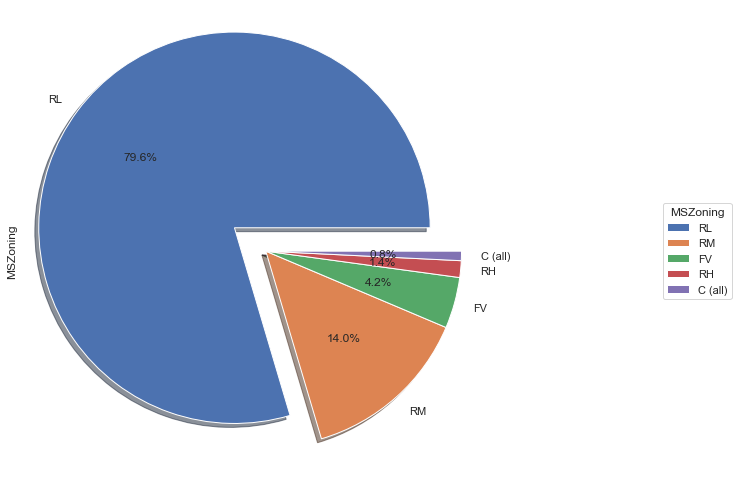




Street


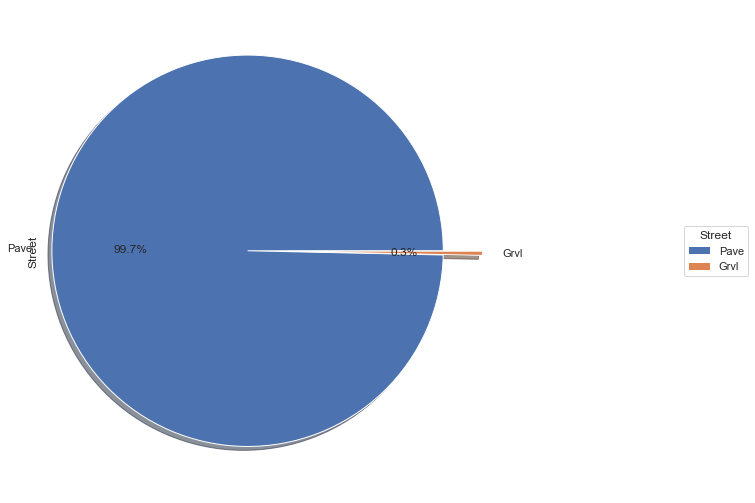




LotShape


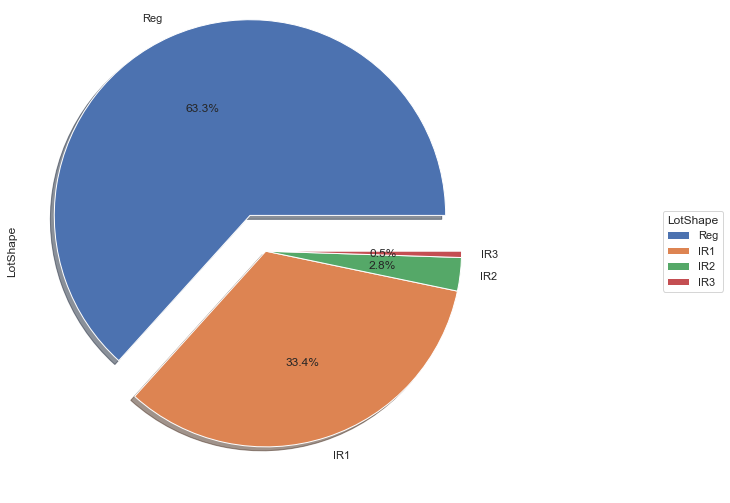




LandContour


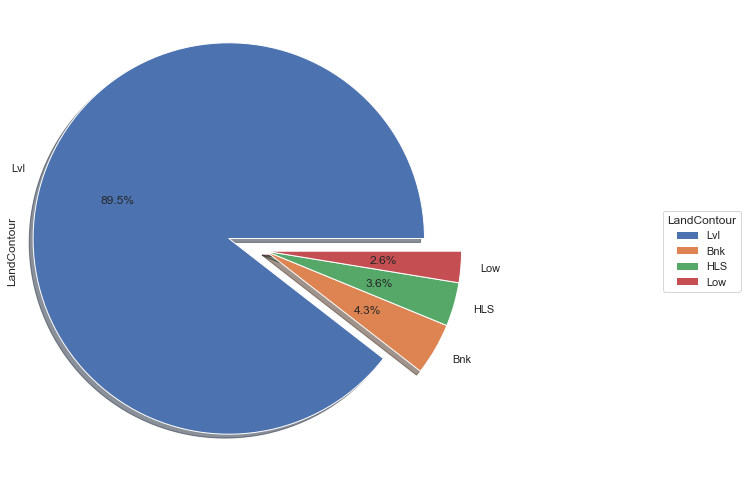




Utilities


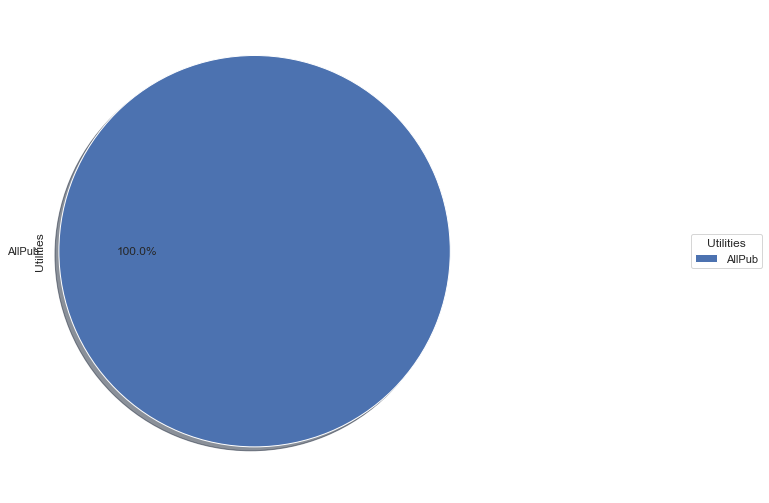




LotConfig


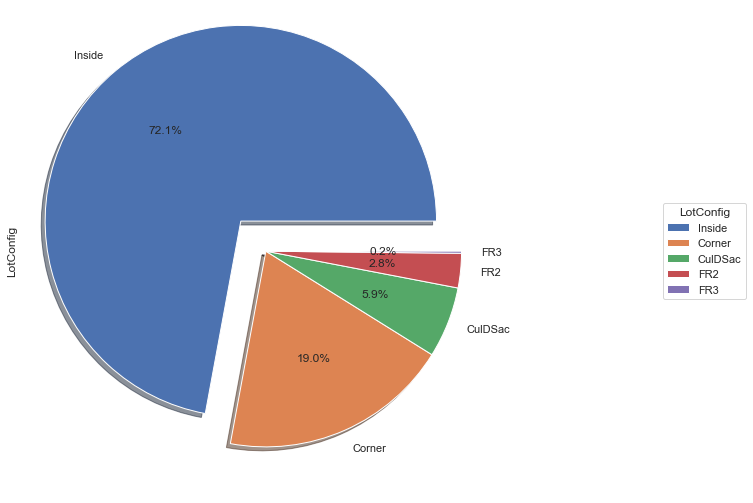




LandSlope


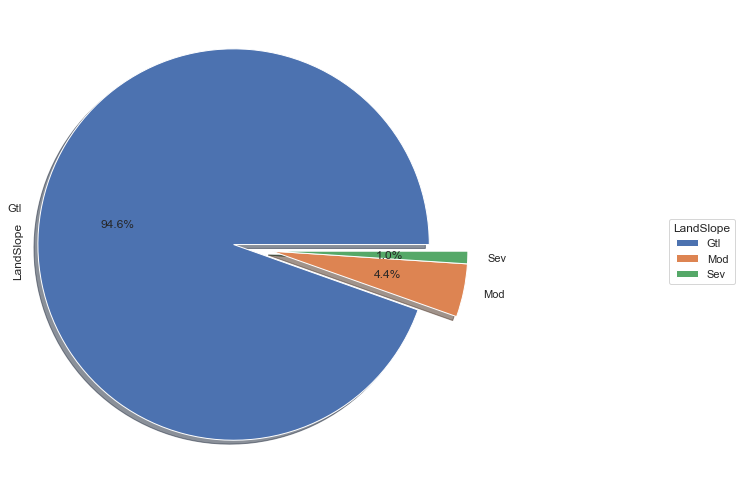




Neighborhood


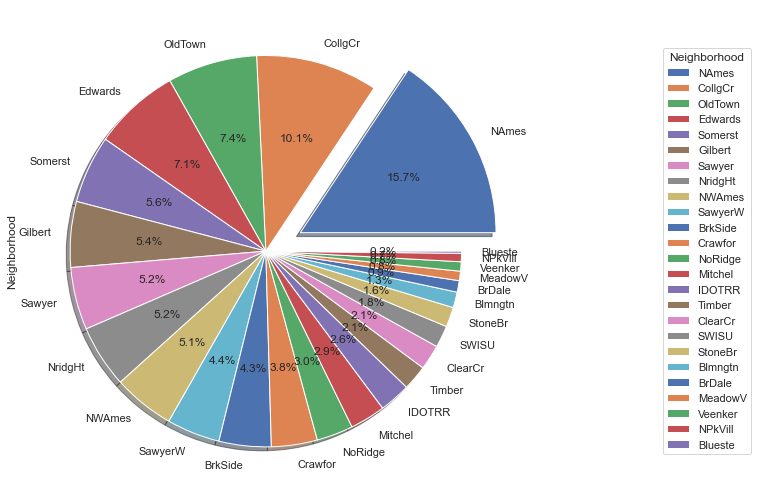




Condition1


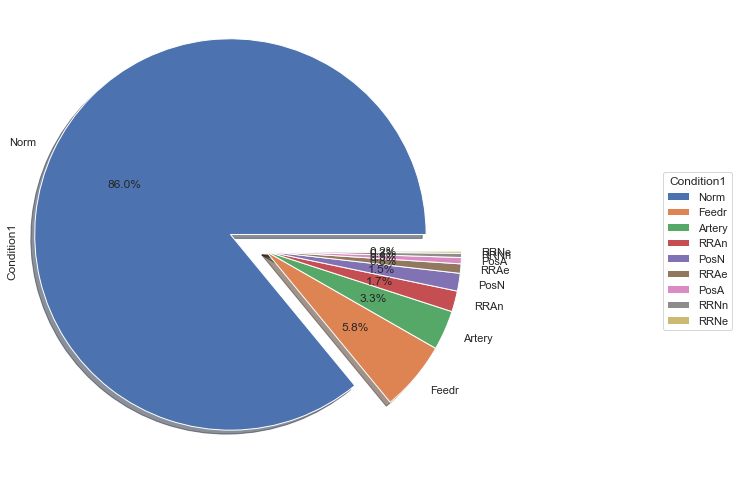




Condition2


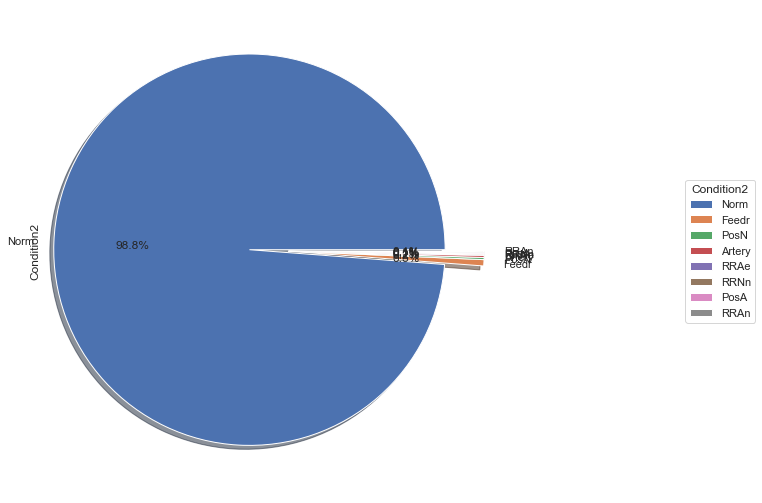




BldgType


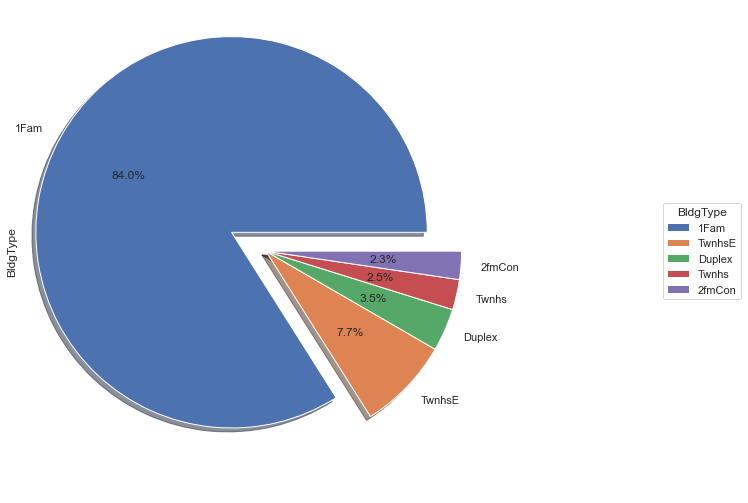




HouseStyle


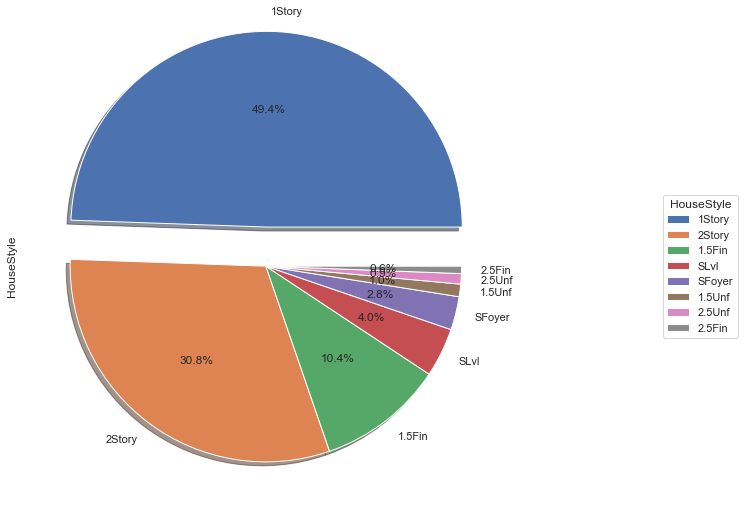




RoofStyle


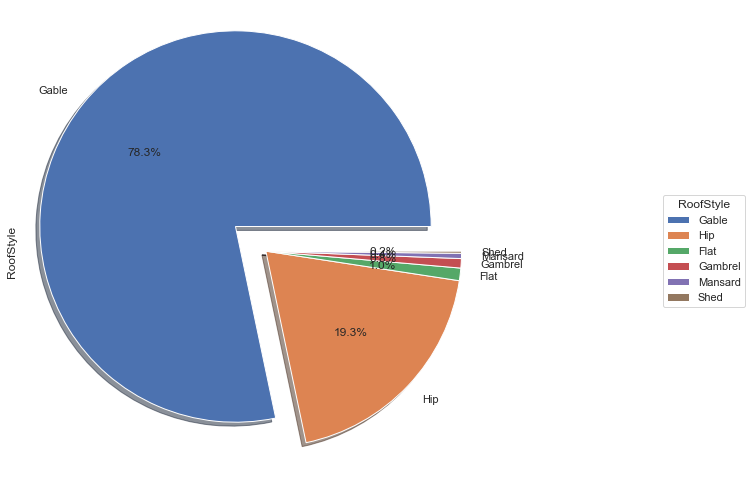




RoofMatl


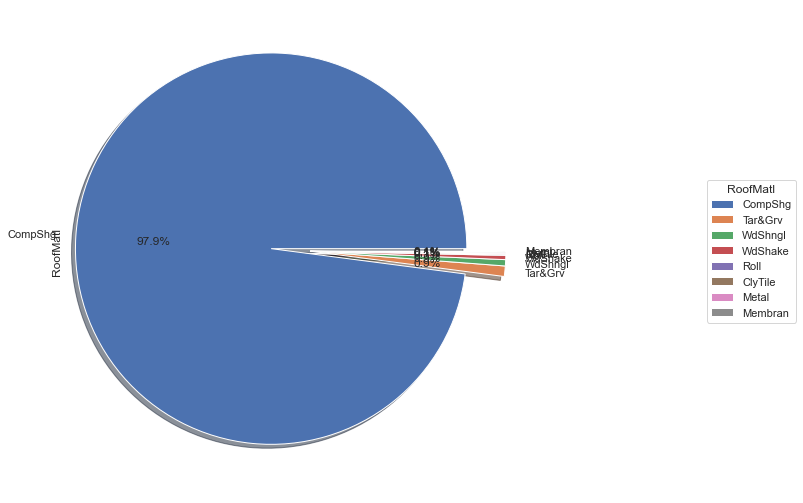




Exterior1st


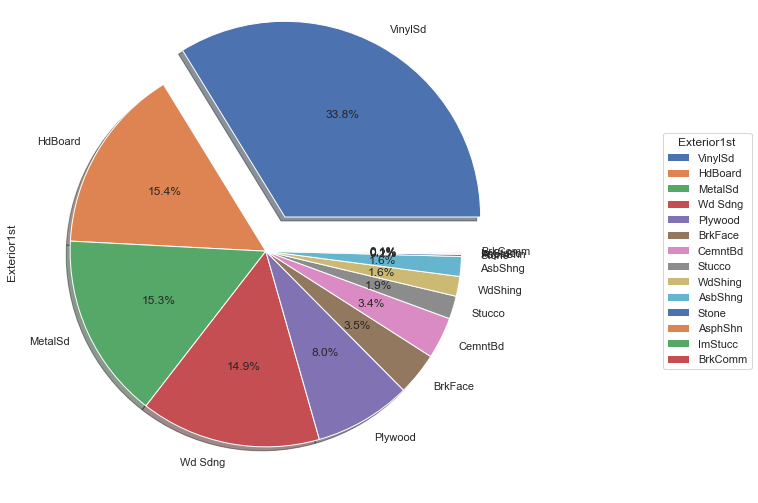




Exterior2nd


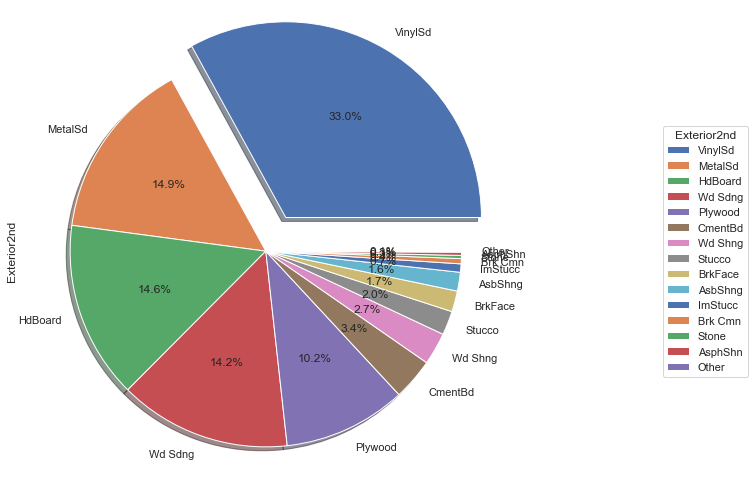




MasVnrType


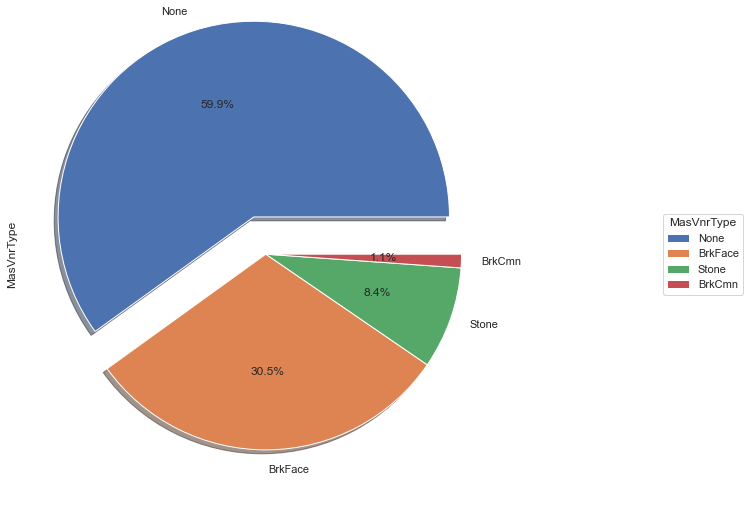




ExterQual


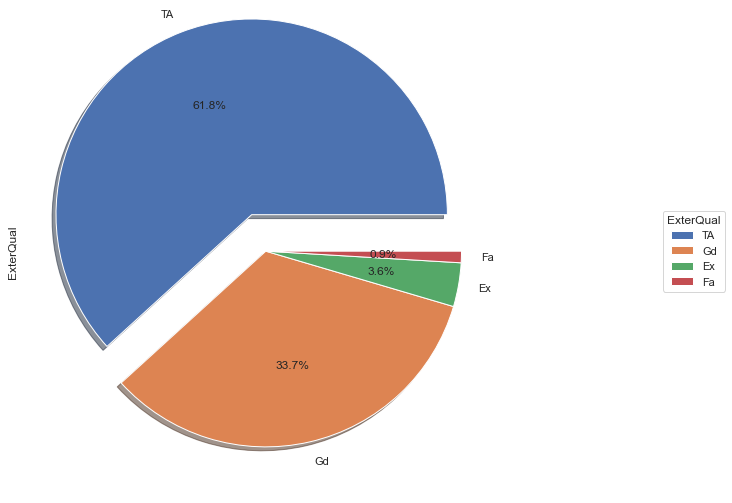




ExterCond


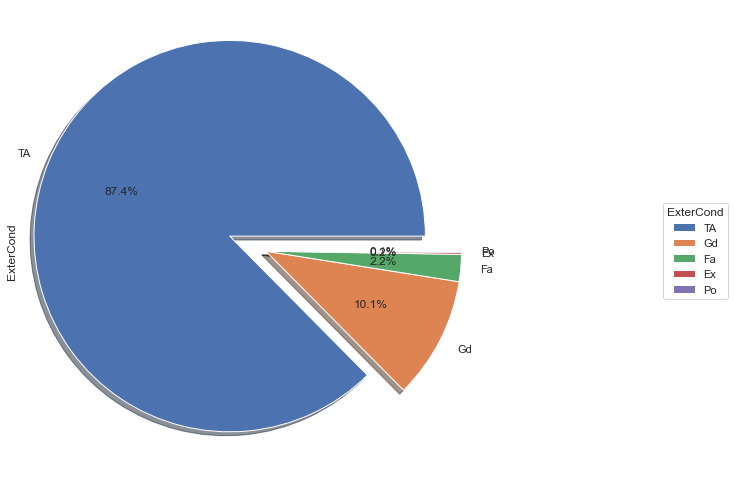




Foundation


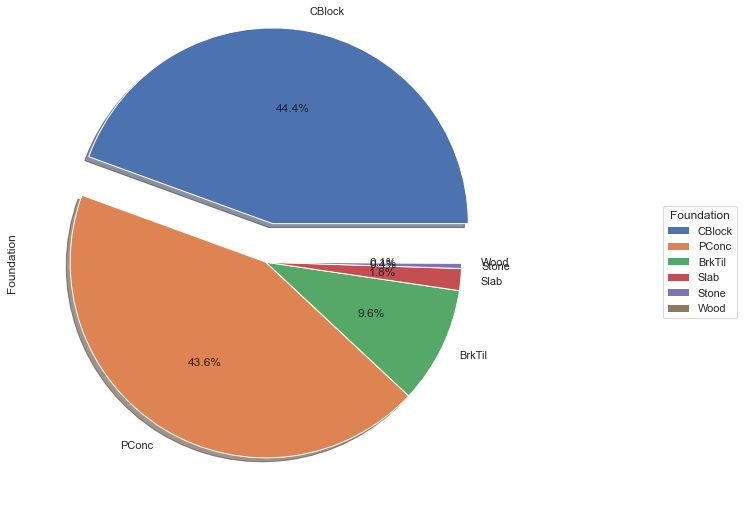




BsmtQual


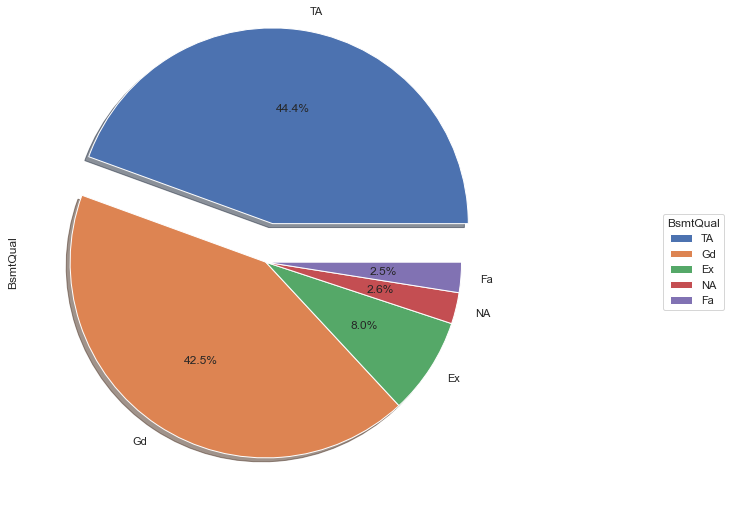




BsmtCond


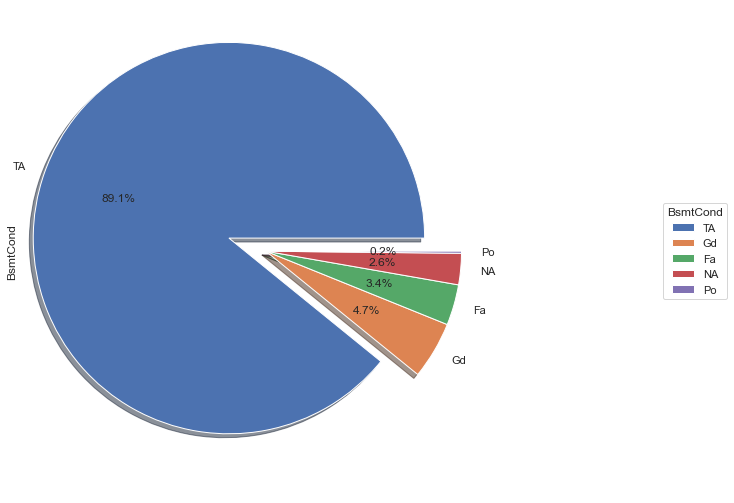




BsmtExposure


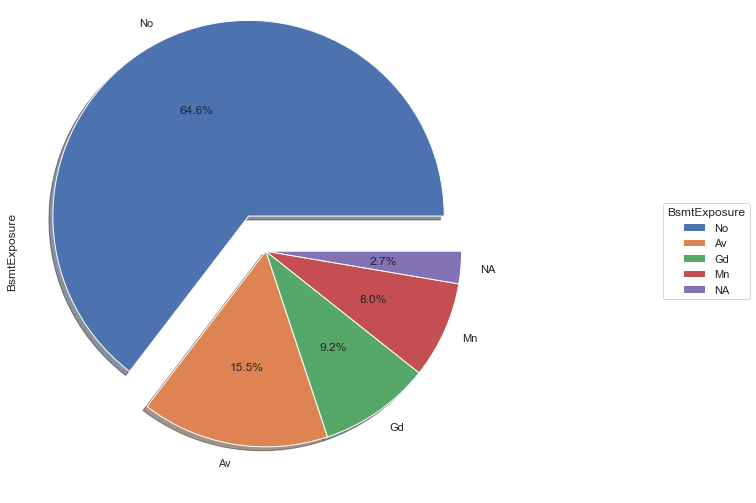




BsmtFinType1


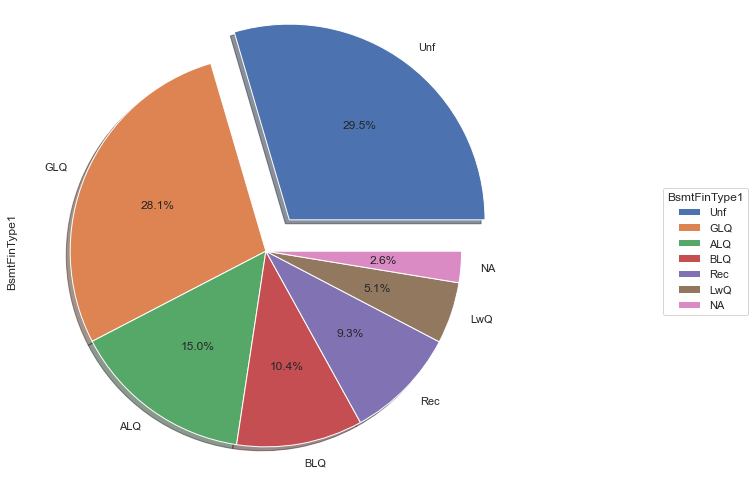




BsmtFinType2


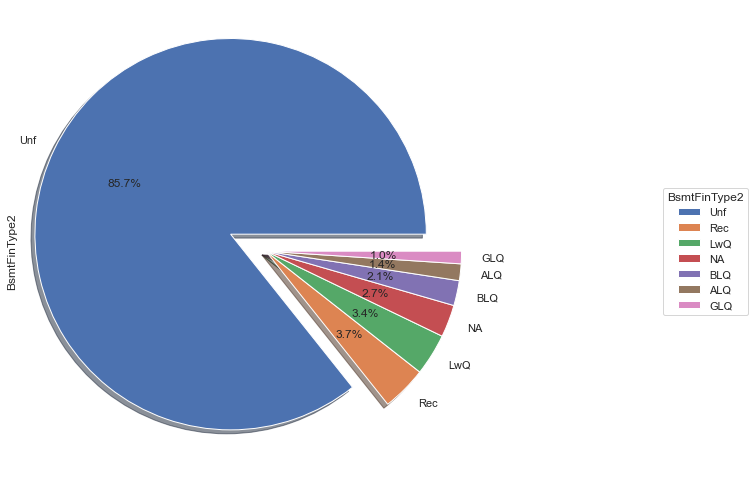




Heating


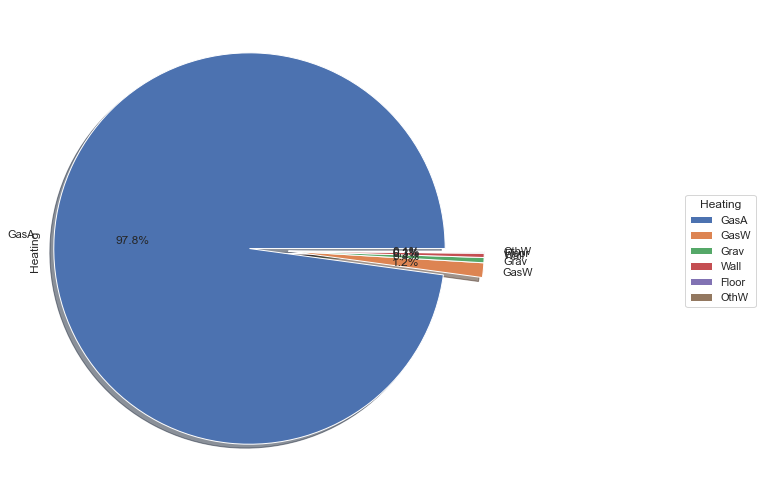




HeatingQC


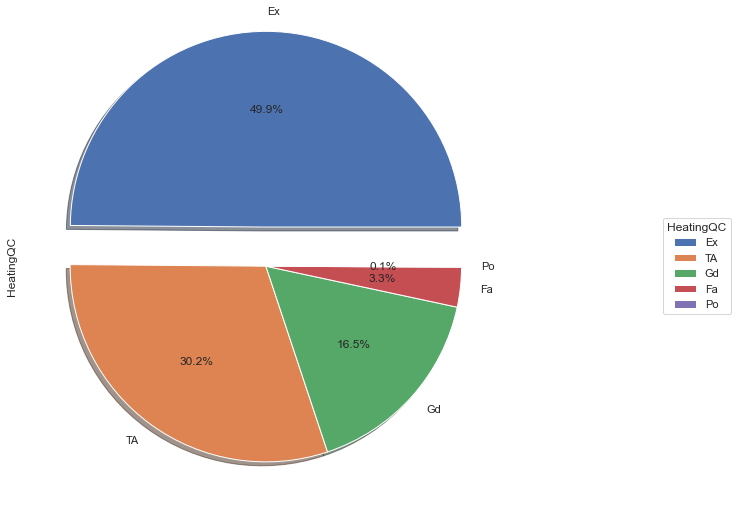




CentralAir


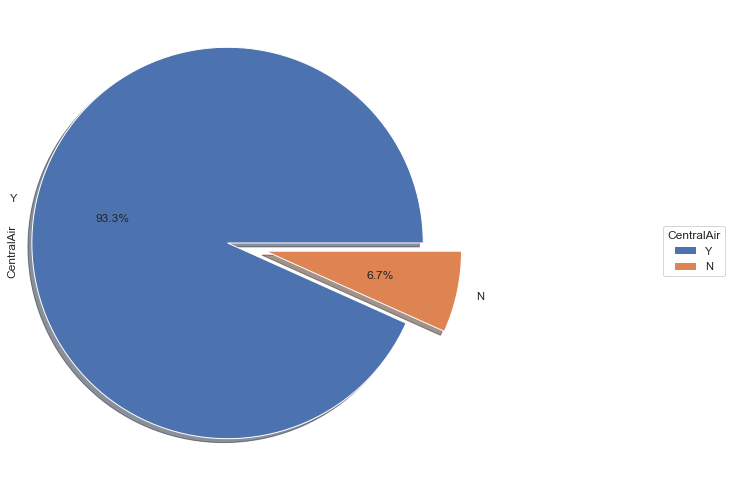




Electrical


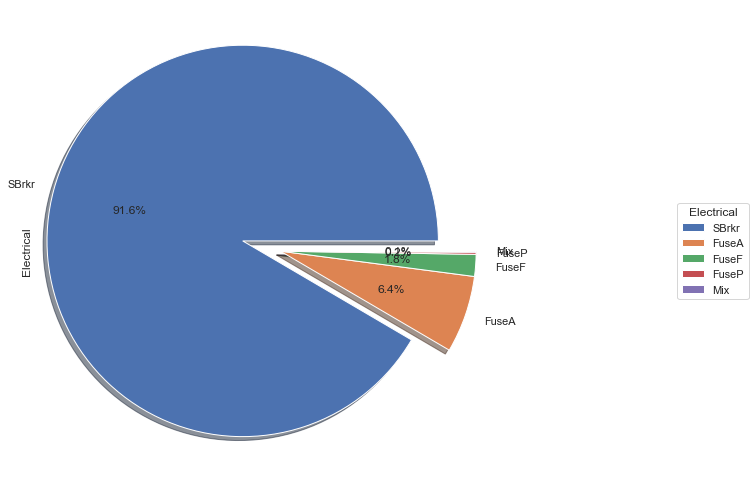




KitchenQual


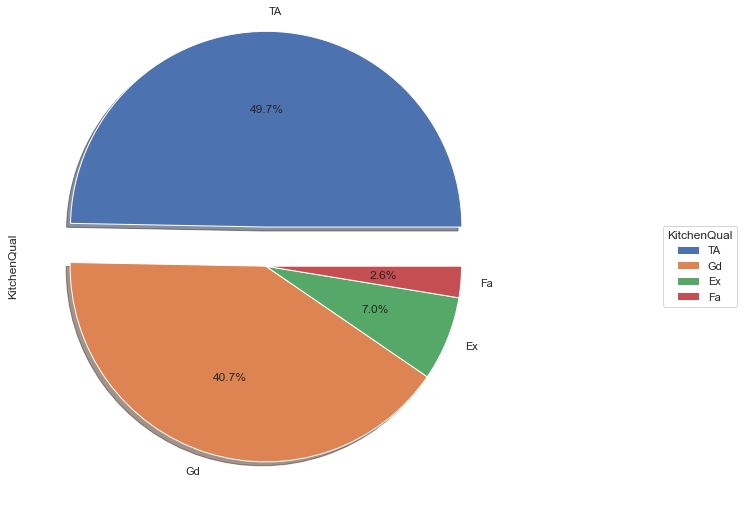




Functional


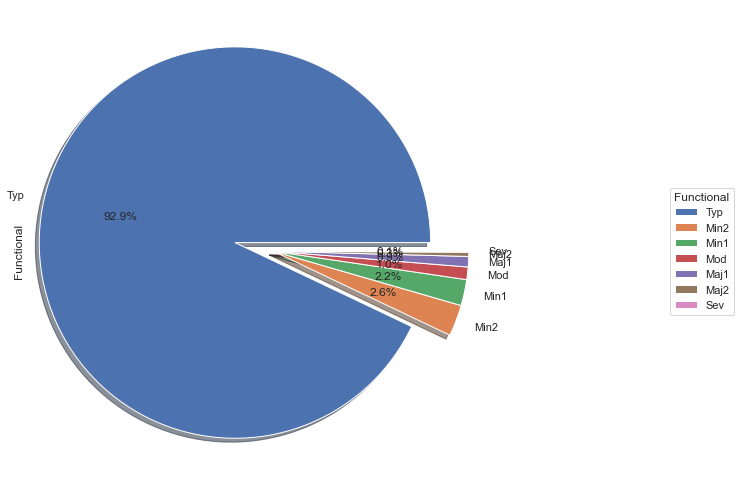




FireplaceQu


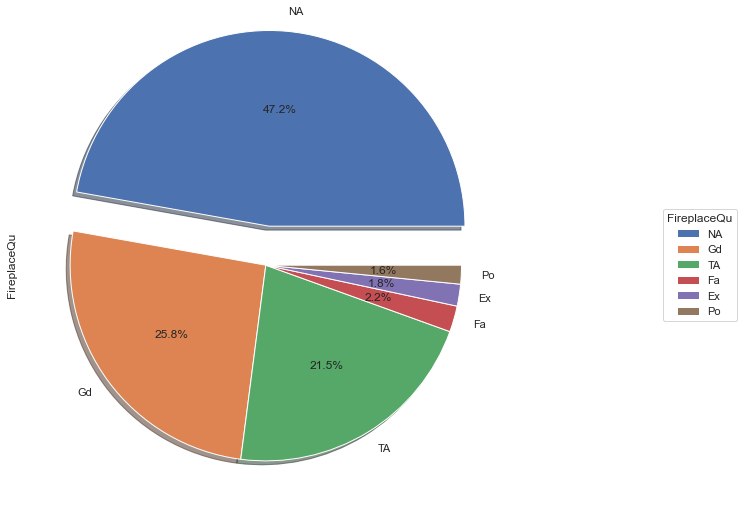




GarageType


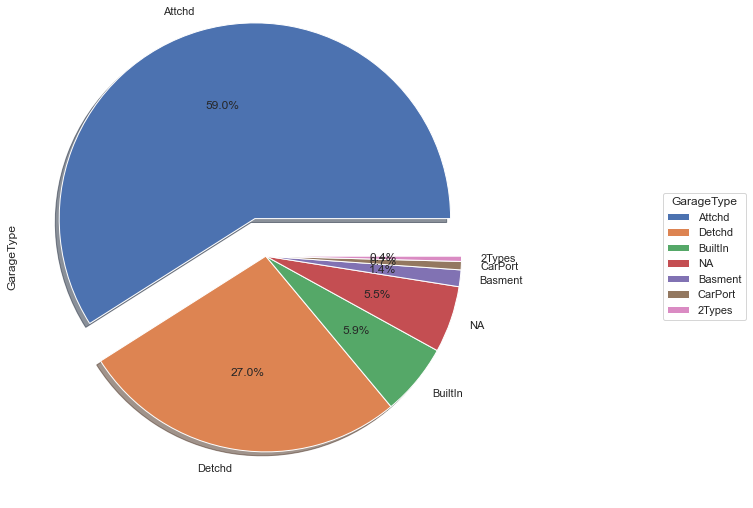




GarageYrBlt


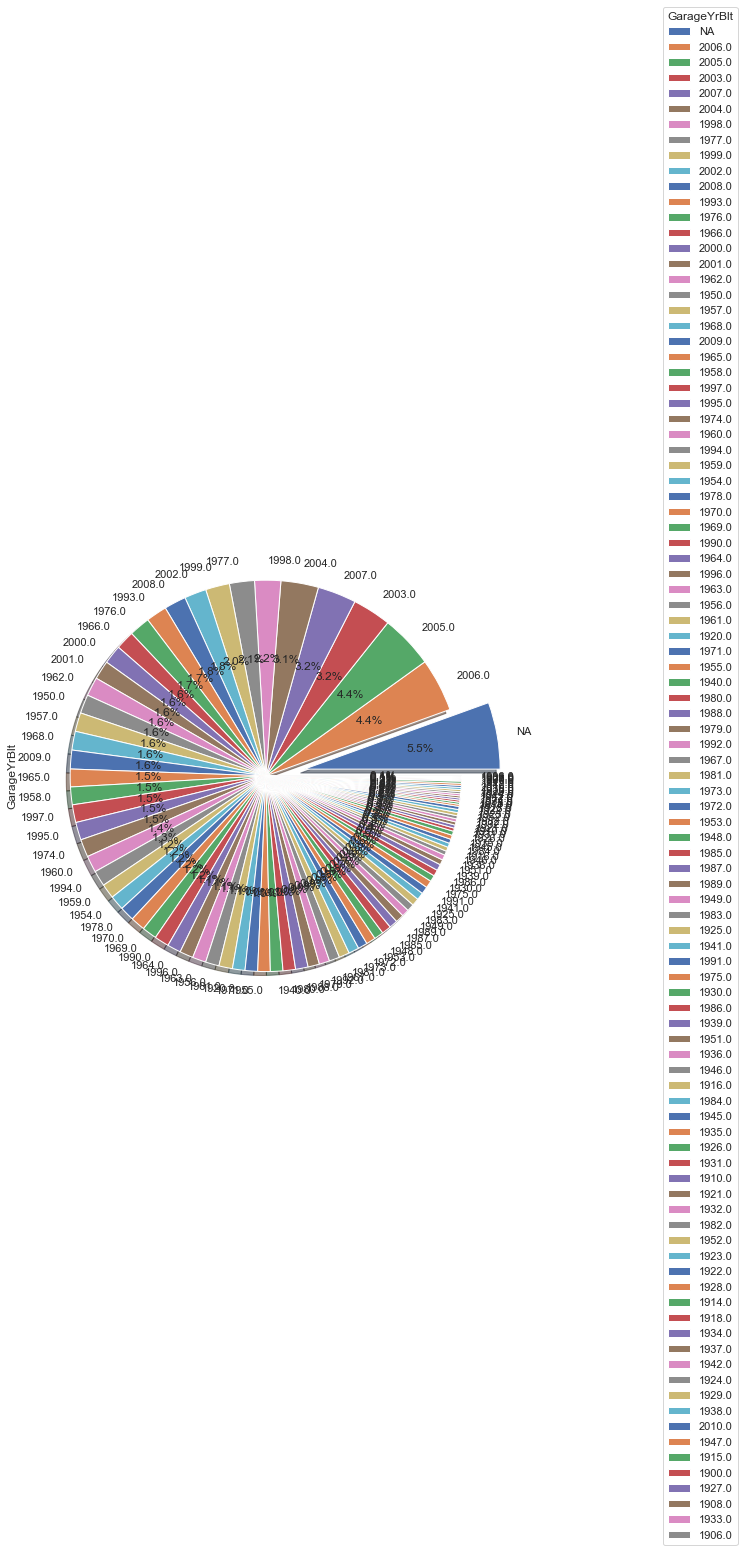




GarageFinish


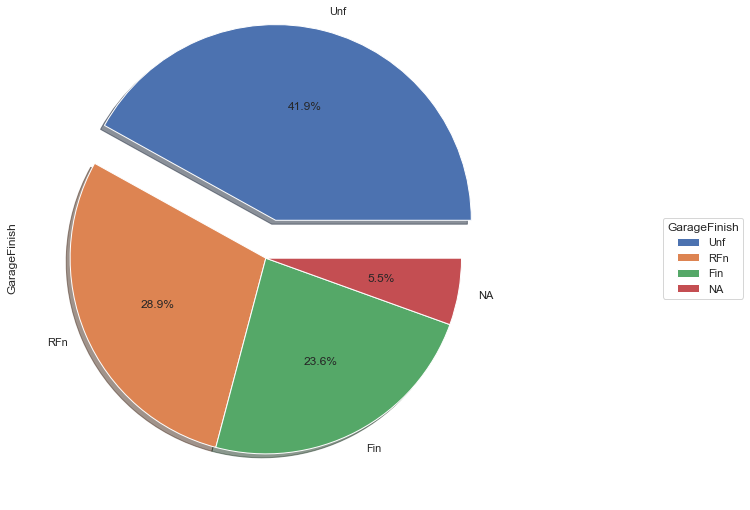




GarageQual


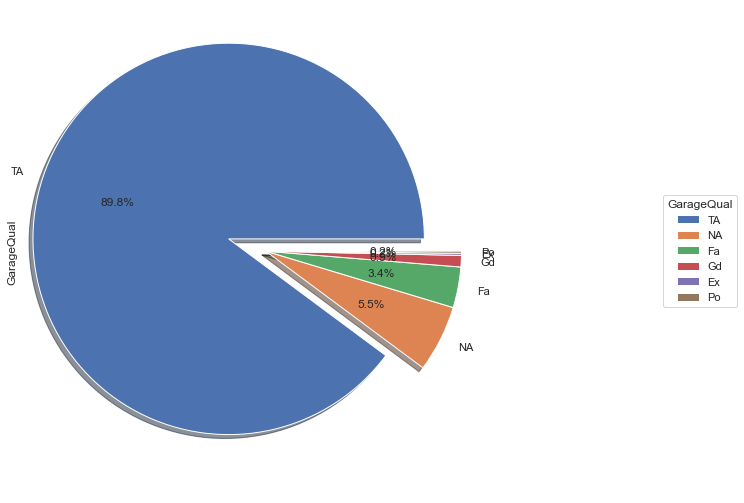




GarageCond


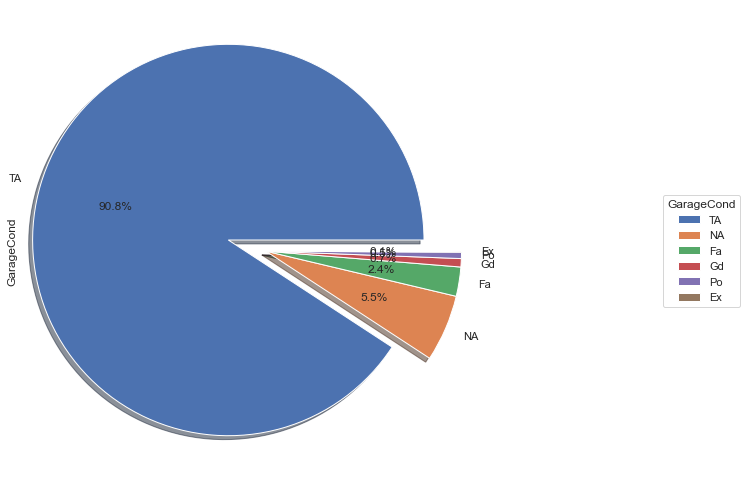




PavedDrive


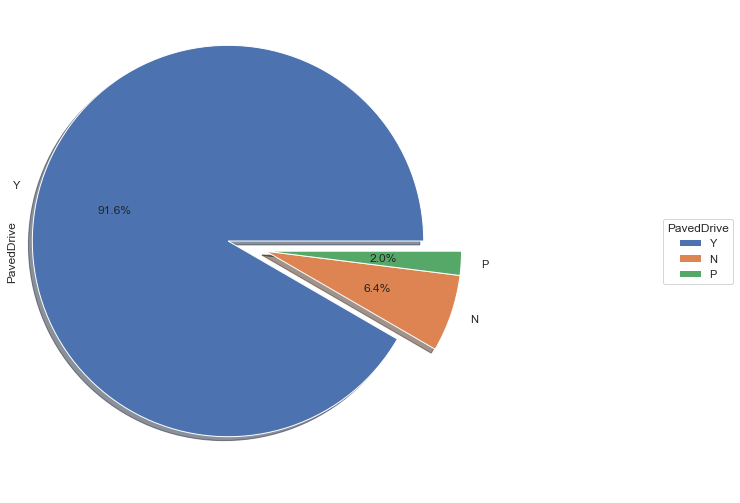




SaleType


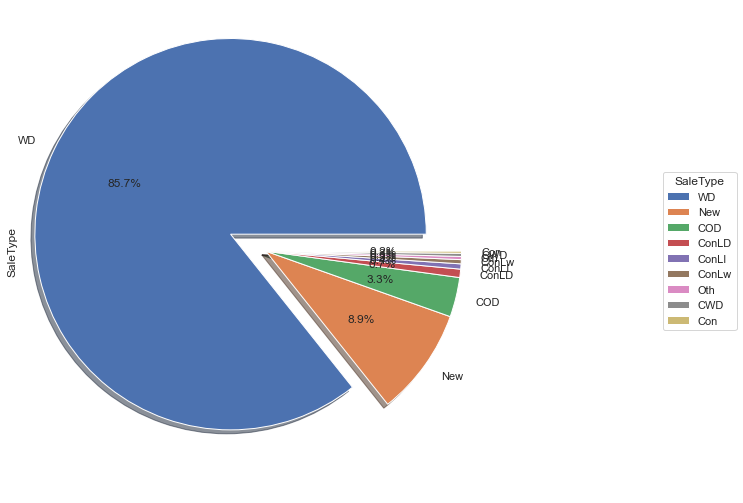




SaleCondition


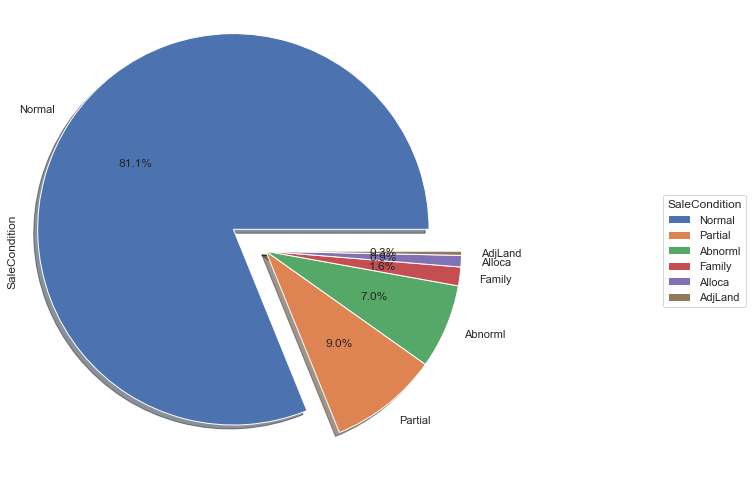

In [113]:
column=house_train.columns
column
for i in range(0,len(column)):
    if house_train[column[i]].dtype=='object':
        l=column[i]
        print('\033[1m'+l+'\033[1m')
        y=house_train[column[i]].value_counts()
        exp=[0.2]
        j=int(house_train[column[i]].nunique())
        k=1
        while k < j:
            exp.append(0)
            k+=1
        z=y.plot.pie(figsize=(9,9),explode=exp, autopct='%2.1f%%', shadow=True)
        z.legend(title =column[i],loc ="center left",bbox_to_anchor =(1.3, 0, 0.5, 1))
        plt.show()
        print('\n\n')

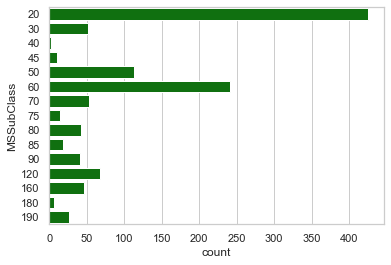

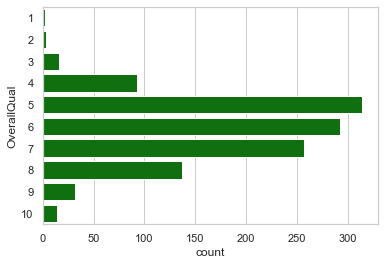

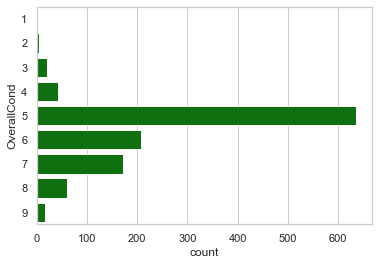

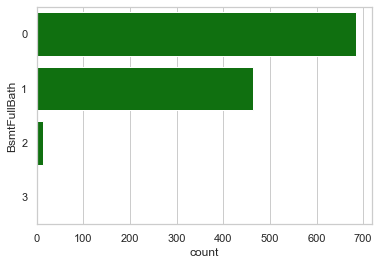

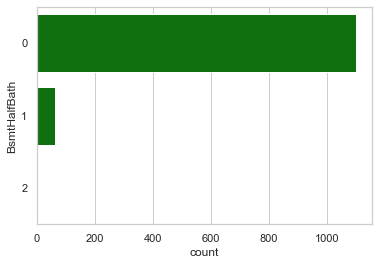

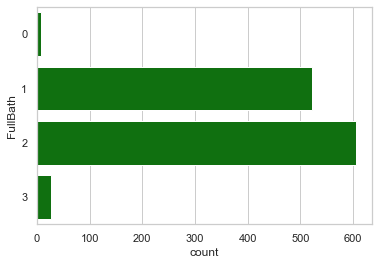

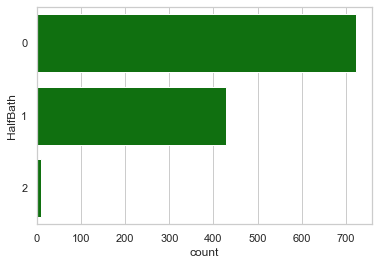

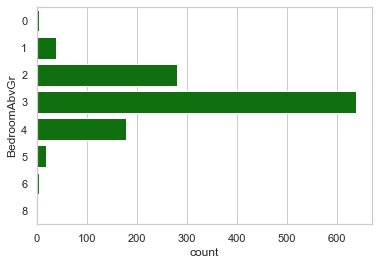

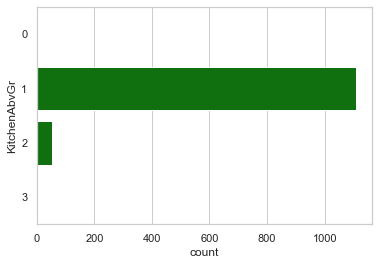

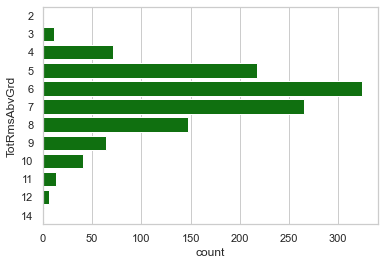

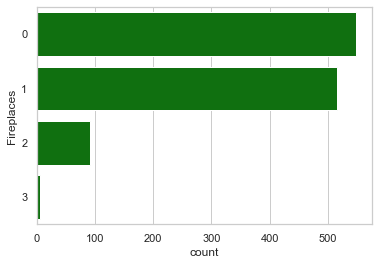

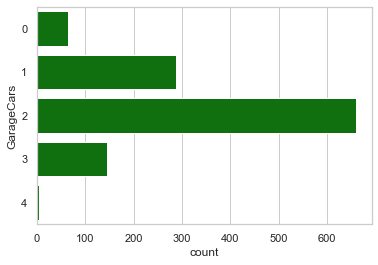

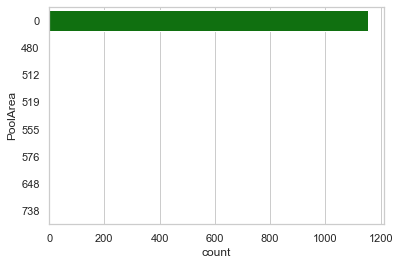

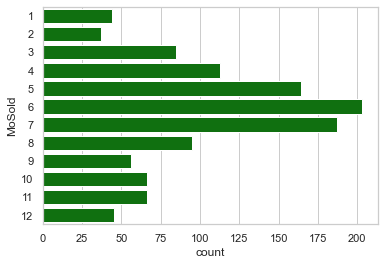

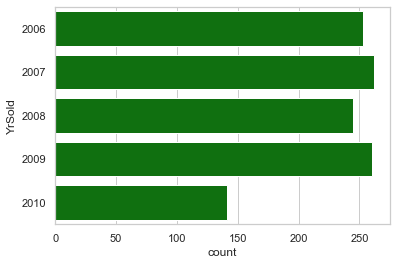

In [114]:
for i in range(0,len(column)):
    if house_train[column[i]].dtype=='int64' or house_train[column[i]].dtype=='float64':
        l=int(house_train[column[i]].nunique())
        if l<=15:
            sns.countplot(y = column[i],data =house_train ,color="green")
            # Show the plot
            plt.show()

**Univariate Analysis Observation**
1. Low resident Density is dominating in MSZoning column and Commerical the least.
2. Almost all of the road access to property has pavel than gravel.
3. Most Lot Shape has Regular, barely any have complete irregularity.
4. Majority of Land Contour is Levelled.
5. For all the house, all the public utilities are available.
6. Most of the Lots are Inside Lot barely any lot has more than one frontage side.
7. Almost all the houses have Gentle slope, very few have moderate or severe slope
8. All the neighbourhoods are in the limits of Ames city and Names neighbourhood have a greater number of houses.
9. Almost every house has Normal proximity condition.
10. Except a few negligible houses have normal proximity for condition type 2.
11. Half of the building are 1 Story type building followed by 2 Story. 2.5 Finished Story building are a rarity
12. Gable Type RoofStyle seems to be most accustomed in Ames city
13. Standard Shingle is standard for Roof Material
14. Vinyl Sliding is used for exterior covering of 1/3rd houses
15. Most of the house doesn’t have any masonry veer and negligible amount of house have Brick Common
16. Almost every house Exterior quality is either Average. Fair and Excellent are a rarity
17. Majority of the house have Typical Exterior condition and excellent conditions are rare
18. Cinder Block and Poured Concrete are commonly used for House Foundation.
19. Almost all the available basement of the houses are of typical quality and condition
20. More than half of the houses have no basement exposure
21. All most 1/3 houses have good quality of finished basements and another 1/3 are unfinished for 1st basment type and for 2 it is almost most unfinished
22. Every other house uses Gas forced warm air furnace
23. Half of the houses have excellent heating quality condition followed by average
24. Almost everyhouse have central air conditioning
25. Standard Circuit Breakers & Romex are used in majority of the houses.
26. Houses have a typical type of kitchen
27. Typical Functionality for most of the houses very few have deductions in them
28. Half of the house doesn't have fire place.
29. 3/5th of all the house have an attached garage
30. Strangly few garages of have no mention of year built in 
31. About half of the houses have unfinished garage
32. Most of the garages are of typical quality and condition
33. Majority of the houses have paved drive
34. Maximum houses that for sale have Warranty Deed - Conventional type sale and normal sale condition
35. 1/3rd of the MSSubClass are of 1-STORY 1946 & NEWER ALL STYLES.
36. Most of the house have typical overall quality and condition
37. Majority of the House have no Full Bath in the basement followed 1 full bath and zero half bath
38. Most of the houses have atleast 1 bathroom.
39. Most houses have 3 Bedrooms and 1 Kitchen above grade.
40. Majority houses have 6 room above grade
41. Typically most have houses have space for parking atleast 1 car in the garage.
42. Rarely any house has a pool area
43. June Month has most number house sales and except for year 2010 every other every 2006-09 have good number sales


In [115]:
#removing these columns as one individual element out of all the unique elements containing in these columns is heavily biased
#which affect ML model negatively
house_train.drop(columns=['Street','Utilities','LandSlope','Condition2','RoofMatl','ExterCond','BsmtCond',
                         'BsmtFinType2','Heating','CentralAir','Electrical','Functional','GarageQual','GarageCond',
                          'PavedDrive','BsmtHalfBath','KitchenAbvGr','PoolArea'],inplace=True)
house_test.drop(columns=['Street','Utilities','LandSlope','Condition2','RoofMatl','ExterCond','BsmtCond',
                         'BsmtFinType2','Heating','CentralAir','Electrical','Functional','GarageQual','GarageCond',
                          'PavedDrive','BsmtHalfBath','KitchenAbvGr','PoolArea'],inplace=True)

In [116]:
dropped_columns=['Street','Utilities','LandSlope','Condition2','RoofMatl','ExterCond','BsmtCond',
                         'BsmtFinType2','Heating','CentralAir','Electrical','Functional','GarageQual','GarageCond',
                          'PavedDrive','BsmtHalfBath','KitchAbvGr','PoolArea']
c=pd.DataFrame(dropped_columns)
c.columns=['Columns Dropped']
c.index+=1
c

Columns Dropped
1           Street
2        Utilities
3        LandSlope
4       Condition2
5         RoofMatl
6        ExterCond
7         BsmtCond
8     BsmtFinType2
9          Heating
10      CentralAir
11      Electrical
12      Functional
13      GarageQual
14      GarageCond
15      PavedDrive
16    BsmtHalfBath
17      KitchAbvGr
18        PoolArea

In [117]:
#checking the shape of the train and test data
print('train shape :',house_train.shape)
print('test shape :',house_test.shape)

train shape : (1161, 58)
test shape : (290, 57)


# Bivariate Analysis

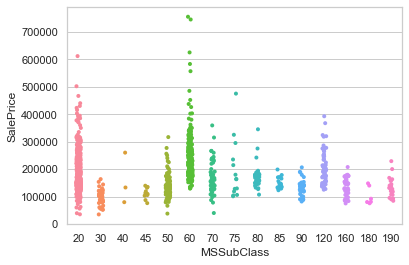

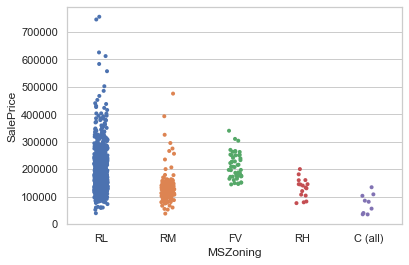

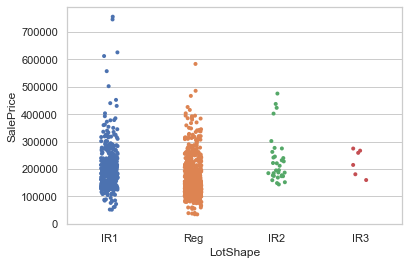

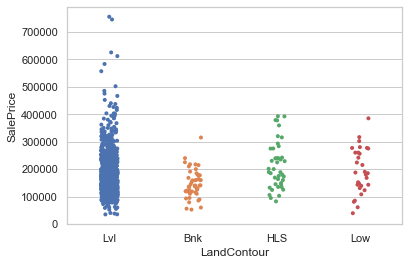

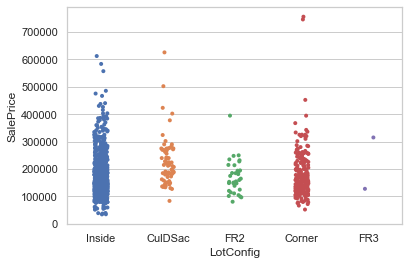

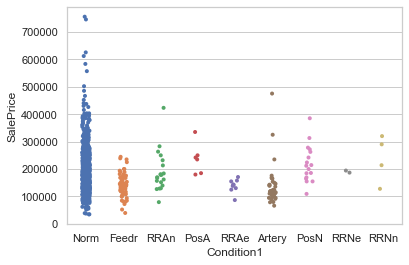

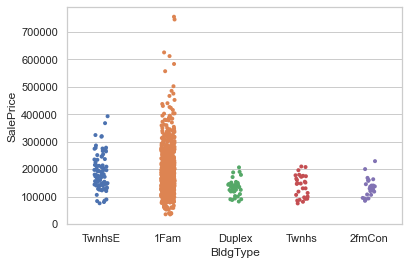

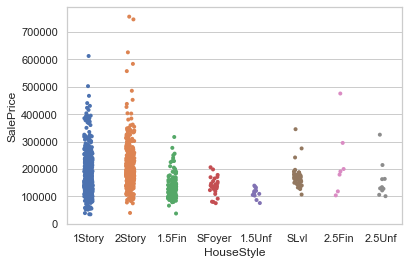

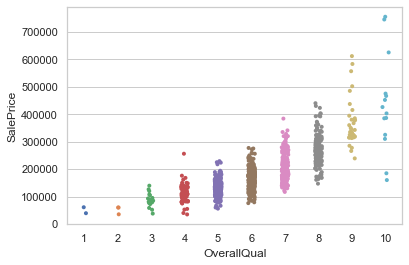

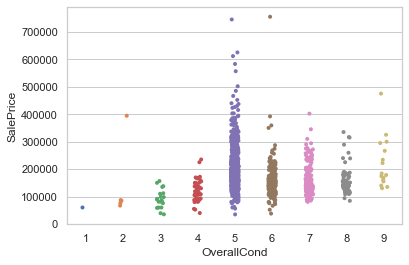

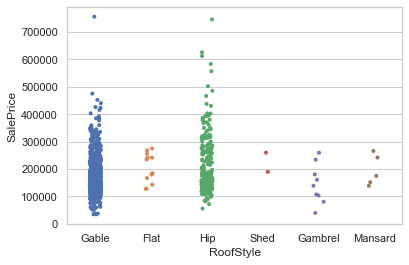

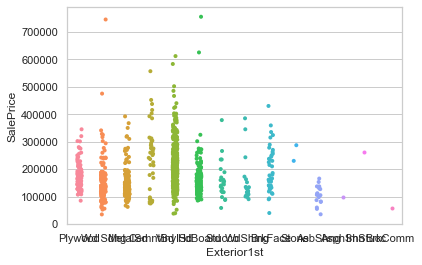

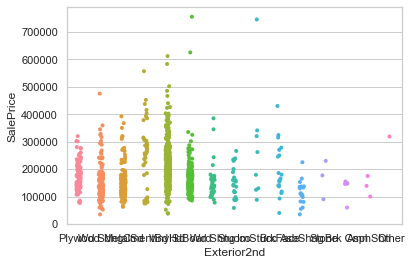

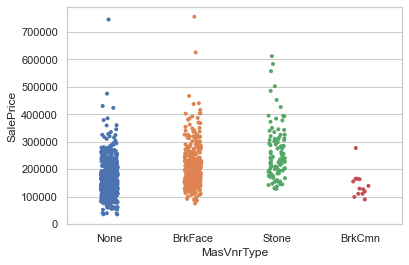

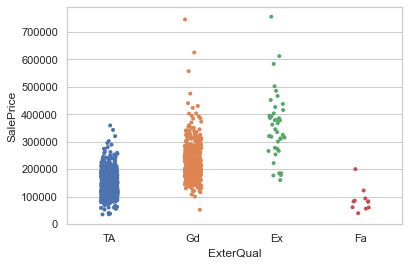

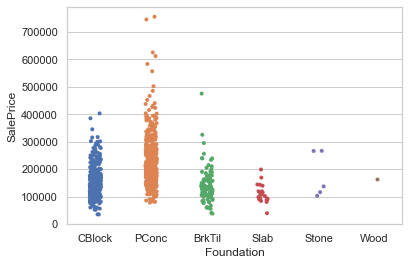

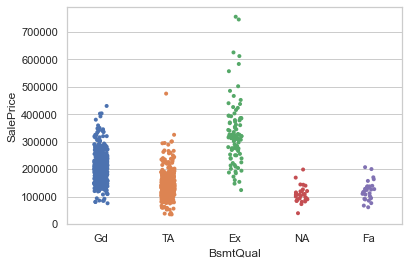

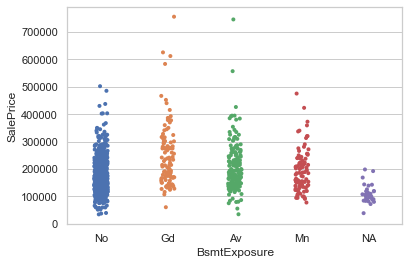

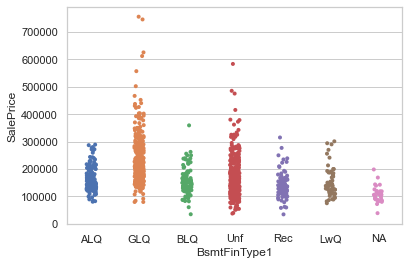

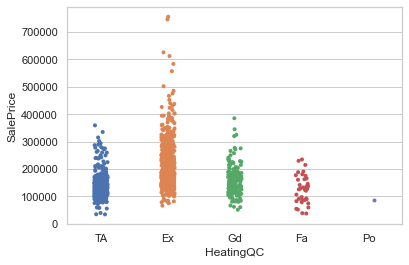

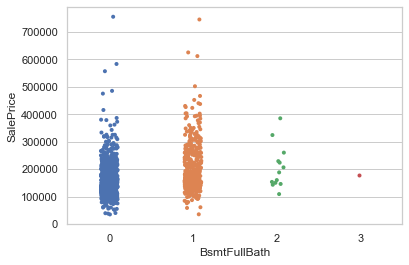

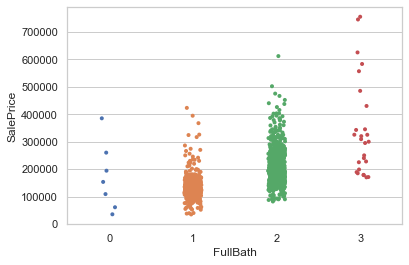

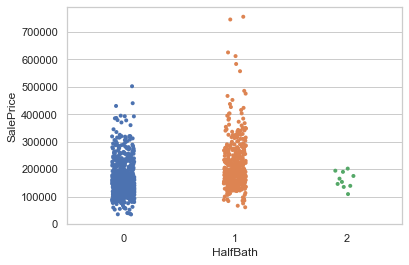

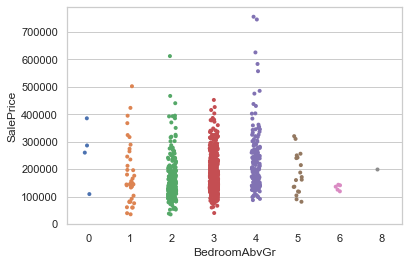

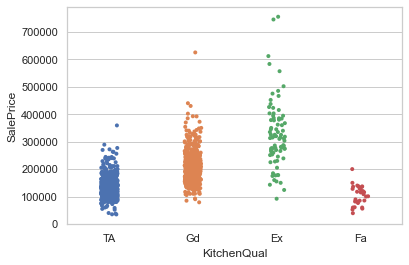

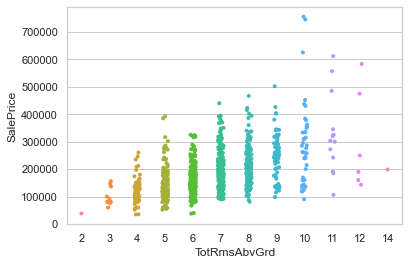

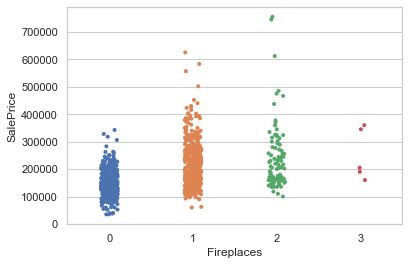

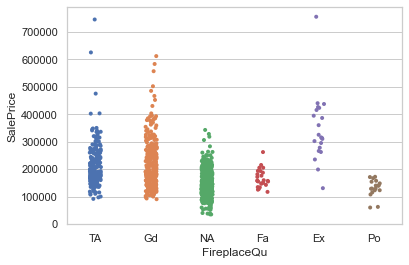

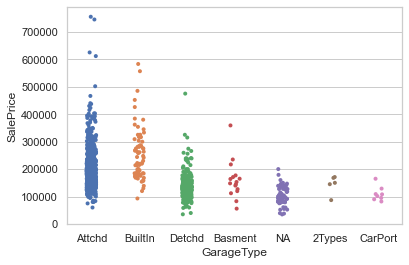

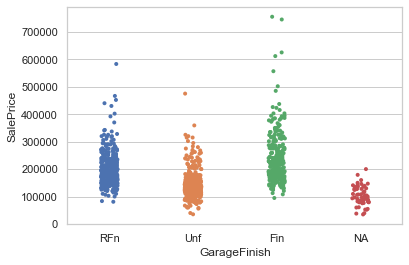

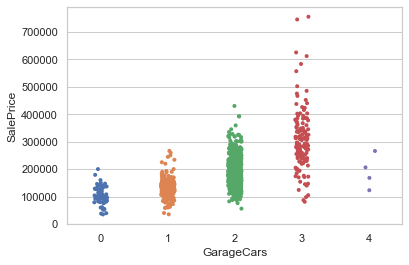

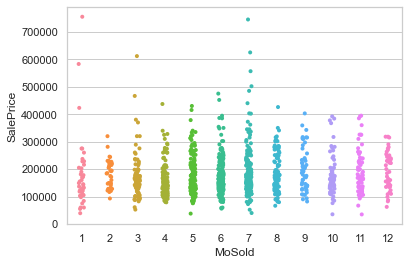

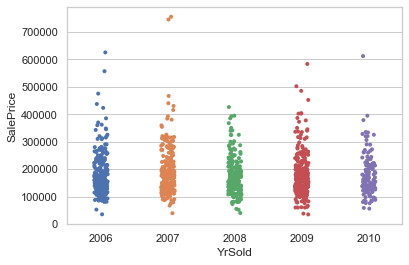

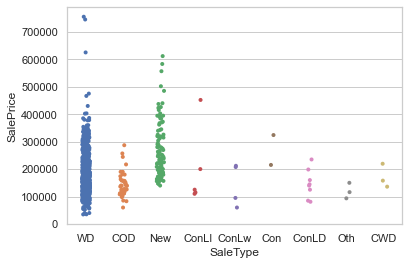

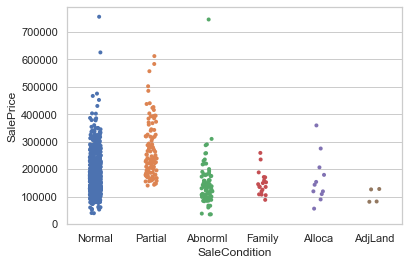

In [118]:
new_columns=house_train.columns
for i in range(0,len(new_columns)):
    l=int(house_train[new_columns[i]].nunique())
    if l<=15:
        sns.set(style = 'whitegrid')         
        sns.stripplot(x=new_columns[i], y="SalePrice", data=house_train,size=4)  
        plt.show()

**Bi-variate Analysis Observation**
1. 2 Story above house have higher starting price.
2. MSZoning doesn't much of difference in house price, although RL has highest price
3. Irregular lot shape have higher starting price
4. Building type, Landcontour and Lot Config doesn't effect the price pretty much
5. 2 Story building has highest house price
6. As the quality of house increases the price of the house also increases.
7. If condition is above average it fetches good price
8. RoofStyle has hardly any effect
9. Brick face and Stone Masonry veneer type have high price
10. Good and Excellent quality exterior fetch good price
11. Brick and tiles and slab are the cheapest house foundation
12. Basement quality,Full Bath,Bedroom above grade, HeatingQC and sale price are directly proportional
13. Kitchen Quality, Total rooms above grade and Fireplaces is directly proportional to sale price
14. Attached garages, Garage Capacity and Fully Finished garages house are much costlier
15. July month is month when costlier houses are sold 

In [119]:
house_train.Neighborhood.value_counts()

NAmes      182
CollgCr    117
OldTown     86
Edwards     83
Somerst     65
Gilbert     63
Sawyer      60
NridgHt     60
NWAmes      59
SawyerW     51
BrkSide     50
Crawfor     44
NoRidge     35
Mitchel     34
IDOTRR      30
Timber      24
ClearCr     24
SWISU       21
StoneBr     19
Blmngtn     15
BrDale      11
MeadowV      9
Veenker      9
NPkVill      8
Blueste      2
Name: Neighborhood, dtype: int64

In [120]:
house_train.LotShape.value_counts()

Reg    735
IR1    388
IR2     32
IR3      6
Name: LotShape, dtype: int64

As all IR1, IR2, IR3 in lotshape saleprice are overlapping one another, concluding them as one element so house is either regular in shape ore irregular

In [121]:
house_train['LotShape'].replace('IR2','IR1',inplace=True)
house_train['LotShape'].replace('IR3','IR1',inplace=True)
house_test['LotShape'].replace('IR2','IR1',inplace=True)
house_test['LotShape'].replace('IR3','IR1',inplace=True)

In [122]:
house_train.LotShape.value_counts()

Reg    735
IR1    426
Name: LotShape, dtype: int64

In [123]:
house_test.LotShape.value_counts()

Reg    183
IR1    107
Name: LotShape, dtype: int64

In [124]:
#replacing all the elements except for 1fam into 2fam
house_train['BldgType'].replace('2fmCon','2Fam',inplace=True)
house_train['BldgType'].replace('Duplex','2Fam',inplace=True)
house_train['BldgType'].replace('TwnhsE','2Fam',inplace=True)
house_train['BldgType'].replace('Twnhs','2Fam',inplace=True)
house_test['BldgType'].replace('2fmCon','2Fam',inplace=True)
house_test['BldgType'].replace('Duplex','2Fam',inplace=True)
house_test['BldgType'].replace('TwnhsE','2Fam',inplace=True)
house_test['BldgType'].replace('Twnhs','2Fam',inplace=True)

In [125]:
house_train['BldgType'].value_counts()

1Fam    975
2Fam    186
Name: BldgType, dtype: int64

In [126]:
house_test['BldgType'].value_counts()

1Fam    237
2Fam     53
Name: BldgType, dtype: int64

In [127]:
house_train.HouseStyle.value_counts()

1Story    574
2Story    358
1.5Fin    121
SLvl       47
SFoyer     32
1.5Unf     12
2.5Unf     10
2.5Fin      7
Name: HouseStyle, dtype: int64

In [128]:
#combining unfinished and finished into one and split type houses into one type
house_train['HouseStyle'].replace('1.5Fin','1.5Story',inplace=True)
house_train['HouseStyle'].replace('1.5Unf','1.5Story',inplace=True)
house_train['HouseStyle'].replace('2Story','2Storyand+',inplace=True)
house_train['HouseStyle'].replace('2.5Unf','2Storyand+',inplace=True)
house_train['HouseStyle'].replace('2.5Fin','2Storyand+',inplace=True)
house_test['HouseStyle'].replace('1.5Fin','1.5Story',inplace=True)
house_test['HouseStyle'].replace('1.5Unf','1.5Story',inplace=True)
house_test['HouseStyle'].replace('2Story','2Storyand+',inplace=True)
house_test['HouseStyle'].replace('2.5Unf','2Storyand+',inplace=True)
house_test['HouseStyle'].replace('2.5Fin','2Storyand+',inplace=True)

In [129]:
house_train.HouseStyle.value_counts()

1Story        574
2Storyand+    375
1.5Story      133
SLvl           47
SFoyer         32
Name: HouseStyle, dtype: int64

In [130]:
house_test.HouseStyle.value_counts()

1Story        147
2Storyand+     86
1.5Story       35
SLvl           17
SFoyer          5
Name: HouseStyle, dtype: int64

In [131]:
house_train['OverallQual'].value_counts()

5     314
6     293
7     257
8     137
4      93
9      32
3      16
10     14
2       3
1       2
Name: OverallQual, dtype: int64

As most of the values are overlapping one another dividing OverallQual into 3 division 

In [132]:
house_train.loc[(house_train["OverallQual"] >= 1) & (house_train["OverallQual"] <= 5), "OverallQual"] = 0
house_train.loc[(house_train["OverallQual"] >= 6) & (house_train["OverallQual"] <= 7), "OverallQual"] = 1
house_train.loc[(house_train["OverallQual"] >= 8) & (house_train["OverallQual"] <= 10), "OverallQual"] = 2
house_test.loc[(house_test["OverallQual"] >= 1) & (house_test["OverallQual"] <= 5), "OverallQual"] = 0
house_test.loc[(house_test["OverallQual"] >= 6) & (house_test["OverallQual"] <= 7), "OverallQual"] = 1
house_test.loc[(house_test["OverallQual"] >= 8) & (house_test["OverallQual"] <= 10), "OverallQual"] = 2

In [133]:
house_train['OverallQual'].value_counts()

1    550
0    428
2    183
Name: OverallQual, dtype: int64

In [134]:
house_train['ExterQual'].value_counts()

TA    717
Gd    391
Ex     42
Fa     11
Name: ExterQual, dtype: int64

In [135]:
#making the ExterQual a Categorial columns that is element is either TA or Gd
house_train['ExterQual'].replace('Fa','TA',inplace=True)
house_train['ExterQual'].replace('Ex','Gd',inplace=True)
house_test['ExterQual'].replace('Fa','TA',inplace=True)
house_test['ExterQual'].replace('Ex','Gd',inplace=True)

In [136]:
house_train['ExterQual'].value_counts()

TA    728
Gd    433
Name: ExterQual, dtype: int64

In [137]:
house_train['Foundation'].value_counts()

CBlock    516
PConc     506
BrkTil    112
Slab       21
Stone       5
Wood        1
Name: Foundation, dtype: int64

In [138]:
house_train['BsmtFullBath'].value_counts()

0    684
1    463
2     13
3      1
Name: BsmtFullBath, dtype: int64

making the BsmtFullBath, HalfBath and Fireplaces into categorial data as the saleprice are overlapping for bivariate analysis.

In [139]:
house_train['BsmtFullBath'].replace(2,1,inplace=True)
house_train['BsmtFullBath'].replace(3,1,inplace=True)
house_test['BsmtFullBath'].replace(2,1,inplace=True)
house_test['BsmtFullBath'].replace(3,1,inplace=True)

In [140]:
house_train['BsmtFullBath'].value_counts()

0    684
1    477
Name: BsmtFullBath, dtype: int64

In [141]:
house_train['HalfBath'].value_counts()

0    722
1    429
2     10
Name: HalfBath, dtype: int64

In [142]:
house_train['HalfBath'].replace(2,1,inplace=True)
house_test['HalfBath'].replace(2,1,inplace=True)

In [143]:
house_train['HalfBath'].value_counts()

0    722
1    439
Name: HalfBath, dtype: int64

In [144]:
house_train['Fireplaces'].value_counts()

0    548
1    516
2     92
3      5
Name: Fireplaces, dtype: int64

In [145]:
house_train.loc[(house_train["Fireplaces"] >= 1), "Fireplaces"] = 1
house_test.loc[(house_test["Fireplaces"] >= 1), "Fireplaces"] = 1

In [146]:
house_train['Fireplaces'].value_counts()

1    613
0    548
Name: Fireplaces, dtype: int64

In [147]:
house_train['GarageCars'].value_counts()

2    659
1    288
3    146
0     64
4      4
Name: GarageCars, dtype: int64

In [148]:
house_train['SaleType'].value_counts()

WD       995
New      103
COD       38
ConLD      8
ConLI      5
ConLw      4
Oth        3
CWD        3
Con        2
Name: SaleType, dtype: int64

In [149]:
house_train['SaleCondition'].value_counts()

Normal     942
Partial    105
Abnorml     81
Family      18
Alloca      11
AdjLand      4
Name: SaleCondition, dtype: int64

removing these below columns as one individual element out of all the unique elements containing in these columns is heavily which affect ML model negatively

In [150]:
house_train.drop(columns=['LandContour','RoofStyle','Exterior2nd','FullBath','GarageYrBlt','GarageCars','SaleType'],inplace=True)
house_test.drop(columns=['LandContour','RoofStyle','Exterior2nd','FullBath','GarageYrBlt','GarageCars','SaleType'],inplace=True)

In [151]:
#checking the shape of the train and test data
print('train shape :',house_train.shape)
print('test shape :',house_test.shape)

train shape : (1161, 51)
test shape : (290, 50)


In [152]:
house_train['MasVnrType'].value_counts()

None       696
BrkFace    354
Stone       98
BrkCmn      13
Name: MasVnrType, dtype: int64

In [153]:
house_train.dtypes

MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
LotShape          object
LotConfig         object
Neighborhood      object
Condition1        object
BldgType          object
HouseStyle        object
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
Exterior1st       object
MasVnrType        object
MasVnrArea       float64
ExterQual         object
Foundation        object
BsmtQual          object
BsmtExposure      object
BsmtFinType1      object
BsmtFinSF1         int64
BsmtFinSF2         int64
BsmtUnfSF          int64
TotalBsmtSF        int64
HeatingQC         object
1stFlrSF           int64
2ndFlrSF           int64
LowQualFinSF       int64
GrLivArea          int64
BsmtFullBath       int64
HalfBath           int64
BedroomAbvGr       int64
KitchenQual       object
TotRmsAbvGrd       int64
Fireplaces         int64
FireplaceQu       object
GarageType        object
GarageFinish      object


**Encoding the Data into Numerical Form**

In [154]:
le=LabelEncoder()
for i in house_train:
    if house_train[i].dtype=='object':
         house_train[i]=le.fit_transform(house_train[i])

In [155]:
le=LabelEncoder()
for i in house_test:
    if house_test[i].dtype=='object':
         house_test[i]=le.fit_transform(house_test[i])

In [156]:
house_train.dtypes

MSSubClass         int64
MSZoning           int32
LotFrontage      float64
LotArea            int64
LotShape           int32
LotConfig          int32
Neighborhood       int32
Condition1         int32
BldgType           int32
HouseStyle         int32
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
Exterior1st        int32
MasVnrType         int32
MasVnrArea       float64
ExterQual          int32
Foundation         int32
BsmtQual           int32
BsmtExposure       int32
BsmtFinType1       int32
BsmtFinSF1         int64
BsmtFinSF2         int64
BsmtUnfSF          int64
TotalBsmtSF        int64
HeatingQC          int32
1stFlrSF           int64
2ndFlrSF           int64
LowQualFinSF       int64
GrLivArea          int64
BsmtFullBath       int64
HalfBath           int64
BedroomAbvGr       int64
KitchenQual        int32
TotRmsAbvGrd       int64
Fireplaces         int64
FireplaceQu        int32
GarageType         int32
GarageFinish       int32


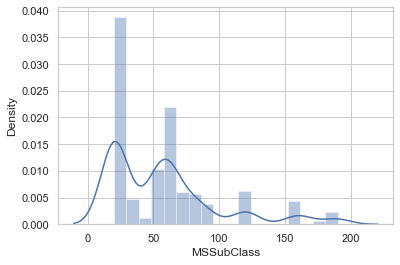

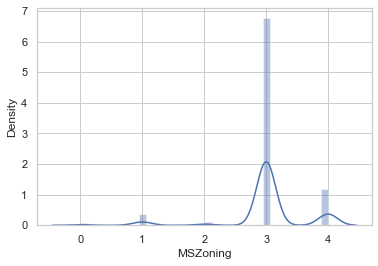

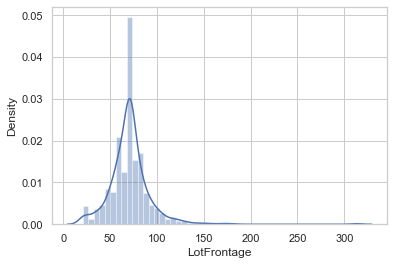

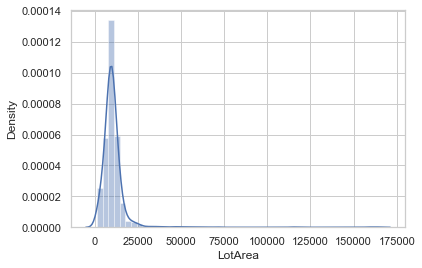

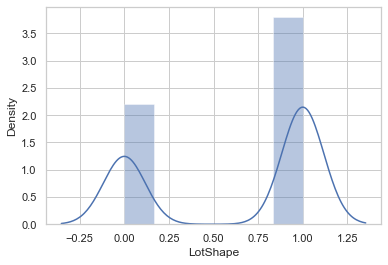

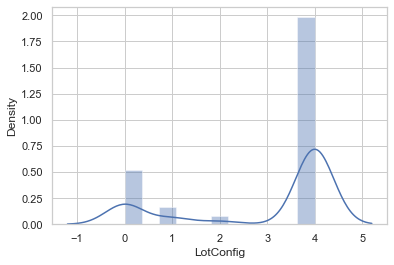

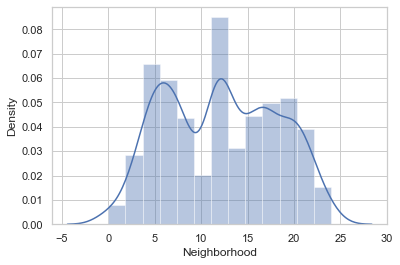

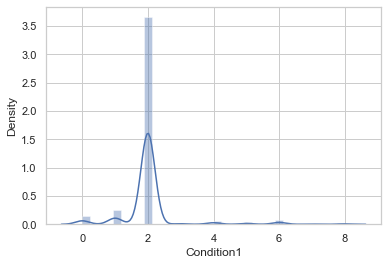

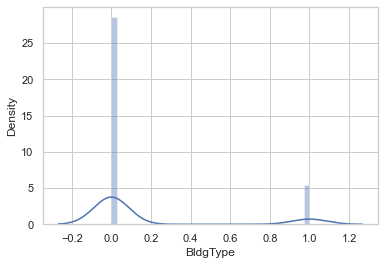

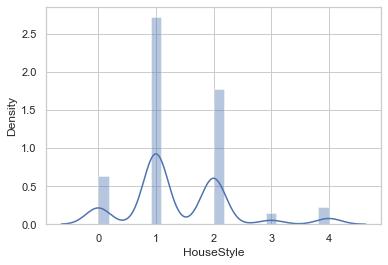

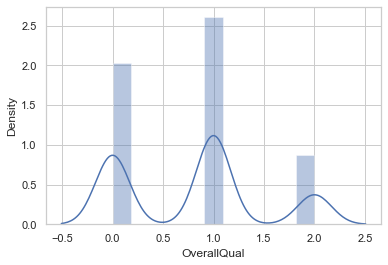

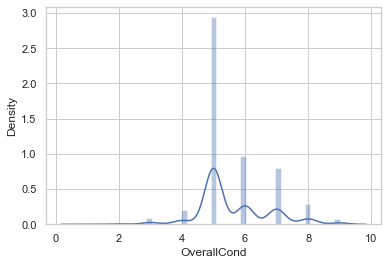

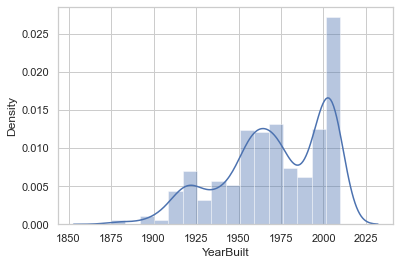

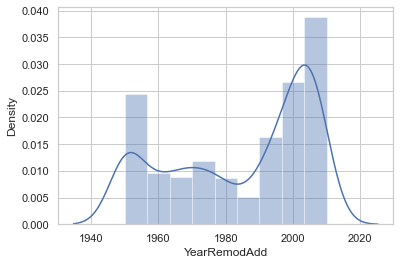

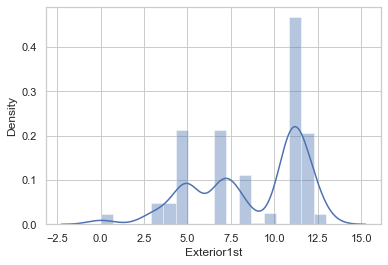

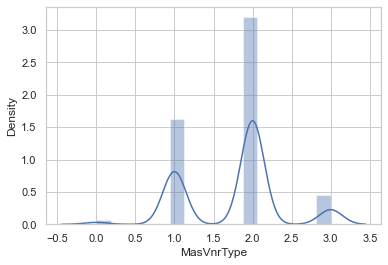

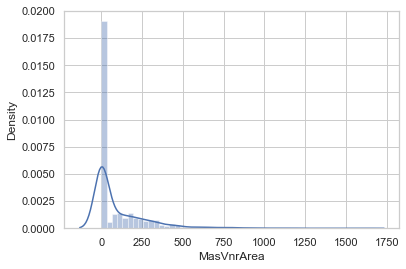

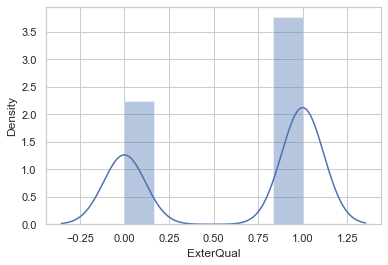

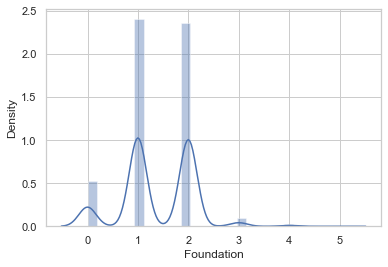

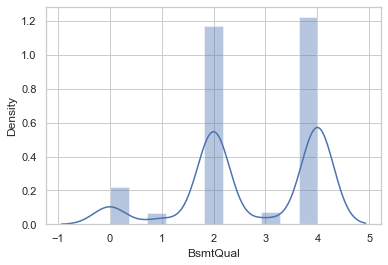

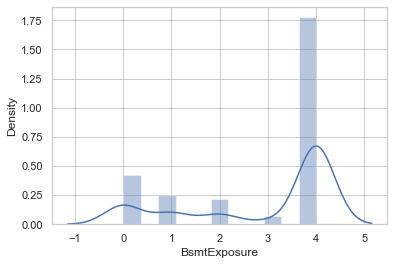

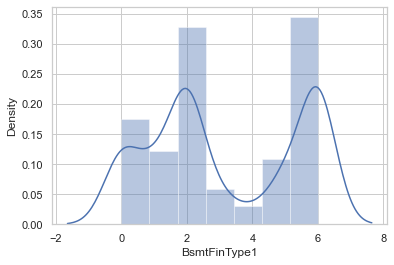

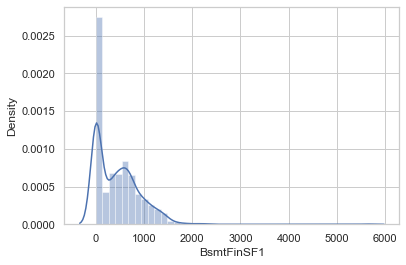

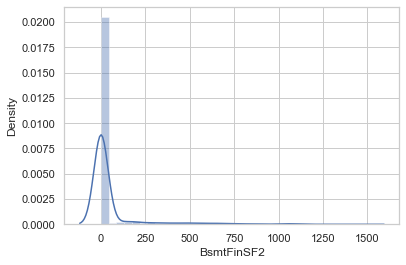

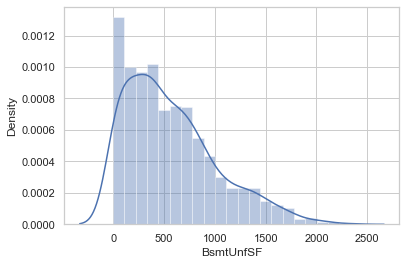

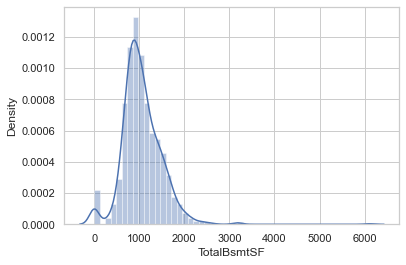

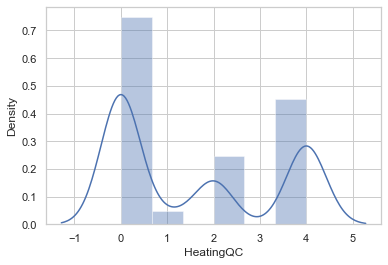

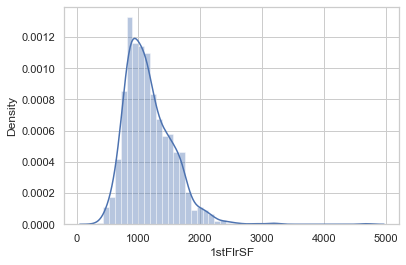

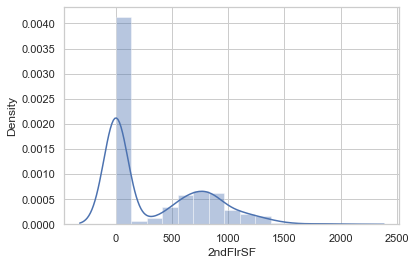

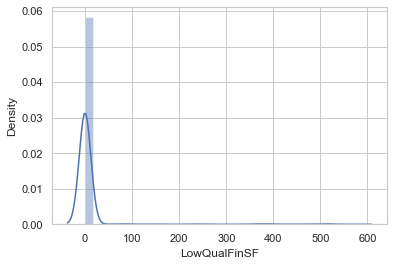

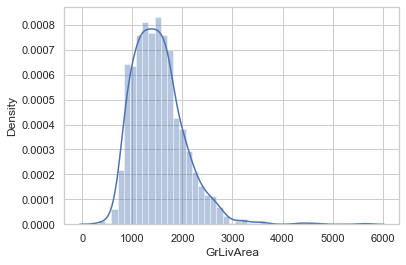

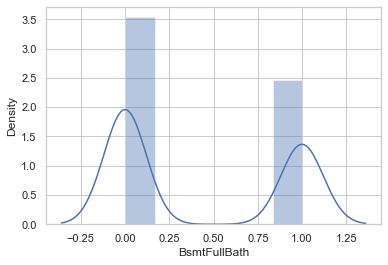

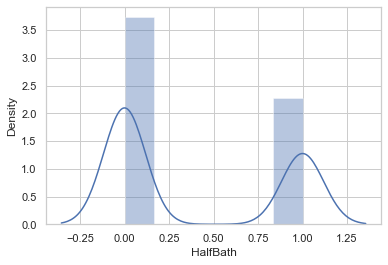

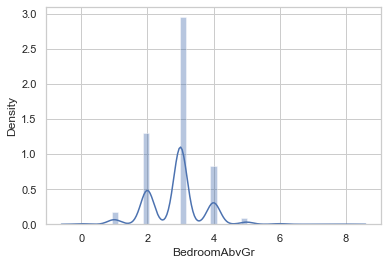

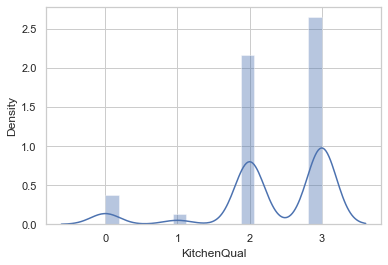

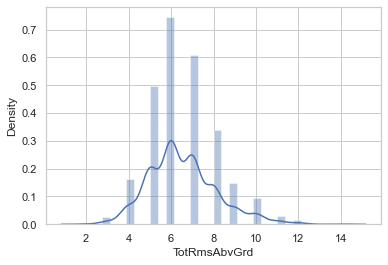

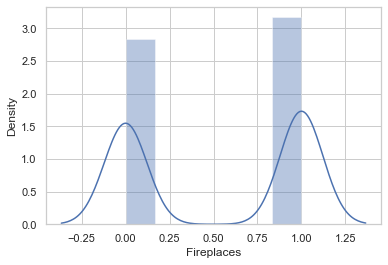

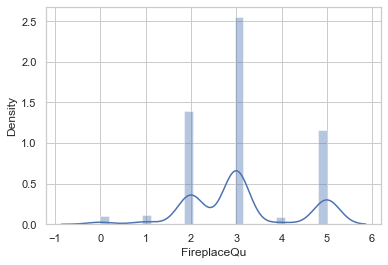

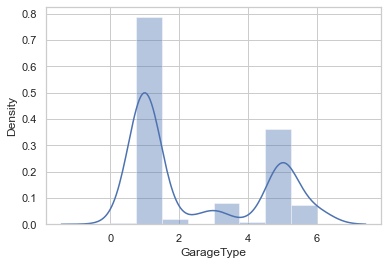

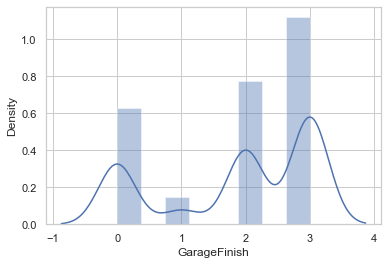

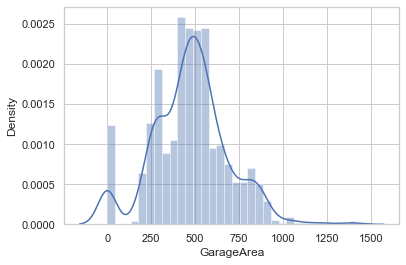

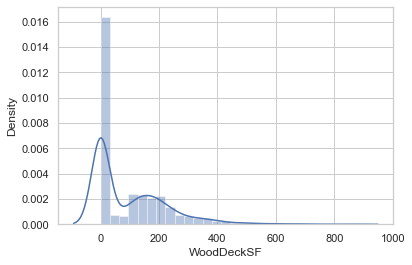

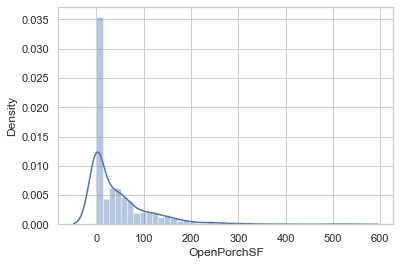

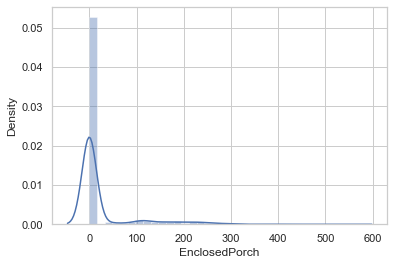

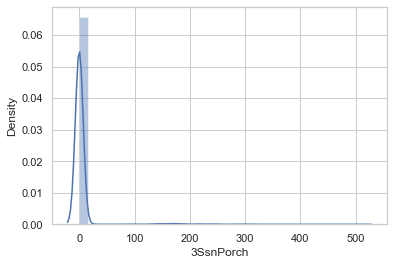

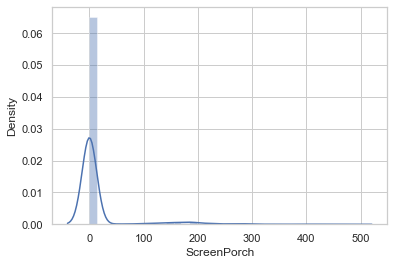

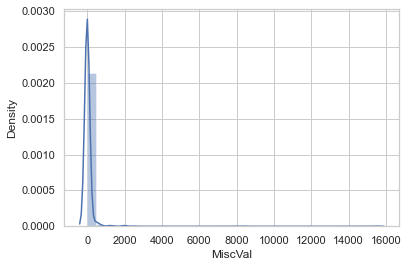

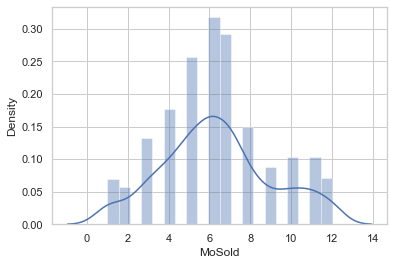

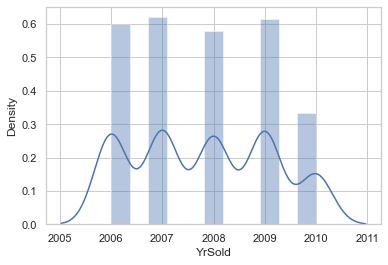

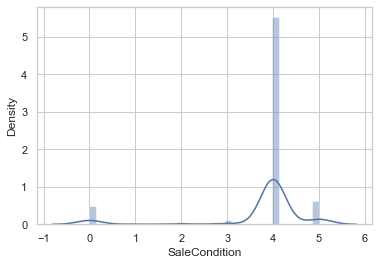

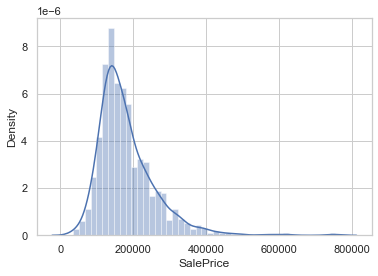

In [157]:
for j in house_train:
    sns.distplot(house_train[j])
    plt.show()

In [158]:
#dropping as the columns is highly biased
house_train.drop(columns=['MiscVal'],inplace=True)
house_test.drop(columns=['MiscVal'],inplace=True)

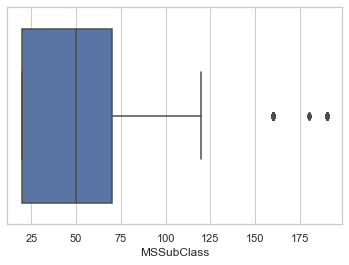

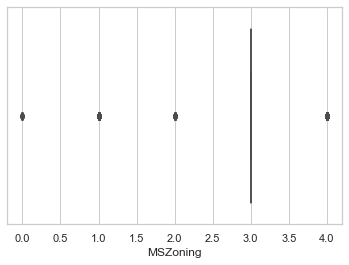

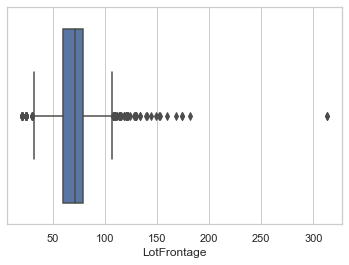

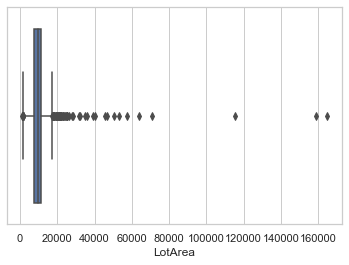

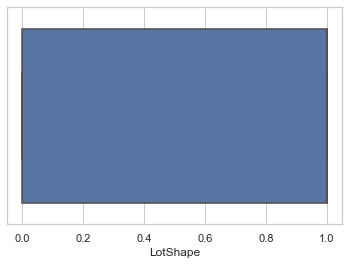

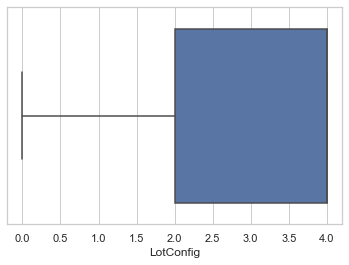

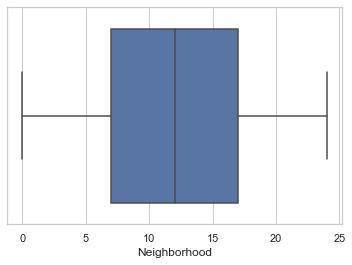

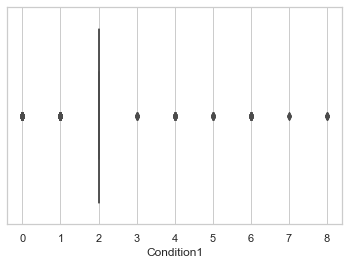

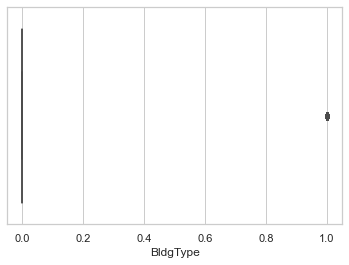

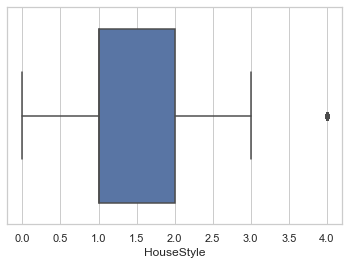

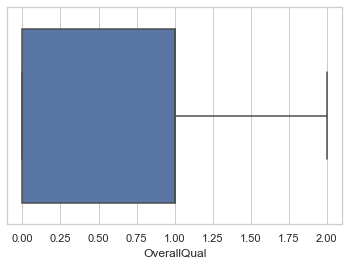

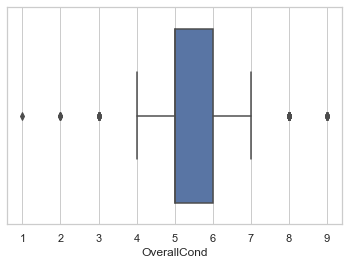

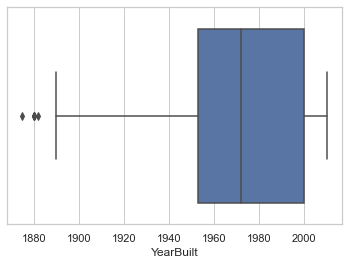

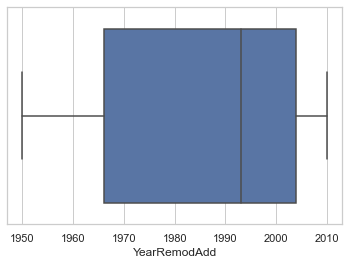

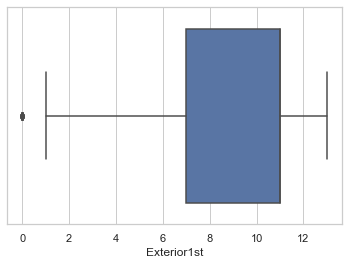

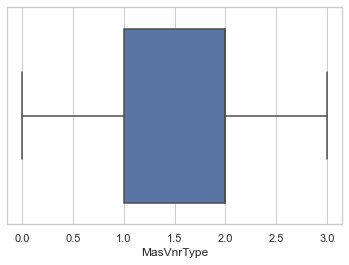

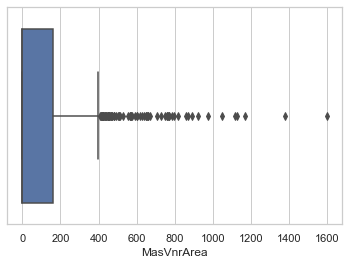

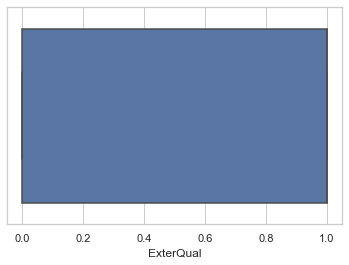

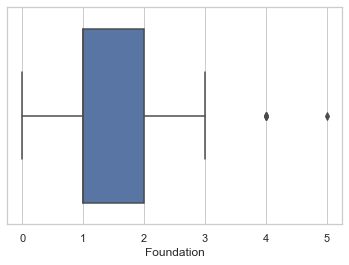

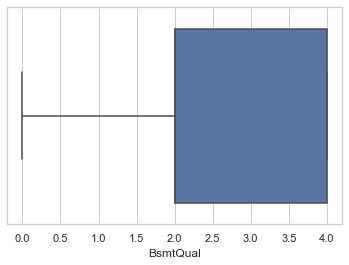

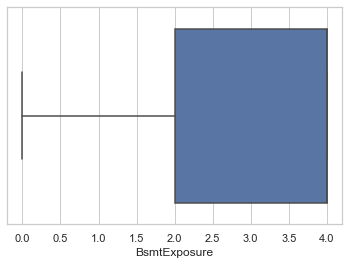

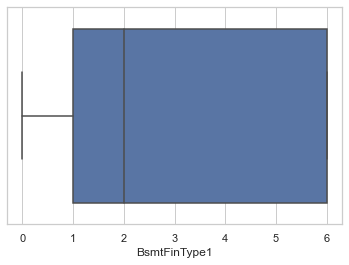

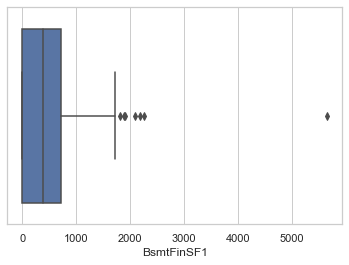

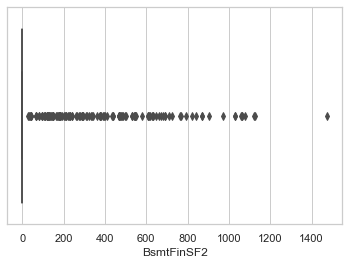

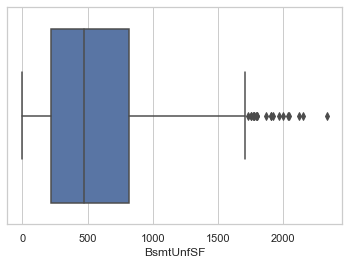

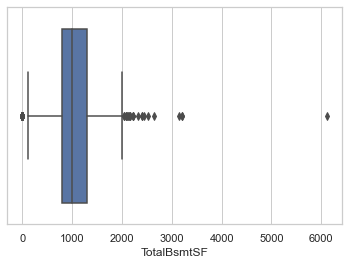

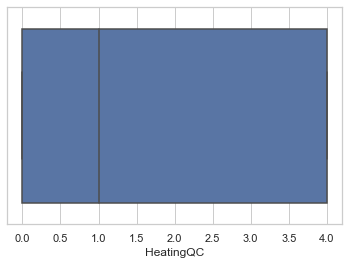

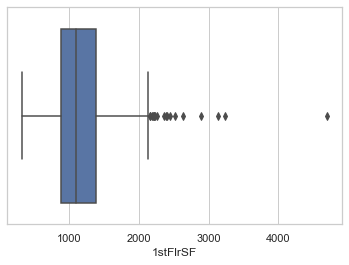

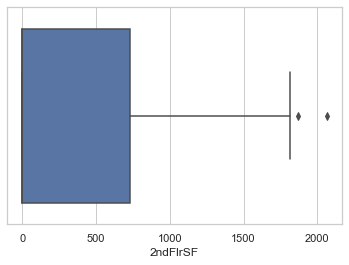

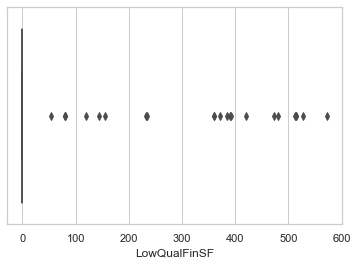

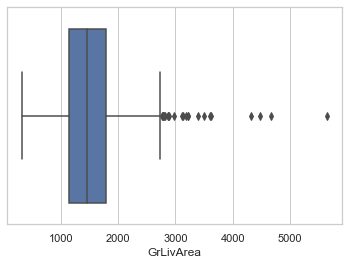

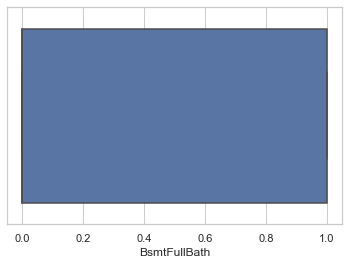

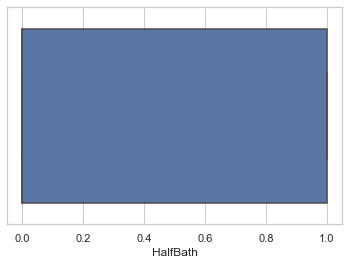

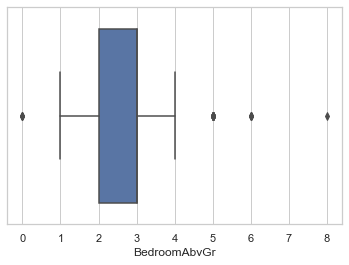

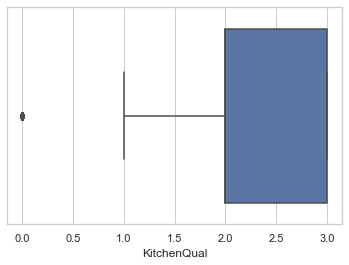

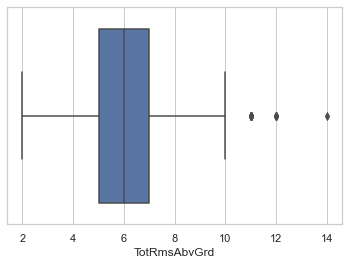

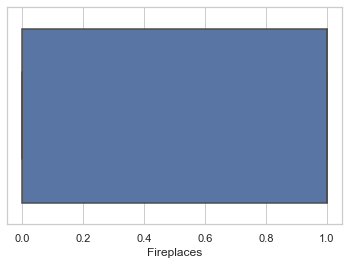

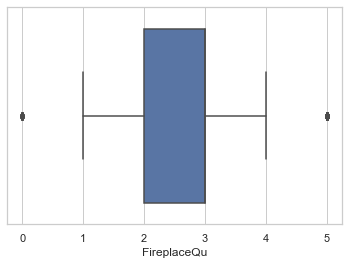

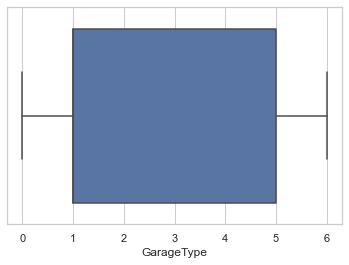

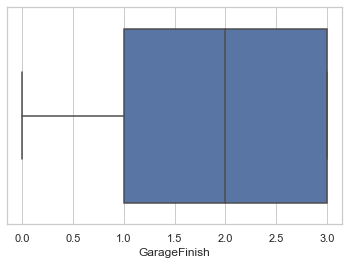

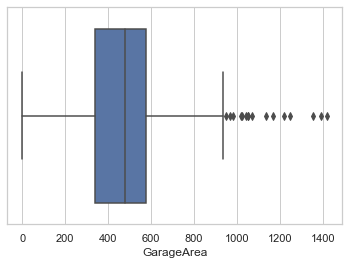

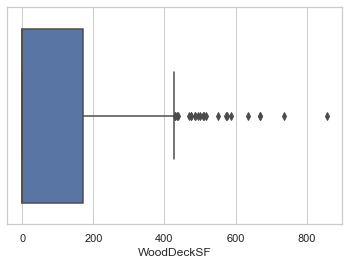

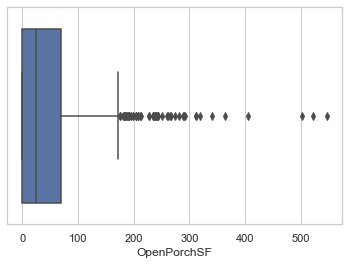

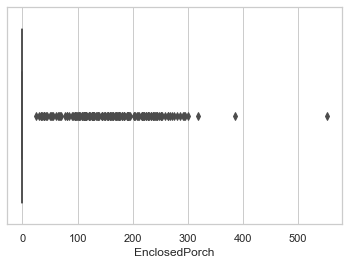

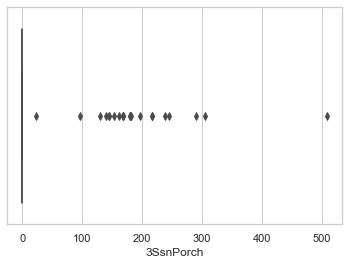

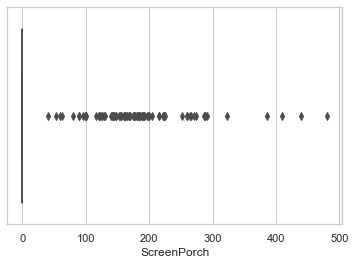

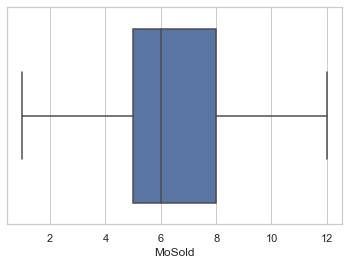

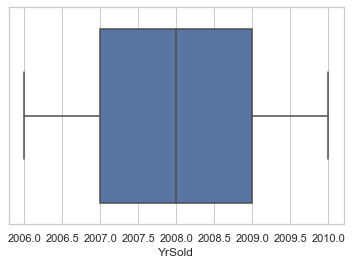

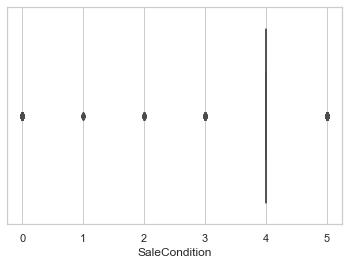

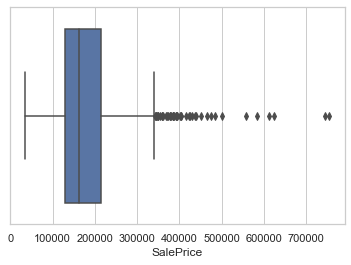

In [159]:
#visualizing the outliers in the data
for k in house_train:
    sns.boxplot(house_train[k])
    plt.show()

In [160]:
def outlier_count(df,column):
    mean = np.mean(df[column])
    std = np.std(df[column])
    threshold = 3
    count=0
    for i in df[column]:
        z = (i-mean)/std
        if z > threshold:
            count+=1
    print(column+' outliers count : ',count)

for i in house_train:
    outlier_count(house_train,i)

MSSubClass outliers count :  26
MSZoning outliers count :  0
LotFrontage outliers count :  13
LotArea outliers count :  12
LotShape outliers count :  0
LotConfig outliers count :  0
Neighborhood outliers count :  0
Condition1 outliers count :  35
BldgType outliers count :  0
HouseStyle outliers count :  0
OverallQual outliers count :  0
OverallCond outliers count :  16
YearBuilt outliers count :  0
YearRemodAdd outliers count :  0
Exterior1st outliers count :  0
MasVnrType outliers count :  0
MasVnrArea outliers count :  28
ExterQual outliers count :  0
Foundation outliers count :  6
BsmtQual outliers count :  0
BsmtExposure outliers count :  0
BsmtFinType1 outliers count :  0
BsmtFinSF1 outliers count :  6
BsmtFinSF2 outliers count :  39
BsmtUnfSF outliers count :  8
TotalBsmtSF outliers count :  9
HeatingQC outliers count :  0
1stFlrSF outliers count :  10
2ndFlrSF outliers count :  4
LowQualFinSF outliers count :  16
GrLivArea outliers count :  13
BsmtFullBath outliers count :  0
Ha

In [161]:
#arresting the outliers using IQR method
def out(df,col):
    Q1=df[col].quantile(0.25)
    Q3=df[col].quantile(0.75)
    IQR=Q3-Q1
    whisker_width = 1.5
    news_outliers = df[(df[col] < Q1 - whisker_width*IQR) | (df[col] > Q3 + whisker_width*IQR)]
    lower_whisker = Q1 -(whisker_width*IQR)
    upper_whisker = Q3 + (whisker_width*IQR)
    df[col]=np.where(df[col]>upper_whisker,upper_whisker,np.where(df[col]<lower_whisker,lower_whisker,df[col]))

In [162]:
house_train['LowQualFinSF'].value_counts()

0      1138
80        3
360       2
384       1
420       1
473       1
371       1
232       1
513       1
481       1
515       1
514       1
120       1
528       1
572       1
144       1
234       1
390       1
156       1
53        1
392       1
Name: LowQualFinSF, dtype: int64

removing these columns as one individual element out of all the unique elements containing in these columns is heavily which affect ML model negatively

In [163]:
house_train.drop(columns=['BsmtFinSF2','LowQualFinSF','EnclosedPorch','3SsnPorch','ScreenPorch'],inplace=True)
house_test.drop(columns=['BsmtFinSF2','LowQualFinSF','EnclosedPorch','3SsnPorch','ScreenPorch'],inplace=True)

In [164]:
arresting_columns=['LotFrontage','LotArea','YearBuilt','MasVnrArea','BsmtFinSF1','BsmtUnfSF','TotalBsmtSF','1stFlrSF',
                   '2ndFlrSF','GrLivArea','BedroomAbvGr','TotRmsAbvGrd','OpenPorchSF',
                  'GarageArea','WoodDeckSF','SalePrice']
for i in arresting_columns:
    try:
        out(house_train,i)
        out(house_test,i)
    except:
        break


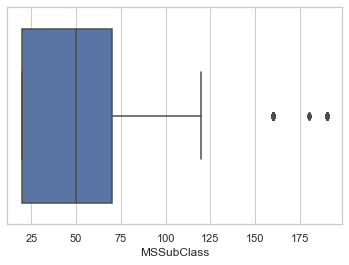

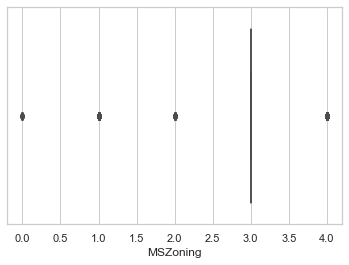

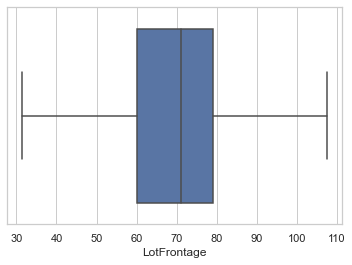

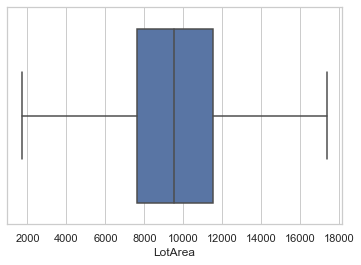

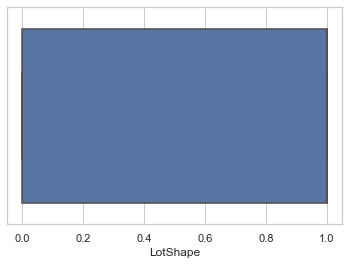

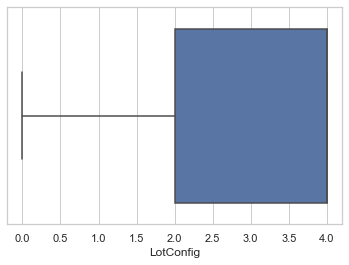

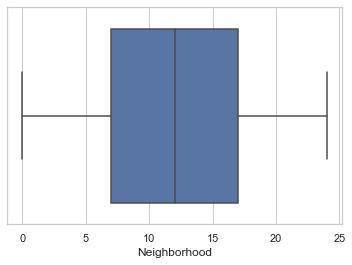

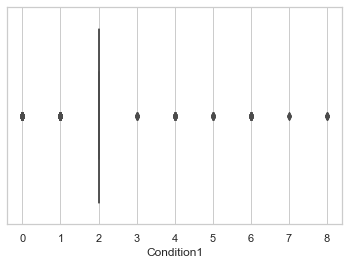

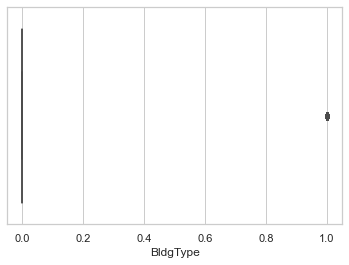

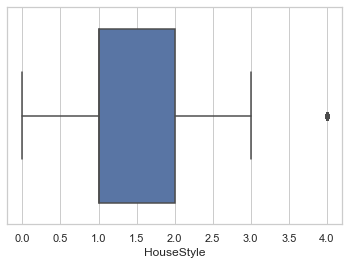

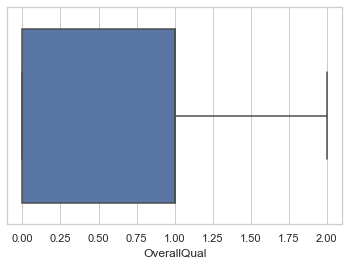

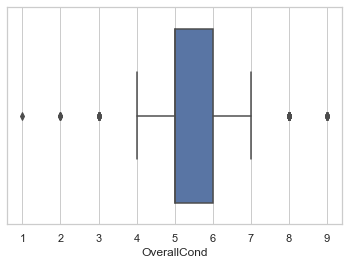

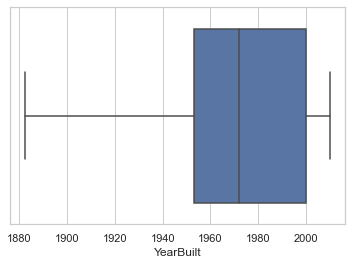

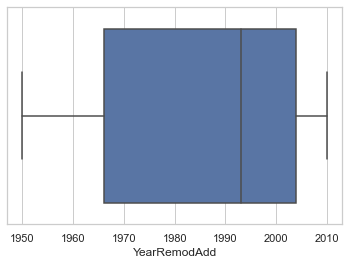

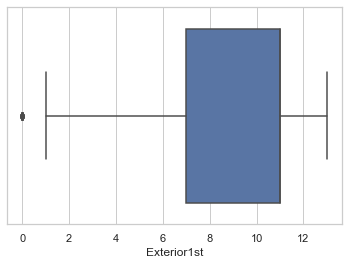

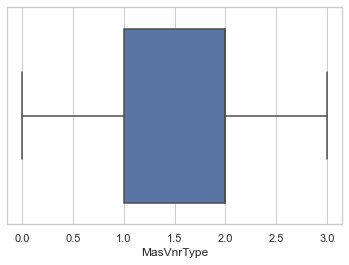

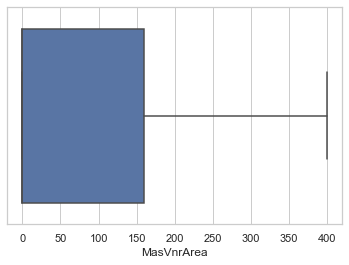

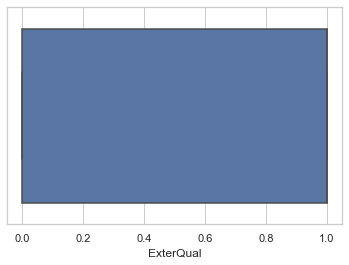

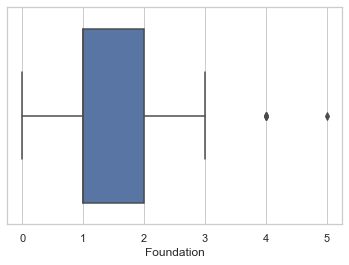

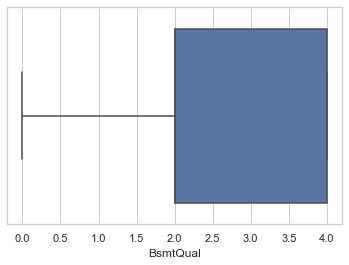

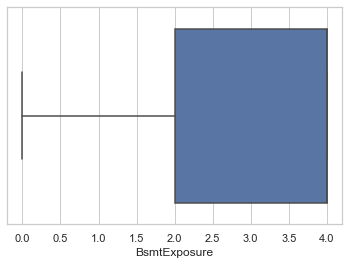

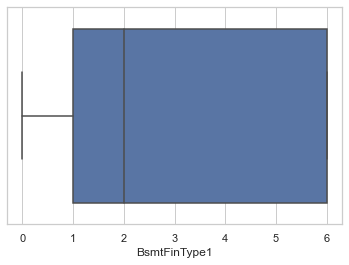

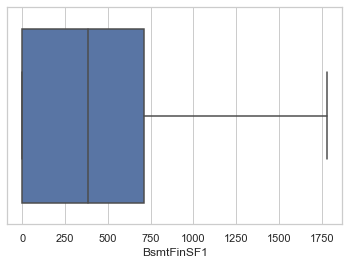

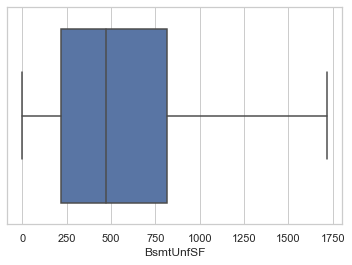

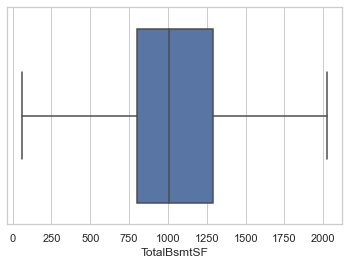

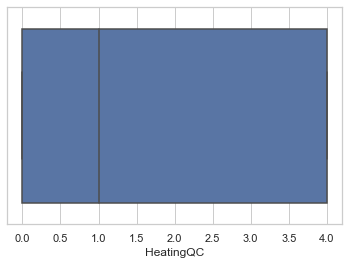

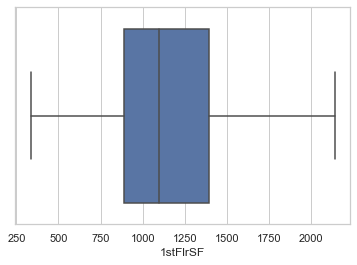

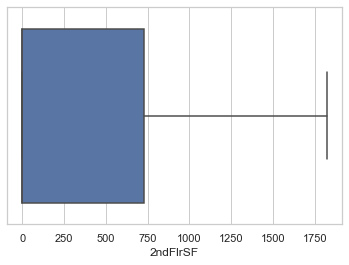

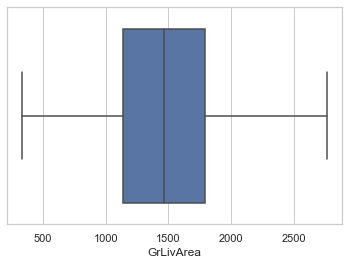

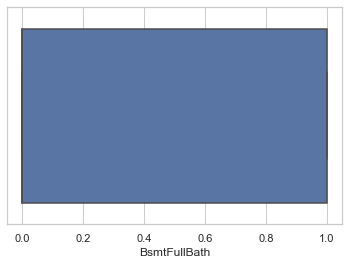

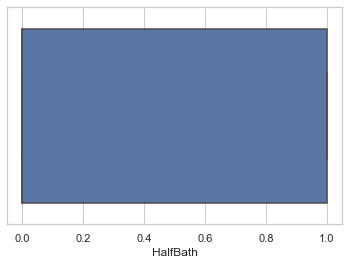

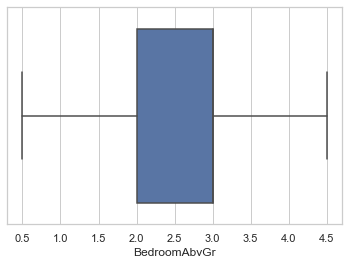

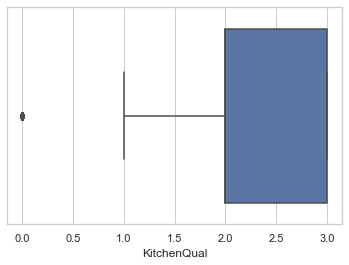

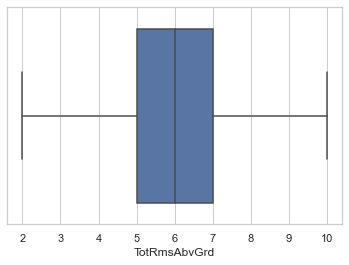

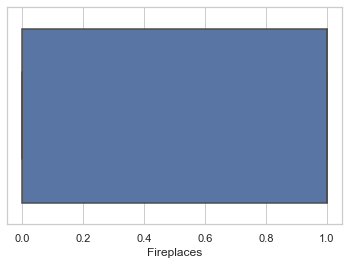

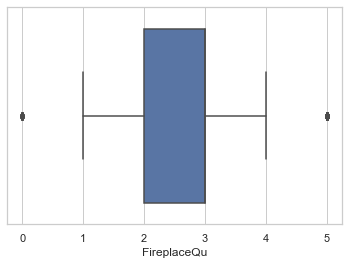

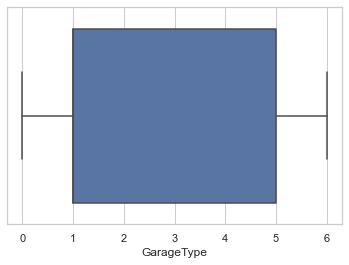

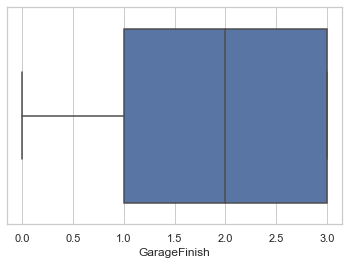

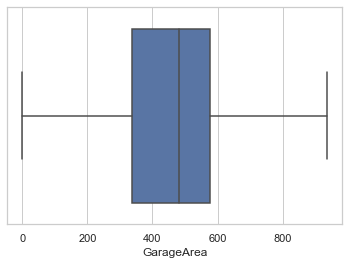

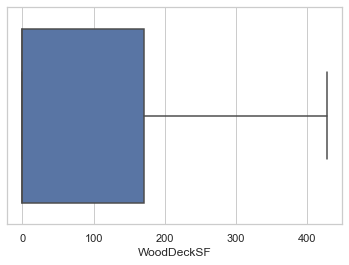

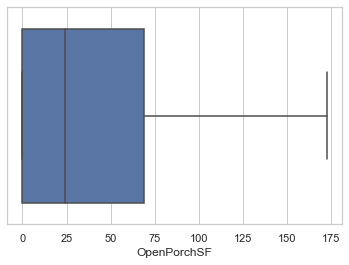

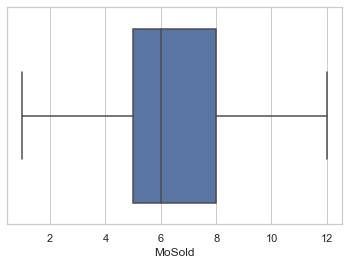

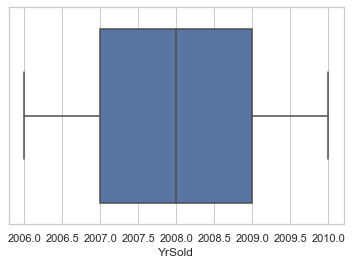

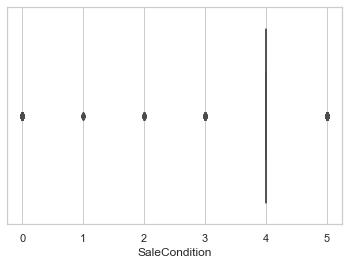

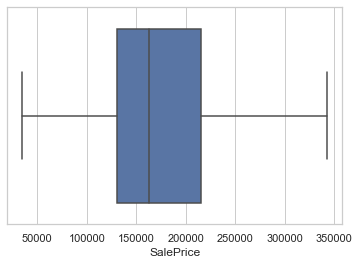

In [165]:
for k in house_train:
    sns.boxplot(house_train[k])
    plt.show()

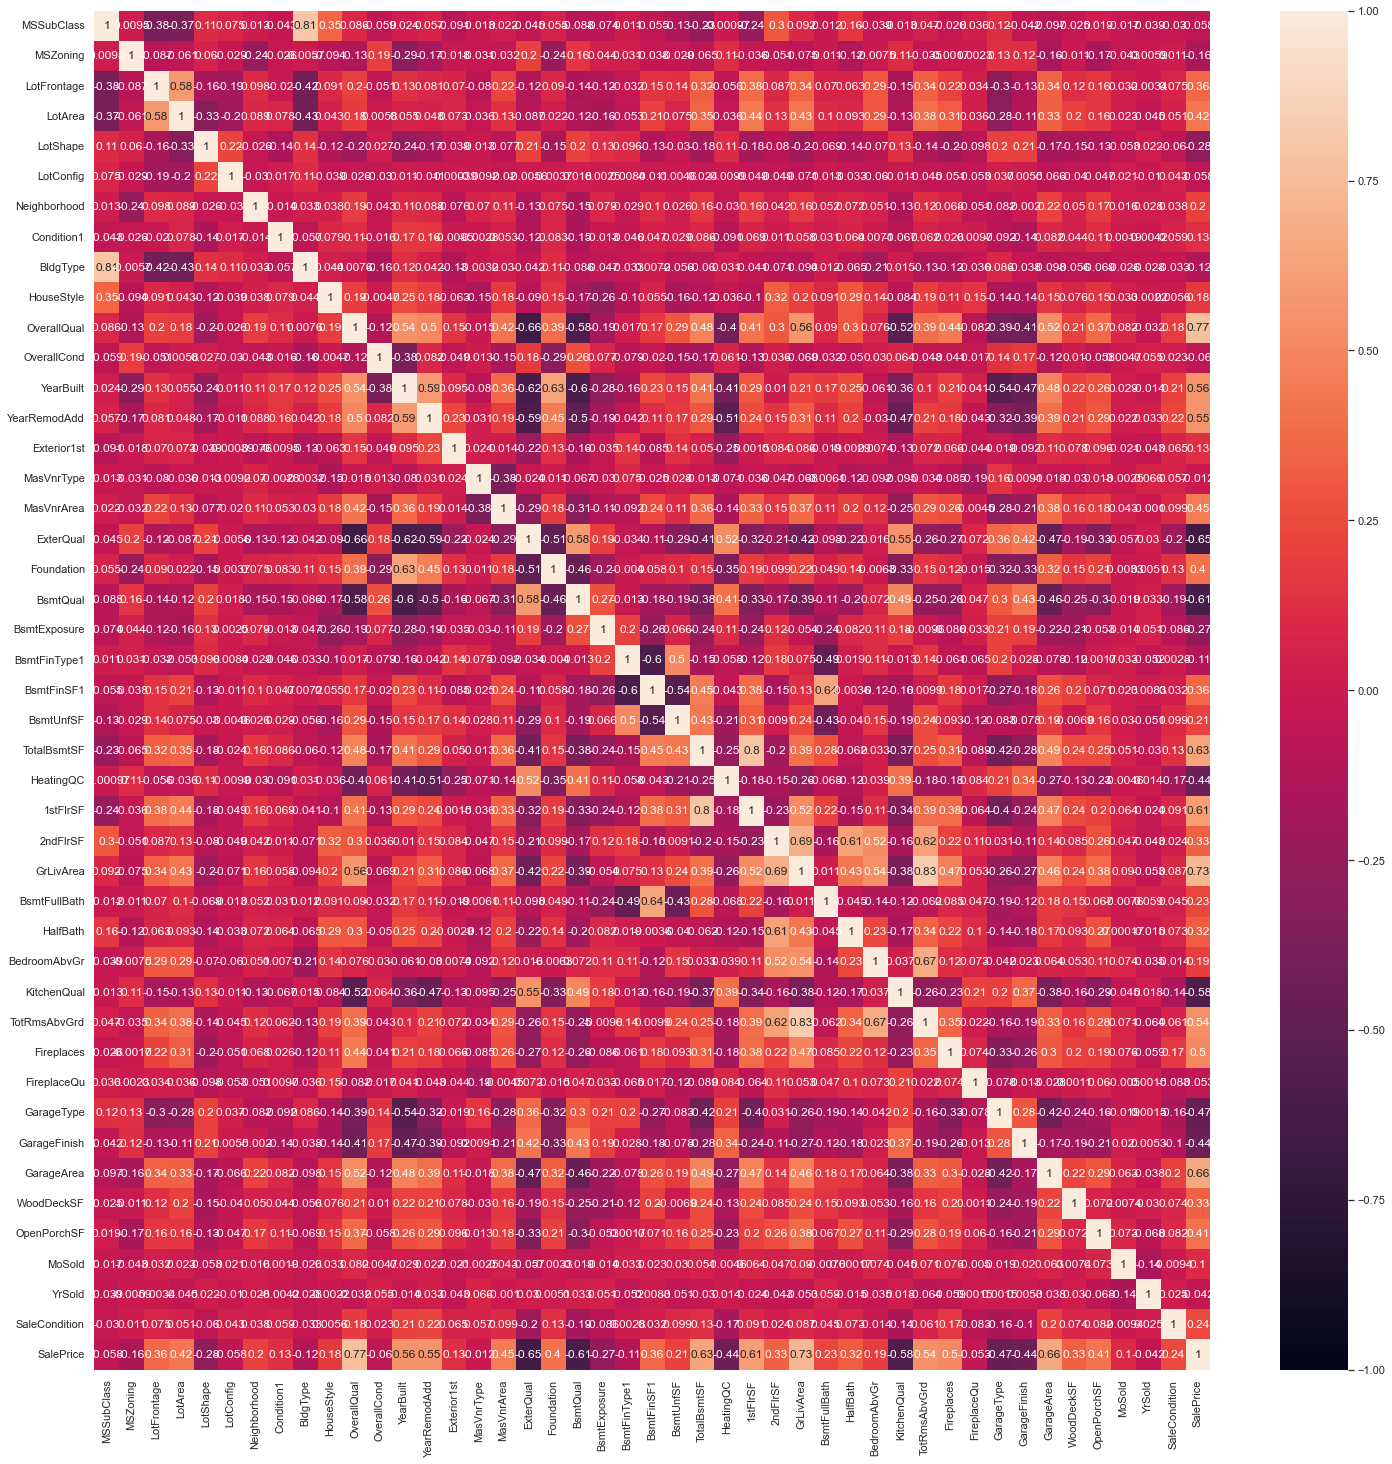

In [166]:
plt.figure(figsize=(25,25))
sns.heatmap(house_train.corr(),vmin=-1,vmax=1, annot=True)
plt.show()

In [167]:
#dropping these columns as they have high corelation with other feature variable in the data
house_train.drop(columns=['MSSubClass','LotFrontage','YearBuilt','ExterQual','BsmtQual',
                         '1stFlrSF','2ndFlrSF','BsmtFinType1','TotRmsAbvGrd'],inplace=True)
house_test.drop(columns=['MSSubClass','LotFrontage','YearBuilt','ExterQual','BsmtQual',
                         '1stFlrSF','2ndFlrSF','BsmtFinType1','TotRmsAbvGrd'],inplace=True)

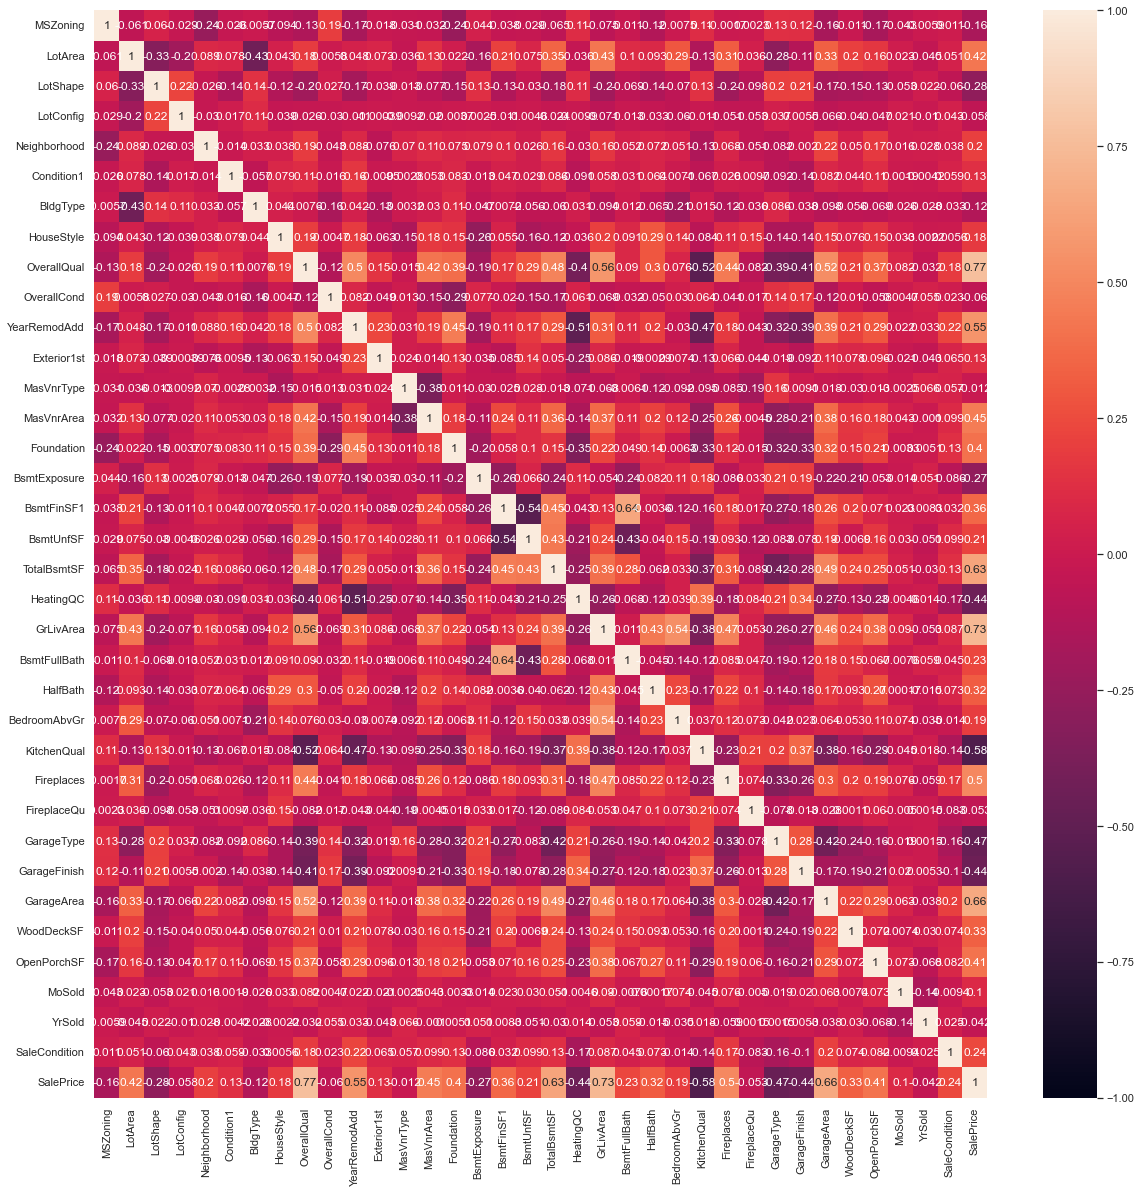

In [168]:
plt.figure(figsize=(20,20))
sns.heatmap(house_train.corr(),vmin=-1,vmax=1, annot=True)
plt.show()

In [169]:
house_train.shape

(1161, 36)

In [170]:
#dropping this column as they have high corelation with other feature variable in the data
house_train.drop(columns=['BsmtUnfSF'],inplace=True)
house_test.drop(columns=['BsmtUnfSF'],inplace=True)

Below the keys point in Summarizing the data analysis of House Price Prediction data:

1. Size of the Dataset is 1161 rows and 35 columns.
2. No missing values in the dataset.
3. Converted ordinal data into numerical data
4. outliers have been dealt with.
5. Feature selection of independent data is done via heatmap and VIF value
6. Separate features and prediction variables into two separate list.


In [171]:
#seperating target variable from feature variable
house_train_X=house_train.drop(columns=['SalePrice'])
house_train_Y=house_train['SalePrice']

In [172]:
#Standardizing the feature data
scalar= StandardScaler()

X_scaled_train= scalar.fit_transform(house_train_X)
vif_data1 = pd.DataFrame()
vif_data1["feature"] = house_train_X.columns

vif_data1["VIF"] = [variance_inflation_factor(X_scaled_train, i) for i in range(X_scaled_train.shape[1])]
  
vif_data1

feature       VIF
0        MSZoning  1.205560
1         LotArea  1.960915
2        LotShape  1.266167
3       LotConfig  1.097631
4    Neighborhood  1.199127
5      Condition1  1.072960
6        BldgType  1.421785
7      HouseStyle  1.449614
8     OverallQual  2.635323
9     OverallCond  1.368062
10   YearRemodAdd  2.216513
11    Exterior1st  1.178831
12     MasVnrType  1.356856
13     MasVnrArea  1.691183
14     Foundation  1.670039
15   BsmtExposure  1.398029
16     BsmtFinSF1  2.174290
17    TotalBsmtSF  2.441946
18      HeatingQC  1.568272
19      GrLivArea  3.610679
20   BsmtFullBath  1.797774
21       HalfBath  1.564752
22   BedroomAbvGr  1.901020
23    KitchenQual  1.767181
24     Fireplaces  1.561921
25    FireplaceQu  1.182944
26     GarageType  1.643279
27   GarageFinish  1.520771
28     GarageArea  1.995544
29     WoodDeckSF  1.190480
30    OpenPorchSF  1.347903
31         MoSold  1.053056
32         YrSold  1.063394
33  SaleCondition  1.123999

In [173]:
X_scaled_test= scalar.fit_transform(house_test)
vif_data2 = pd.DataFrame()
vif_data2["feature"] = house_test.columns

vif_data2["VIF"] = [variance_inflation_factor(X_scaled_test, i) for i in range(X_scaled_test.shape[1])]
  
vif_data2

feature       VIF
0        MSZoning  1.452063
1         LotArea  2.351858
2        LotShape  1.418051
3       LotConfig  1.175323
4    Neighborhood  1.252312
5      Condition1  1.118941
6        BldgType  1.741279
7      HouseStyle  1.411958
8     OverallQual  2.772146
9     OverallCond  1.448603
10   YearRemodAdd  2.072968
11    Exterior1st  1.312046
12     MasVnrType  1.886642
13     MasVnrArea  2.133024
14     Foundation  1.903806
15   BsmtExposure  1.700292
16     BsmtFinSF1  2.530585
17    TotalBsmtSF  3.015018
18      HeatingQC  1.644621
19      GrLivArea  3.931620
20   BsmtFullBath  2.171834
21       HalfBath  1.935847
22   BedroomAbvGr  1.963947
23    KitchenQual  1.817210
24     Fireplaces  1.828264
25    FireplaceQu  1.357036
26     GarageType  1.852790
27   GarageFinish  1.587543
28     GarageArea  2.192186
29     WoodDeckSF  1.429899
30    OpenPorchSF  1.225789
31         MoSold  1.194025
32         YrSold  1.139316
33  SaleCondition  1.299162

# Training ML Model

In [175]:
#train test split
X_train, X_test, Y_train, Y_test = train_test_split(X_scaled_train,house_train_Y, test_size= 0.2, random_state=15)

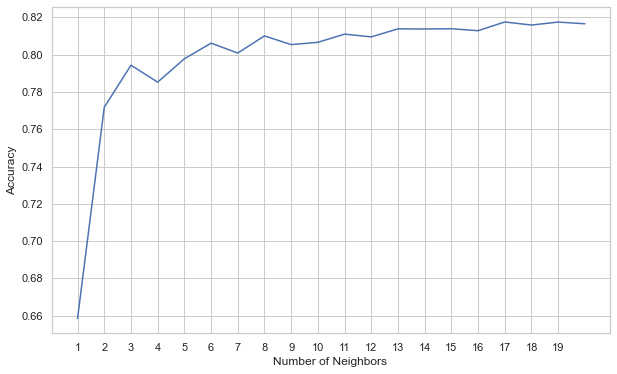

In [96]:
knn_p=KNeighborsRegressor()
mean_acc = np.zeros(20)
for i in range(1,21):
    #Train Model and Predict  
    knn = KNeighborsRegressor(n_neighbors = i).fit(X_train,Y_train)
    yhat2= knn.predict(X_test)
    mean_acc[i-1] = metrics.r2_score(Y_test, yhat2)

loc = np.arange(1,20,step=1.0)
plt.figure(figsize = (10, 6))
plt.plot(range(1,21), mean_acc)
plt.xticks(loc)
plt.xlabel('Number of Neighbors ')
plt.ylabel('Accuracy')
plt.show()

In [97]:
knn=KNeighborsRegressor()
para={
        'n_neighbors':[2,3,4,5,6,9,10,11,14,18,19,20],
        'weights':['uniform', 'distance'],
        'algorithm':['auto', 'ball_tree', 'kd_tree', 'brute','auto'],
        'leaf_size':[30,40,50],
        'p':[2],
        'metric':['minkowski']
    
}
knn_gs= gs(estimator =knn, param_grid=para,cv=5, n_jobs=10)
knn_gs.fit(X_train,Y_train)

GridSearchCV(cv=5, estimator=KNeighborsRegressor(), n_jobs=10,
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute',
                                       'auto'],
                         'leaf_size': [30, 40, 50], 'metric': ['minkowski'],
                         'n_neighbors': [2, 3, 4, 5, 6, 9, 10, 11, 14, 18, 19,
                                         20],
                         'p': [2], 'weights': ['uniform', 'distance']})

In [98]:
knn_gs.best_score_

0.8412776523419275

In [99]:
knn_gs.best_estimator_

KNeighborsRegressor(n_neighbors=6, weights='distance')

In [176]:
model1=KNeighborsRegressor(n_neighbors=6, weights='distance')
model1.fit(X_train,Y_train)

KNeighborsRegressor(n_neighbors=6, weights='distance')

In [177]:
model1.score(X_test, Y_test)

0.8105906393695905

In [178]:
scores1 = cross_val_score(model1, X_test, Y_test, scoring='r2', cv=3)
print('Mean R2 Score for KNeighbors Regression :',mean(scores1),'\nStandard Deviation is : ',std(scores1))

Mean R2 Score for KNeighbors Regression : 0.785010416170378 
Standard Deviation is :  0.013265381833577679


In [179]:
scores1

array([0.77083679, 0.7814536 , 0.80274086])

In [104]:
xgb=XGBRegressor()
param_grid = {
    'n_estimators': [250,300,350],
    'max_depth': [3, 4, 5, 6, 8,10],
    'learning_rate':[0.1,0.15,0.2,0.3],
    'gamma':[0.0,0.1,0.2,0.3],
    'n_jobs':[100,200,300]
}
CV_xgb = gs(xgb,param_grid=param_grid,scoring ='r2',cv=5,verbose=5)
CV_xgb.fit(X_train,Y_train)

Fitting 5 folds for each of 864 candidates, totalling 4320 fits
[CV 1/5] END gamma=0.0, learning_rate=0.1, max_depth=3, n_estimators=250, n_jobs=100;, score=0.896 total time=   0.3s
[CV 2/5] END gamma=0.0, learning_rate=0.1, max_depth=3, n_estimators=250, n_jobs=100;, score=0.891 total time=   0.2s
[CV 3/5] END gamma=0.0, learning_rate=0.1, max_depth=3, n_estimators=250, n_jobs=100;, score=0.844 total time=   0.2s
[CV 4/5] END gamma=0.0, learning_rate=0.1, max_depth=3, n_estimators=250, n_jobs=100;, score=0.883 total time=   0.2s
[CV 5/5] END gamma=0.0, learning_rate=0.1, max_depth=3, n_estimators=250, n_jobs=100;, score=0.914 total time=   0.2s
[CV 1/5] END gamma=0.0, learning_rate=0.1, max_depth=3, n_estimators=250, n_jobs=200;, score=0.896 total time=   0.3s
[CV 2/5] END gamma=0.0, learning_rate=0.1, max_depth=3, n_estimators=250, n_jobs=200;, score=0.891 total time=   0.3s
[CV 3/5] END gamma=0.0, learning_rate=0.1, max_depth=3, n_estimators=250, n_jobs=200;, score=0.844 total time=

[CV 5/5] END gamma=0.0, learning_rate=0.1, max_depth=4, n_estimators=300, n_jobs=200;, score=0.910 total time=   0.5s
[CV 1/5] END gamma=0.0, learning_rate=0.1, max_depth=4, n_estimators=300, n_jobs=300;, score=0.897 total time=   0.8s
[CV 2/5] END gamma=0.0, learning_rate=0.1, max_depth=4, n_estimators=300, n_jobs=300;, score=0.879 total time=   0.9s
[CV 3/5] END gamma=0.0, learning_rate=0.1, max_depth=4, n_estimators=300, n_jobs=300;, score=0.819 total time=   0.9s
[CV 4/5] END gamma=0.0, learning_rate=0.1, max_depth=4, n_estimators=300, n_jobs=300;, score=0.872 total time=   0.9s
[CV 5/5] END gamma=0.0, learning_rate=0.1, max_depth=4, n_estimators=300, n_jobs=300;, score=0.910 total time=   0.9s
[CV 1/5] END gamma=0.0, learning_rate=0.1, max_depth=4, n_estimators=350, n_jobs=100;, score=0.897 total time=   0.4s
[CV 2/5] END gamma=0.0, learning_rate=0.1, max_depth=4, n_estimators=350, n_jobs=100;, score=0.879 total time=   0.4s
[CV 3/5] END gamma=0.0, learning_rate=0.1, max_depth=4, 

[CV 5/5] END gamma=0.0, learning_rate=0.1, max_depth=6, n_estimators=250, n_jobs=100;, score=0.903 total time=   0.6s
[CV 1/5] END gamma=0.0, learning_rate=0.1, max_depth=6, n_estimators=250, n_jobs=200;, score=0.915 total time=   0.9s
[CV 2/5] END gamma=0.0, learning_rate=0.1, max_depth=6, n_estimators=250, n_jobs=200;, score=0.879 total time=   0.9s
[CV 3/5] END gamma=0.0, learning_rate=0.1, max_depth=6, n_estimators=250, n_jobs=200;, score=0.812 total time=   0.9s
[CV 4/5] END gamma=0.0, learning_rate=0.1, max_depth=6, n_estimators=250, n_jobs=200;, score=0.874 total time=   0.9s
[CV 5/5] END gamma=0.0, learning_rate=0.1, max_depth=6, n_estimators=250, n_jobs=200;, score=0.903 total time=   0.9s
[CV 1/5] END gamma=0.0, learning_rate=0.1, max_depth=6, n_estimators=250, n_jobs=300;, score=0.915 total time=   1.4s
[CV 2/5] END gamma=0.0, learning_rate=0.1, max_depth=6, n_estimators=250, n_jobs=300;, score=0.879 total time=   1.3s
[CV 3/5] END gamma=0.0, learning_rate=0.1, max_depth=6, 

[CV 5/5] END gamma=0.0, learning_rate=0.1, max_depth=8, n_estimators=300, n_jobs=300;, score=0.901 total time=   3.3s
[CV 1/5] END gamma=0.0, learning_rate=0.1, max_depth=8, n_estimators=350, n_jobs=100;, score=0.905 total time=   1.5s
[CV 2/5] END gamma=0.0, learning_rate=0.1, max_depth=8, n_estimators=350, n_jobs=100;, score=0.869 total time=   1.3s
[CV 3/5] END gamma=0.0, learning_rate=0.1, max_depth=8, n_estimators=350, n_jobs=100;, score=0.799 total time=   1.5s
[CV 4/5] END gamma=0.0, learning_rate=0.1, max_depth=8, n_estimators=350, n_jobs=100;, score=0.876 total time=   1.5s
[CV 5/5] END gamma=0.0, learning_rate=0.1, max_depth=8, n_estimators=350, n_jobs=100;, score=0.901 total time=   1.3s
[CV 1/5] END gamma=0.0, learning_rate=0.1, max_depth=8, n_estimators=350, n_jobs=200;, score=0.905 total time=   2.3s
[CV 2/5] END gamma=0.0, learning_rate=0.1, max_depth=8, n_estimators=350, n_jobs=200;, score=0.869 total time=   2.2s
[CV 3/5] END gamma=0.0, learning_rate=0.1, max_depth=8, 

[CV 4/5] END gamma=0.0, learning_rate=0.15, max_depth=3, n_estimators=250, n_jobs=200;, score=0.874 total time=   0.3s
[CV 5/5] END gamma=0.0, learning_rate=0.15, max_depth=3, n_estimators=250, n_jobs=200;, score=0.920 total time=   0.3s
[CV 1/5] END gamma=0.0, learning_rate=0.15, max_depth=3, n_estimators=250, n_jobs=300;, score=0.895 total time=   0.5s
[CV 2/5] END gamma=0.0, learning_rate=0.15, max_depth=3, n_estimators=250, n_jobs=300;, score=0.889 total time=   0.4s
[CV 3/5] END gamma=0.0, learning_rate=0.15, max_depth=3, n_estimators=250, n_jobs=300;, score=0.858 total time=   0.4s
[CV 4/5] END gamma=0.0, learning_rate=0.15, max_depth=3, n_estimators=250, n_jobs=300;, score=0.874 total time=   0.4s
[CV 5/5] END gamma=0.0, learning_rate=0.15, max_depth=3, n_estimators=250, n_jobs=300;, score=0.920 total time=   0.4s
[CV 1/5] END gamma=0.0, learning_rate=0.15, max_depth=3, n_estimators=300, n_jobs=100;, score=0.895 total time=   0.2s
[CV 2/5] END gamma=0.0, learning_rate=0.15, max_

[CV 3/5] END gamma=0.0, learning_rate=0.15, max_depth=4, n_estimators=350, n_jobs=100;, score=0.827 total time=   0.4s
[CV 4/5] END gamma=0.0, learning_rate=0.15, max_depth=4, n_estimators=350, n_jobs=100;, score=0.880 total time=   0.4s
[CV 5/5] END gamma=0.0, learning_rate=0.15, max_depth=4, n_estimators=350, n_jobs=100;, score=0.906 total time=   0.4s
[CV 1/5] END gamma=0.0, learning_rate=0.15, max_depth=4, n_estimators=350, n_jobs=200;, score=0.896 total time=   0.7s
[CV 2/5] END gamma=0.0, learning_rate=0.15, max_depth=4, n_estimators=350, n_jobs=200;, score=0.864 total time=   0.7s
[CV 3/5] END gamma=0.0, learning_rate=0.15, max_depth=4, n_estimators=350, n_jobs=200;, score=0.827 total time=   0.7s
[CV 4/5] END gamma=0.0, learning_rate=0.15, max_depth=4, n_estimators=350, n_jobs=200;, score=0.880 total time=   0.7s
[CV 5/5] END gamma=0.0, learning_rate=0.15, max_depth=4, n_estimators=350, n_jobs=200;, score=0.906 total time=   0.7s
[CV 1/5] END gamma=0.0, learning_rate=0.15, max_

[CV 2/5] END gamma=0.0, learning_rate=0.15, max_depth=6, n_estimators=250, n_jobs=300;, score=0.876 total time=   1.3s
[CV 3/5] END gamma=0.0, learning_rate=0.15, max_depth=6, n_estimators=250, n_jobs=300;, score=0.804 total time=   1.3s
[CV 4/5] END gamma=0.0, learning_rate=0.15, max_depth=6, n_estimators=250, n_jobs=300;, score=0.864 total time=   1.3s
[CV 5/5] END gamma=0.0, learning_rate=0.15, max_depth=6, n_estimators=250, n_jobs=300;, score=0.911 total time=   1.3s
[CV 1/5] END gamma=0.0, learning_rate=0.15, max_depth=6, n_estimators=300, n_jobs=100;, score=0.905 total time=   0.8s
[CV 2/5] END gamma=0.0, learning_rate=0.15, max_depth=6, n_estimators=300, n_jobs=100;, score=0.876 total time=   0.8s
[CV 3/5] END gamma=0.0, learning_rate=0.15, max_depth=6, n_estimators=300, n_jobs=100;, score=0.804 total time=   0.8s
[CV 4/5] END gamma=0.0, learning_rate=0.15, max_depth=6, n_estimators=300, n_jobs=100;, score=0.864 total time=   0.8s
[CV 5/5] END gamma=0.0, learning_rate=0.15, max_

[CV 1/5] END gamma=0.0, learning_rate=0.15, max_depth=8, n_estimators=350, n_jobs=200;, score=0.911 total time=   2.2s
[CV 2/5] END gamma=0.0, learning_rate=0.15, max_depth=8, n_estimators=350, n_jobs=200;, score=0.870 total time=   2.3s
[CV 3/5] END gamma=0.0, learning_rate=0.15, max_depth=8, n_estimators=350, n_jobs=200;, score=0.808 total time=   2.2s
[CV 4/5] END gamma=0.0, learning_rate=0.15, max_depth=8, n_estimators=350, n_jobs=200;, score=0.870 total time=   2.3s
[CV 5/5] END gamma=0.0, learning_rate=0.15, max_depth=8, n_estimators=350, n_jobs=200;, score=0.906 total time=   2.7s
[CV 1/5] END gamma=0.0, learning_rate=0.15, max_depth=8, n_estimators=350, n_jobs=300;, score=0.911 total time=   3.3s
[CV 2/5] END gamma=0.0, learning_rate=0.15, max_depth=8, n_estimators=350, n_jobs=300;, score=0.870 total time=   3.5s
[CV 3/5] END gamma=0.0, learning_rate=0.15, max_depth=8, n_estimators=350, n_jobs=300;, score=0.808 total time=   3.5s
[CV 4/5] END gamma=0.0, learning_rate=0.15, max_

[CV 5/5] END gamma=0.0, learning_rate=0.2, max_depth=3, n_estimators=250, n_jobs=300;, score=0.911 total time=   0.4s
[CV 1/5] END gamma=0.0, learning_rate=0.2, max_depth=3, n_estimators=300, n_jobs=100;, score=0.896 total time=   0.2s
[CV 2/5] END gamma=0.0, learning_rate=0.2, max_depth=3, n_estimators=300, n_jobs=100;, score=0.884 total time=   0.2s
[CV 3/5] END gamma=0.0, learning_rate=0.2, max_depth=3, n_estimators=300, n_jobs=100;, score=0.861 total time=   0.2s
[CV 4/5] END gamma=0.0, learning_rate=0.2, max_depth=3, n_estimators=300, n_jobs=100;, score=0.883 total time=   0.2s
[CV 5/5] END gamma=0.0, learning_rate=0.2, max_depth=3, n_estimators=300, n_jobs=100;, score=0.910 total time=   0.2s
[CV 1/5] END gamma=0.0, learning_rate=0.2, max_depth=3, n_estimators=300, n_jobs=200;, score=0.896 total time=   0.4s
[CV 2/5] END gamma=0.0, learning_rate=0.2, max_depth=3, n_estimators=300, n_jobs=200;, score=0.884 total time=   0.4s
[CV 3/5] END gamma=0.0, learning_rate=0.2, max_depth=3, 

[CV 5/5] END gamma=0.0, learning_rate=0.2, max_depth=4, n_estimators=350, n_jobs=200;, score=0.922 total time=   0.7s
[CV 1/5] END gamma=0.0, learning_rate=0.2, max_depth=4, n_estimators=350, n_jobs=300;, score=0.899 total time=   1.0s
[CV 2/5] END gamma=0.0, learning_rate=0.2, max_depth=4, n_estimators=350, n_jobs=300;, score=0.873 total time=   0.9s
[CV 3/5] END gamma=0.0, learning_rate=0.2, max_depth=4, n_estimators=350, n_jobs=300;, score=0.819 total time=   0.9s
[CV 4/5] END gamma=0.0, learning_rate=0.2, max_depth=4, n_estimators=350, n_jobs=300;, score=0.864 total time=   1.0s
[CV 5/5] END gamma=0.0, learning_rate=0.2, max_depth=4, n_estimators=350, n_jobs=300;, score=0.922 total time=   1.0s
[CV 1/5] END gamma=0.0, learning_rate=0.2, max_depth=5, n_estimators=250, n_jobs=100;, score=0.900 total time=   0.4s
[CV 2/5] END gamma=0.0, learning_rate=0.2, max_depth=5, n_estimators=250, n_jobs=100;, score=0.877 total time=   0.4s
[CV 3/5] END gamma=0.0, learning_rate=0.2, max_depth=5, 

[CV 5/5] END gamma=0.0, learning_rate=0.2, max_depth=6, n_estimators=300, n_jobs=100;, score=0.905 total time=   0.8s
[CV 1/5] END gamma=0.0, learning_rate=0.2, max_depth=6, n_estimators=300, n_jobs=200;, score=0.909 total time=   1.1s
[CV 2/5] END gamma=0.0, learning_rate=0.2, max_depth=6, n_estimators=300, n_jobs=200;, score=0.868 total time=   1.3s
[CV 3/5] END gamma=0.0, learning_rate=0.2, max_depth=6, n_estimators=300, n_jobs=200;, score=0.798 total time=   1.2s
[CV 4/5] END gamma=0.0, learning_rate=0.2, max_depth=6, n_estimators=300, n_jobs=200;, score=0.859 total time=   1.2s
[CV 5/5] END gamma=0.0, learning_rate=0.2, max_depth=6, n_estimators=300, n_jobs=200;, score=0.905 total time=   1.2s
[CV 1/5] END gamma=0.0, learning_rate=0.2, max_depth=6, n_estimators=300, n_jobs=300;, score=0.909 total time=   1.6s
[CV 2/5] END gamma=0.0, learning_rate=0.2, max_depth=6, n_estimators=300, n_jobs=300;, score=0.868 total time=   1.6s
[CV 3/5] END gamma=0.0, learning_rate=0.2, max_depth=6, 

[CV 5/5] END gamma=0.0, learning_rate=0.2, max_depth=8, n_estimators=350, n_jobs=300;, score=0.890 total time=   3.2s
[CV 1/5] END gamma=0.0, learning_rate=0.2, max_depth=10, n_estimators=250, n_jobs=100;, score=0.897 total time=   1.5s
[CV 2/5] END gamma=0.0, learning_rate=0.2, max_depth=10, n_estimators=250, n_jobs=100;, score=0.857 total time=   1.3s
[CV 3/5] END gamma=0.0, learning_rate=0.2, max_depth=10, n_estimators=250, n_jobs=100;, score=0.803 total time=   1.4s
[CV 4/5] END gamma=0.0, learning_rate=0.2, max_depth=10, n_estimators=250, n_jobs=100;, score=0.858 total time=   1.4s
[CV 5/5] END gamma=0.0, learning_rate=0.2, max_depth=10, n_estimators=250, n_jobs=100;, score=0.896 total time=   1.5s
[CV 1/5] END gamma=0.0, learning_rate=0.2, max_depth=10, n_estimators=250, n_jobs=200;, score=0.897 total time=   2.4s
[CV 2/5] END gamma=0.0, learning_rate=0.2, max_depth=10, n_estimators=250, n_jobs=200;, score=0.857 total time=   2.2s
[CV 3/5] END gamma=0.0, learning_rate=0.2, max_de

[CV 5/5] END gamma=0.0, learning_rate=0.3, max_depth=3, n_estimators=300, n_jobs=200;, score=0.914 total time=   0.4s
[CV 1/5] END gamma=0.0, learning_rate=0.3, max_depth=3, n_estimators=300, n_jobs=300;, score=0.900 total time=   0.7s
[CV 2/5] END gamma=0.0, learning_rate=0.3, max_depth=3, n_estimators=300, n_jobs=300;, score=0.875 total time=   0.6s
[CV 3/5] END gamma=0.0, learning_rate=0.3, max_depth=3, n_estimators=300, n_jobs=300;, score=0.847 total time=   0.6s
[CV 4/5] END gamma=0.0, learning_rate=0.3, max_depth=3, n_estimators=300, n_jobs=300;, score=0.877 total time=   0.6s
[CV 5/5] END gamma=0.0, learning_rate=0.3, max_depth=3, n_estimators=300, n_jobs=300;, score=0.914 total time=   0.6s
[CV 1/5] END gamma=0.0, learning_rate=0.3, max_depth=3, n_estimators=350, n_jobs=100;, score=0.899 total time=   0.3s
[CV 2/5] END gamma=0.0, learning_rate=0.3, max_depth=3, n_estimators=350, n_jobs=100;, score=0.874 total time=   0.2s
[CV 3/5] END gamma=0.0, learning_rate=0.3, max_depth=3, 

[CV 5/5] END gamma=0.0, learning_rate=0.3, max_depth=5, n_estimators=250, n_jobs=100;, score=0.884 total time=   0.4s
[CV 1/5] END gamma=0.0, learning_rate=0.3, max_depth=5, n_estimators=250, n_jobs=200;, score=0.904 total time=   0.7s
[CV 2/5] END gamma=0.0, learning_rate=0.3, max_depth=5, n_estimators=250, n_jobs=200;, score=0.865 total time=   0.7s
[CV 3/5] END gamma=0.0, learning_rate=0.3, max_depth=5, n_estimators=250, n_jobs=200;, score=0.808 total time=   0.7s
[CV 4/5] END gamma=0.0, learning_rate=0.3, max_depth=5, n_estimators=250, n_jobs=200;, score=0.854 total time=   0.7s
[CV 5/5] END gamma=0.0, learning_rate=0.3, max_depth=5, n_estimators=250, n_jobs=200;, score=0.884 total time=   0.7s
[CV 1/5] END gamma=0.0, learning_rate=0.3, max_depth=5, n_estimators=250, n_jobs=300;, score=0.904 total time=   1.0s
[CV 2/5] END gamma=0.0, learning_rate=0.3, max_depth=5, n_estimators=250, n_jobs=300;, score=0.865 total time=   0.9s
[CV 3/5] END gamma=0.0, learning_rate=0.3, max_depth=5, 

[CV 5/5] END gamma=0.0, learning_rate=0.3, max_depth=6, n_estimators=300, n_jobs=300;, score=0.889 total time=   1.6s
[CV 1/5] END gamma=0.0, learning_rate=0.3, max_depth=6, n_estimators=350, n_jobs=100;, score=0.907 total time=   0.9s
[CV 2/5] END gamma=0.0, learning_rate=0.3, max_depth=6, n_estimators=350, n_jobs=100;, score=0.847 total time=   0.7s
[CV 3/5] END gamma=0.0, learning_rate=0.3, max_depth=6, n_estimators=350, n_jobs=100;, score=0.822 total time=   0.9s
[CV 4/5] END gamma=0.0, learning_rate=0.3, max_depth=6, n_estimators=350, n_jobs=100;, score=0.878 total time=   0.9s
[CV 5/5] END gamma=0.0, learning_rate=0.3, max_depth=6, n_estimators=350, n_jobs=100;, score=0.889 total time=   0.9s
[CV 1/5] END gamma=0.0, learning_rate=0.3, max_depth=6, n_estimators=350, n_jobs=200;, score=0.907 total time=   1.6s
[CV 2/5] END gamma=0.0, learning_rate=0.3, max_depth=6, n_estimators=350, n_jobs=200;, score=0.847 total time=   1.6s
[CV 3/5] END gamma=0.0, learning_rate=0.3, max_depth=6, 

[CV 5/5] END gamma=0.0, learning_rate=0.3, max_depth=10, n_estimators=250, n_jobs=200;, score=0.883 total time=   2.2s
[CV 1/5] END gamma=0.0, learning_rate=0.3, max_depth=10, n_estimators=250, n_jobs=300;, score=0.893 total time=   3.3s
[CV 2/5] END gamma=0.0, learning_rate=0.3, max_depth=10, n_estimators=250, n_jobs=300;, score=0.851 total time=   2.8s
[CV 3/5] END gamma=0.0, learning_rate=0.3, max_depth=10, n_estimators=250, n_jobs=300;, score=0.800 total time=   3.0s
[CV 4/5] END gamma=0.0, learning_rate=0.3, max_depth=10, n_estimators=250, n_jobs=300;, score=0.860 total time=   2.9s
[CV 5/5] END gamma=0.0, learning_rate=0.3, max_depth=10, n_estimators=250, n_jobs=300;, score=0.883 total time=   3.0s
[CV 1/5] END gamma=0.0, learning_rate=0.3, max_depth=10, n_estimators=300, n_jobs=100;, score=0.893 total time=   1.7s
[CV 2/5] END gamma=0.0, learning_rate=0.3, max_depth=10, n_estimators=300, n_jobs=100;, score=0.851 total time=   1.5s
[CV 3/5] END gamma=0.0, learning_rate=0.3, max_d

[CV 5/5] END gamma=0.1, learning_rate=0.1, max_depth=3, n_estimators=350, n_jobs=100;, score=0.914 total time=   0.3s
[CV 1/5] END gamma=0.1, learning_rate=0.1, max_depth=3, n_estimators=350, n_jobs=200;, score=0.896 total time=   0.5s
[CV 2/5] END gamma=0.1, learning_rate=0.1, max_depth=3, n_estimators=350, n_jobs=200;, score=0.892 total time=   0.5s
[CV 3/5] END gamma=0.1, learning_rate=0.1, max_depth=3, n_estimators=350, n_jobs=200;, score=0.843 total time=   0.5s
[CV 4/5] END gamma=0.1, learning_rate=0.1, max_depth=3, n_estimators=350, n_jobs=200;, score=0.884 total time=   0.5s
[CV 5/5] END gamma=0.1, learning_rate=0.1, max_depth=3, n_estimators=350, n_jobs=200;, score=0.914 total time=   0.5s
[CV 1/5] END gamma=0.1, learning_rate=0.1, max_depth=3, n_estimators=350, n_jobs=300;, score=0.896 total time=   0.7s
[CV 2/5] END gamma=0.1, learning_rate=0.1, max_depth=3, n_estimators=350, n_jobs=300;, score=0.892 total time=   0.7s
[CV 3/5] END gamma=0.1, learning_rate=0.1, max_depth=3, 

[CV 5/5] END gamma=0.1, learning_rate=0.1, max_depth=5, n_estimators=250, n_jobs=300;, score=0.901 total time=   0.9s
[CV 1/5] END gamma=0.1, learning_rate=0.1, max_depth=5, n_estimators=300, n_jobs=100;, score=0.910 total time=   0.5s
[CV 2/5] END gamma=0.1, learning_rate=0.1, max_depth=5, n_estimators=300, n_jobs=100;, score=0.877 total time=   0.5s
[CV 3/5] END gamma=0.1, learning_rate=0.1, max_depth=5, n_estimators=300, n_jobs=100;, score=0.811 total time=   0.5s
[CV 4/5] END gamma=0.1, learning_rate=0.1, max_depth=5, n_estimators=300, n_jobs=100;, score=0.874 total time=   0.5s
[CV 5/5] END gamma=0.1, learning_rate=0.1, max_depth=5, n_estimators=300, n_jobs=100;, score=0.901 total time=   0.5s
[CV 1/5] END gamma=0.1, learning_rate=0.1, max_depth=5, n_estimators=300, n_jobs=200;, score=0.910 total time=   0.8s
[CV 2/5] END gamma=0.1, learning_rate=0.1, max_depth=5, n_estimators=300, n_jobs=200;, score=0.877 total time=   0.8s
[CV 3/5] END gamma=0.1, learning_rate=0.1, max_depth=5, 

[CV 5/5] END gamma=0.1, learning_rate=0.1, max_depth=6, n_estimators=350, n_jobs=200;, score=0.903 total time=   1.6s
[CV 1/5] END gamma=0.1, learning_rate=0.1, max_depth=6, n_estimators=350, n_jobs=300;, score=0.915 total time=   1.9s
[CV 2/5] END gamma=0.1, learning_rate=0.1, max_depth=6, n_estimators=350, n_jobs=300;, score=0.879 total time=   1.9s
[CV 3/5] END gamma=0.1, learning_rate=0.1, max_depth=6, n_estimators=350, n_jobs=300;, score=0.812 total time=   1.9s
[CV 4/5] END gamma=0.1, learning_rate=0.1, max_depth=6, n_estimators=350, n_jobs=300;, score=0.874 total time=   1.8s
[CV 5/5] END gamma=0.1, learning_rate=0.1, max_depth=6, n_estimators=350, n_jobs=300;, score=0.903 total time=   2.1s
[CV 1/5] END gamma=0.1, learning_rate=0.1, max_depth=8, n_estimators=250, n_jobs=100;, score=0.905 total time=   1.1s
[CV 2/5] END gamma=0.1, learning_rate=0.1, max_depth=8, n_estimators=250, n_jobs=100;, score=0.869 total time=   1.0s
[CV 3/5] END gamma=0.1, learning_rate=0.1, max_depth=8, 

[CV 5/5] END gamma=0.1, learning_rate=0.1, max_depth=10, n_estimators=300, n_jobs=100;, score=0.895 total time=   1.9s
[CV 1/5] END gamma=0.1, learning_rate=0.1, max_depth=10, n_estimators=300, n_jobs=200;, score=0.905 total time=   3.5s
[CV 2/5] END gamma=0.1, learning_rate=0.1, max_depth=10, n_estimators=300, n_jobs=200;, score=0.866 total time=   2.9s
[CV 3/5] END gamma=0.1, learning_rate=0.1, max_depth=10, n_estimators=300, n_jobs=200;, score=0.798 total time=   2.7s
[CV 4/5] END gamma=0.1, learning_rate=0.1, max_depth=10, n_estimators=300, n_jobs=200;, score=0.871 total time=   3.3s
[CV 5/5] END gamma=0.1, learning_rate=0.1, max_depth=10, n_estimators=300, n_jobs=200;, score=0.895 total time=   3.5s
[CV 1/5] END gamma=0.1, learning_rate=0.1, max_depth=10, n_estimators=300, n_jobs=300;, score=0.905 total time=   4.0s
[CV 2/5] END gamma=0.1, learning_rate=0.1, max_depth=10, n_estimators=300, n_jobs=300;, score=0.866 total time=   4.7s
[CV 3/5] END gamma=0.1, learning_rate=0.1, max_d

[CV 4/5] END gamma=0.1, learning_rate=0.15, max_depth=3, n_estimators=350, n_jobs=300;, score=0.875 total time=   0.6s
[CV 5/5] END gamma=0.1, learning_rate=0.15, max_depth=3, n_estimators=350, n_jobs=300;, score=0.920 total time=   0.6s
[CV 1/5] END gamma=0.1, learning_rate=0.15, max_depth=4, n_estimators=250, n_jobs=100;, score=0.897 total time=   0.3s
[CV 2/5] END gamma=0.1, learning_rate=0.15, max_depth=4, n_estimators=250, n_jobs=100;, score=0.864 total time=   0.3s
[CV 3/5] END gamma=0.1, learning_rate=0.15, max_depth=4, n_estimators=250, n_jobs=100;, score=0.827 total time=   0.3s
[CV 4/5] END gamma=0.1, learning_rate=0.15, max_depth=4, n_estimators=250, n_jobs=100;, score=0.879 total time=   0.3s
[CV 5/5] END gamma=0.1, learning_rate=0.15, max_depth=4, n_estimators=250, n_jobs=100;, score=0.907 total time=   0.3s
[CV 1/5] END gamma=0.1, learning_rate=0.15, max_depth=4, n_estimators=250, n_jobs=200;, score=0.897 total time=   0.5s
[CV 2/5] END gamma=0.1, learning_rate=0.15, max_

[CV 3/5] END gamma=0.1, learning_rate=0.15, max_depth=5, n_estimators=300, n_jobs=200;, score=0.814 total time=   0.8s
[CV 4/5] END gamma=0.1, learning_rate=0.15, max_depth=5, n_estimators=300, n_jobs=200;, score=0.857 total time=   0.8s
[CV 5/5] END gamma=0.1, learning_rate=0.15, max_depth=5, n_estimators=300, n_jobs=200;, score=0.903 total time=   0.8s
[CV 1/5] END gamma=0.1, learning_rate=0.15, max_depth=5, n_estimators=300, n_jobs=300;, score=0.901 total time=   1.1s
[CV 2/5] END gamma=0.1, learning_rate=0.15, max_depth=5, n_estimators=300, n_jobs=300;, score=0.882 total time=   1.1s
[CV 3/5] END gamma=0.1, learning_rate=0.15, max_depth=5, n_estimators=300, n_jobs=300;, score=0.814 total time=   1.1s
[CV 4/5] END gamma=0.1, learning_rate=0.15, max_depth=5, n_estimators=300, n_jobs=300;, score=0.857 total time=   1.1s
[CV 5/5] END gamma=0.1, learning_rate=0.15, max_depth=5, n_estimators=300, n_jobs=300;, score=0.903 total time=   1.2s
[CV 1/5] END gamma=0.1, learning_rate=0.15, max_

[CV 2/5] END gamma=0.1, learning_rate=0.15, max_depth=8, n_estimators=250, n_jobs=100;, score=0.870 total time=   1.0s
[CV 3/5] END gamma=0.1, learning_rate=0.15, max_depth=8, n_estimators=250, n_jobs=100;, score=0.808 total time=   1.1s
[CV 4/5] END gamma=0.1, learning_rate=0.15, max_depth=8, n_estimators=250, n_jobs=100;, score=0.870 total time=   1.0s
[CV 5/5] END gamma=0.1, learning_rate=0.15, max_depth=8, n_estimators=250, n_jobs=100;, score=0.906 total time=   1.1s
[CV 1/5] END gamma=0.1, learning_rate=0.15, max_depth=8, n_estimators=250, n_jobs=200;, score=0.911 total time=   1.8s
[CV 2/5] END gamma=0.1, learning_rate=0.15, max_depth=8, n_estimators=250, n_jobs=200;, score=0.870 total time=   1.8s
[CV 3/5] END gamma=0.1, learning_rate=0.15, max_depth=8, n_estimators=250, n_jobs=200;, score=0.808 total time=   1.9s
[CV 4/5] END gamma=0.1, learning_rate=0.15, max_depth=8, n_estimators=250, n_jobs=200;, score=0.870 total time=   1.8s
[CV 5/5] END gamma=0.1, learning_rate=0.15, max_

[CV 1/5] END gamma=0.1, learning_rate=0.15, max_depth=10, n_estimators=300, n_jobs=300;, score=0.905 total time=   4.3s
[CV 2/5] END gamma=0.1, learning_rate=0.15, max_depth=10, n_estimators=300, n_jobs=300;, score=0.873 total time=   4.1s
[CV 3/5] END gamma=0.1, learning_rate=0.15, max_depth=10, n_estimators=300, n_jobs=300;, score=0.795 total time=   5.2s
[CV 4/5] END gamma=0.1, learning_rate=0.15, max_depth=10, n_estimators=300, n_jobs=300;, score=0.879 total time=   4.6s
[CV 5/5] END gamma=0.1, learning_rate=0.15, max_depth=10, n_estimators=300, n_jobs=300;, score=0.900 total time=   4.6s
[CV 1/5] END gamma=0.1, learning_rate=0.15, max_depth=10, n_estimators=350, n_jobs=100;, score=0.905 total time=   1.9s
[CV 2/5] END gamma=0.1, learning_rate=0.15, max_depth=10, n_estimators=350, n_jobs=100;, score=0.873 total time=   2.2s
[CV 3/5] END gamma=0.1, learning_rate=0.15, max_depth=10, n_estimators=350, n_jobs=100;, score=0.795 total time=   2.2s
[CV 4/5] END gamma=0.1, learning_rate=0.

[CV 1/5] END gamma=0.1, learning_rate=0.2, max_depth=4, n_estimators=250, n_jobs=200;, score=0.900 total time=   0.5s
[CV 2/5] END gamma=0.1, learning_rate=0.2, max_depth=4, n_estimators=250, n_jobs=200;, score=0.873 total time=   0.5s
[CV 3/5] END gamma=0.1, learning_rate=0.2, max_depth=4, n_estimators=250, n_jobs=200;, score=0.820 total time=   0.5s
[CV 4/5] END gamma=0.1, learning_rate=0.2, max_depth=4, n_estimators=250, n_jobs=200;, score=0.864 total time=   0.5s
[CV 5/5] END gamma=0.1, learning_rate=0.2, max_depth=4, n_estimators=250, n_jobs=200;, score=0.923 total time=   0.5s
[CV 1/5] END gamma=0.1, learning_rate=0.2, max_depth=4, n_estimators=250, n_jobs=300;, score=0.900 total time=   0.7s
[CV 2/5] END gamma=0.1, learning_rate=0.2, max_depth=4, n_estimators=250, n_jobs=300;, score=0.873 total time=   0.7s
[CV 3/5] END gamma=0.1, learning_rate=0.2, max_depth=4, n_estimators=250, n_jobs=300;, score=0.820 total time=   0.7s
[CV 4/5] END gamma=0.1, learning_rate=0.2, max_depth=4, 

[CV 1/5] END gamma=0.1, learning_rate=0.2, max_depth=5, n_estimators=350, n_jobs=100;, score=0.900 total time=   0.7s
[CV 2/5] END gamma=0.1, learning_rate=0.2, max_depth=5, n_estimators=350, n_jobs=100;, score=0.877 total time=   0.6s
[CV 3/5] END gamma=0.1, learning_rate=0.2, max_depth=5, n_estimators=350, n_jobs=100;, score=0.788 total time=   0.7s
[CV 4/5] END gamma=0.1, learning_rate=0.2, max_depth=5, n_estimators=350, n_jobs=100;, score=0.863 total time=   0.7s
[CV 5/5] END gamma=0.1, learning_rate=0.2, max_depth=5, n_estimators=350, n_jobs=100;, score=0.907 total time=   0.7s
[CV 1/5] END gamma=0.1, learning_rate=0.2, max_depth=5, n_estimators=350, n_jobs=200;, score=0.900 total time=   1.0s
[CV 2/5] END gamma=0.1, learning_rate=0.2, max_depth=5, n_estimators=350, n_jobs=200;, score=0.877 total time=   1.0s
[CV 3/5] END gamma=0.1, learning_rate=0.2, max_depth=5, n_estimators=350, n_jobs=200;, score=0.788 total time=   1.0s
[CV 4/5] END gamma=0.1, learning_rate=0.2, max_depth=5, 

[CV 1/5] END gamma=0.1, learning_rate=0.2, max_depth=8, n_estimators=250, n_jobs=300;, score=0.903 total time=   2.2s
[CV 2/5] END gamma=0.1, learning_rate=0.2, max_depth=8, n_estimators=250, n_jobs=300;, score=0.868 total time=   2.4s
[CV 3/5] END gamma=0.1, learning_rate=0.2, max_depth=8, n_estimators=250, n_jobs=300;, score=0.796 total time=   2.3s
[CV 4/5] END gamma=0.1, learning_rate=0.2, max_depth=8, n_estimators=250, n_jobs=300;, score=0.854 total time=   2.3s
[CV 5/5] END gamma=0.1, learning_rate=0.2, max_depth=8, n_estimators=250, n_jobs=300;, score=0.890 total time=   2.3s
[CV 1/5] END gamma=0.1, learning_rate=0.2, max_depth=8, n_estimators=300, n_jobs=100;, score=0.903 total time=   1.2s
[CV 2/5] END gamma=0.1, learning_rate=0.2, max_depth=8, n_estimators=300, n_jobs=100;, score=0.868 total time=   1.3s
[CV 3/5] END gamma=0.1, learning_rate=0.2, max_depth=8, n_estimators=300, n_jobs=100;, score=0.796 total time=   1.2s
[CV 4/5] END gamma=0.1, learning_rate=0.2, max_depth=8, 

[CV 1/5] END gamma=0.1, learning_rate=0.2, max_depth=10, n_estimators=350, n_jobs=200;, score=0.897 total time=   3.2s
[CV 2/5] END gamma=0.1, learning_rate=0.2, max_depth=10, n_estimators=350, n_jobs=200;, score=0.857 total time=   3.3s
[CV 3/5] END gamma=0.1, learning_rate=0.2, max_depth=10, n_estimators=350, n_jobs=200;, score=0.803 total time=   3.8s
[CV 4/5] END gamma=0.1, learning_rate=0.2, max_depth=10, n_estimators=350, n_jobs=200;, score=0.858 total time=   3.0s
[CV 5/5] END gamma=0.1, learning_rate=0.2, max_depth=10, n_estimators=350, n_jobs=200;, score=0.896 total time=   3.2s
[CV 1/5] END gamma=0.1, learning_rate=0.2, max_depth=10, n_estimators=350, n_jobs=300;, score=0.897 total time=   4.0s
[CV 2/5] END gamma=0.1, learning_rate=0.2, max_depth=10, n_estimators=350, n_jobs=300;, score=0.857 total time=   4.2s
[CV 3/5] END gamma=0.1, learning_rate=0.2, max_depth=10, n_estimators=350, n_jobs=300;, score=0.803 total time=   4.6s
[CV 4/5] END gamma=0.1, learning_rate=0.2, max_d

[CV 1/5] END gamma=0.1, learning_rate=0.3, max_depth=4, n_estimators=300, n_jobs=100;, score=0.893 total time=   0.4s
[CV 2/5] END gamma=0.1, learning_rate=0.3, max_depth=4, n_estimators=300, n_jobs=100;, score=0.874 total time=   0.3s
[CV 3/5] END gamma=0.1, learning_rate=0.3, max_depth=4, n_estimators=300, n_jobs=100;, score=0.829 total time=   0.3s
[CV 4/5] END gamma=0.1, learning_rate=0.3, max_depth=4, n_estimators=300, n_jobs=100;, score=0.858 total time=   0.3s
[CV 5/5] END gamma=0.1, learning_rate=0.3, max_depth=4, n_estimators=300, n_jobs=100;, score=0.902 total time=   0.3s
[CV 1/5] END gamma=0.1, learning_rate=0.3, max_depth=4, n_estimators=300, n_jobs=200;, score=0.893 total time=   0.6s
[CV 2/5] END gamma=0.1, learning_rate=0.3, max_depth=4, n_estimators=300, n_jobs=200;, score=0.874 total time=   0.6s
[CV 3/5] END gamma=0.1, learning_rate=0.3, max_depth=4, n_estimators=300, n_jobs=200;, score=0.829 total time=   0.6s
[CV 4/5] END gamma=0.1, learning_rate=0.3, max_depth=4, 

[CV 1/5] END gamma=0.1, learning_rate=0.3, max_depth=5, n_estimators=350, n_jobs=300;, score=0.904 total time=   1.4s
[CV 2/5] END gamma=0.1, learning_rate=0.3, max_depth=5, n_estimators=350, n_jobs=300;, score=0.865 total time=   1.4s
[CV 3/5] END gamma=0.1, learning_rate=0.3, max_depth=5, n_estimators=350, n_jobs=300;, score=0.808 total time=   1.4s
[CV 4/5] END gamma=0.1, learning_rate=0.3, max_depth=5, n_estimators=350, n_jobs=300;, score=0.854 total time=   1.4s
[CV 5/5] END gamma=0.1, learning_rate=0.3, max_depth=5, n_estimators=350, n_jobs=300;, score=0.884 total time=   1.4s
[CV 1/5] END gamma=0.1, learning_rate=0.3, max_depth=6, n_estimators=250, n_jobs=100;, score=0.907 total time=   0.5s
[CV 2/5] END gamma=0.1, learning_rate=0.3, max_depth=6, n_estimators=250, n_jobs=100;, score=0.847 total time=   0.5s
[CV 3/5] END gamma=0.1, learning_rate=0.3, max_depth=6, n_estimators=250, n_jobs=100;, score=0.822 total time=   0.5s
[CV 4/5] END gamma=0.1, learning_rate=0.3, max_depth=6, 

[CV 1/5] END gamma=0.1, learning_rate=0.3, max_depth=8, n_estimators=300, n_jobs=200;, score=0.899 total time=   1.7s
[CV 2/5] END gamma=0.1, learning_rate=0.3, max_depth=8, n_estimators=300, n_jobs=200;, score=0.840 total time=   2.0s
[CV 3/5] END gamma=0.1, learning_rate=0.3, max_depth=8, n_estimators=300, n_jobs=200;, score=0.789 total time=   1.7s
[CV 4/5] END gamma=0.1, learning_rate=0.3, max_depth=8, n_estimators=300, n_jobs=200;, score=0.850 total time=   1.8s
[CV 5/5] END gamma=0.1, learning_rate=0.3, max_depth=8, n_estimators=300, n_jobs=200;, score=0.884 total time=   2.1s
[CV 1/5] END gamma=0.1, learning_rate=0.3, max_depth=8, n_estimators=300, n_jobs=300;, score=0.899 total time=   2.5s
[CV 2/5] END gamma=0.1, learning_rate=0.3, max_depth=8, n_estimators=300, n_jobs=300;, score=0.840 total time=   2.6s
[CV 3/5] END gamma=0.1, learning_rate=0.3, max_depth=8, n_estimators=300, n_jobs=300;, score=0.789 total time=   2.7s
[CV 4/5] END gamma=0.1, learning_rate=0.3, max_depth=8, 

[CV 1/5] END gamma=0.2, learning_rate=0.1, max_depth=3, n_estimators=250, n_jobs=100;, score=0.896 total time=   0.2s
[CV 2/5] END gamma=0.2, learning_rate=0.1, max_depth=3, n_estimators=250, n_jobs=100;, score=0.891 total time=   0.1s
[CV 3/5] END gamma=0.2, learning_rate=0.1, max_depth=3, n_estimators=250, n_jobs=100;, score=0.844 total time=   0.2s
[CV 4/5] END gamma=0.2, learning_rate=0.1, max_depth=3, n_estimators=250, n_jobs=100;, score=0.883 total time=   0.1s
[CV 5/5] END gamma=0.2, learning_rate=0.1, max_depth=3, n_estimators=250, n_jobs=100;, score=0.914 total time=   0.1s
[CV 1/5] END gamma=0.2, learning_rate=0.1, max_depth=3, n_estimators=250, n_jobs=200;, score=0.896 total time=   0.3s
[CV 2/5] END gamma=0.2, learning_rate=0.1, max_depth=3, n_estimators=250, n_jobs=200;, score=0.891 total time=   0.3s
[CV 3/5] END gamma=0.2, learning_rate=0.1, max_depth=3, n_estimators=250, n_jobs=200;, score=0.844 total time=   0.3s
[CV 4/5] END gamma=0.2, learning_rate=0.1, max_depth=3, 

[CV 1/5] END gamma=0.2, learning_rate=0.1, max_depth=4, n_estimators=300, n_jobs=300;, score=0.897 total time=   0.8s
[CV 2/5] END gamma=0.2, learning_rate=0.1, max_depth=4, n_estimators=300, n_jobs=300;, score=0.879 total time=   0.8s
[CV 3/5] END gamma=0.2, learning_rate=0.1, max_depth=4, n_estimators=300, n_jobs=300;, score=0.819 total time=   0.8s
[CV 4/5] END gamma=0.2, learning_rate=0.1, max_depth=4, n_estimators=300, n_jobs=300;, score=0.872 total time=   0.8s
[CV 5/5] END gamma=0.2, learning_rate=0.1, max_depth=4, n_estimators=300, n_jobs=300;, score=0.910 total time=   0.8s
[CV 1/5] END gamma=0.2, learning_rate=0.1, max_depth=4, n_estimators=350, n_jobs=100;, score=0.897 total time=   0.4s
[CV 2/5] END gamma=0.2, learning_rate=0.1, max_depth=4, n_estimators=350, n_jobs=100;, score=0.879 total time=   0.4s
[CV 3/5] END gamma=0.2, learning_rate=0.1, max_depth=4, n_estimators=350, n_jobs=100;, score=0.819 total time=   0.5s
[CV 4/5] END gamma=0.2, learning_rate=0.1, max_depth=4, 

[CV 1/5] END gamma=0.2, learning_rate=0.1, max_depth=6, n_estimators=250, n_jobs=200;, score=0.915 total time=   1.0s
[CV 2/5] END gamma=0.2, learning_rate=0.1, max_depth=6, n_estimators=250, n_jobs=200;, score=0.879 total time=   1.0s
[CV 3/5] END gamma=0.2, learning_rate=0.1, max_depth=6, n_estimators=250, n_jobs=200;, score=0.812 total time=   1.0s
[CV 4/5] END gamma=0.2, learning_rate=0.1, max_depth=6, n_estimators=250, n_jobs=200;, score=0.874 total time=   0.9s
[CV 5/5] END gamma=0.2, learning_rate=0.1, max_depth=6, n_estimators=250, n_jobs=200;, score=0.903 total time=   1.0s
[CV 1/5] END gamma=0.2, learning_rate=0.1, max_depth=6, n_estimators=250, n_jobs=300;, score=0.915 total time=   1.3s
[CV 2/5] END gamma=0.2, learning_rate=0.1, max_depth=6, n_estimators=250, n_jobs=300;, score=0.879 total time=   1.3s
[CV 3/5] END gamma=0.2, learning_rate=0.1, max_depth=6, n_estimators=250, n_jobs=300;, score=0.812 total time=   1.3s
[CV 4/5] END gamma=0.2, learning_rate=0.1, max_depth=6, 

[CV 1/5] END gamma=0.2, learning_rate=0.1, max_depth=8, n_estimators=350, n_jobs=100;, score=0.905 total time=   1.3s
[CV 2/5] END gamma=0.2, learning_rate=0.1, max_depth=8, n_estimators=350, n_jobs=100;, score=0.869 total time=   1.3s
[CV 3/5] END gamma=0.2, learning_rate=0.1, max_depth=8, n_estimators=350, n_jobs=100;, score=0.799 total time=   1.5s
[CV 4/5] END gamma=0.2, learning_rate=0.1, max_depth=8, n_estimators=350, n_jobs=100;, score=0.876 total time=   1.3s
[CV 5/5] END gamma=0.2, learning_rate=0.1, max_depth=8, n_estimators=350, n_jobs=100;, score=0.901 total time=   1.3s
[CV 1/5] END gamma=0.2, learning_rate=0.1, max_depth=8, n_estimators=350, n_jobs=200;, score=0.905 total time=   2.7s
[CV 2/5] END gamma=0.2, learning_rate=0.1, max_depth=8, n_estimators=350, n_jobs=200;, score=0.869 total time=   2.1s
[CV 3/5] END gamma=0.2, learning_rate=0.1, max_depth=8, n_estimators=350, n_jobs=200;, score=0.799 total time=   2.7s
[CV 4/5] END gamma=0.2, learning_rate=0.1, max_depth=8, 

[CV 5/5] END gamma=0.2, learning_rate=0.15, max_depth=3, n_estimators=250, n_jobs=200;, score=0.920 total time=   0.3s
[CV 1/5] END gamma=0.2, learning_rate=0.15, max_depth=3, n_estimators=250, n_jobs=300;, score=0.895 total time=   0.5s
[CV 2/5] END gamma=0.2, learning_rate=0.15, max_depth=3, n_estimators=250, n_jobs=300;, score=0.889 total time=   0.4s
[CV 3/5] END gamma=0.2, learning_rate=0.15, max_depth=3, n_estimators=250, n_jobs=300;, score=0.858 total time=   0.4s
[CV 4/5] END gamma=0.2, learning_rate=0.15, max_depth=3, n_estimators=250, n_jobs=300;, score=0.874 total time=   0.4s
[CV 5/5] END gamma=0.2, learning_rate=0.15, max_depth=3, n_estimators=250, n_jobs=300;, score=0.920 total time=   0.4s
[CV 1/5] END gamma=0.2, learning_rate=0.15, max_depth=3, n_estimators=300, n_jobs=100;, score=0.895 total time=   0.2s
[CV 2/5] END gamma=0.2, learning_rate=0.15, max_depth=3, n_estimators=300, n_jobs=100;, score=0.890 total time=   0.2s
[CV 3/5] END gamma=0.2, learning_rate=0.15, max_

[CV 4/5] END gamma=0.2, learning_rate=0.15, max_depth=4, n_estimators=350, n_jobs=100;, score=0.880 total time=   0.4s
[CV 5/5] END gamma=0.2, learning_rate=0.15, max_depth=4, n_estimators=350, n_jobs=100;, score=0.906 total time=   0.4s
[CV 1/5] END gamma=0.2, learning_rate=0.15, max_depth=4, n_estimators=350, n_jobs=200;, score=0.896 total time=   0.7s
[CV 2/5] END gamma=0.2, learning_rate=0.15, max_depth=4, n_estimators=350, n_jobs=200;, score=0.864 total time=   0.7s
[CV 3/5] END gamma=0.2, learning_rate=0.15, max_depth=4, n_estimators=350, n_jobs=200;, score=0.827 total time=   0.7s
[CV 4/5] END gamma=0.2, learning_rate=0.15, max_depth=4, n_estimators=350, n_jobs=200;, score=0.880 total time=   0.7s
[CV 5/5] END gamma=0.2, learning_rate=0.15, max_depth=4, n_estimators=350, n_jobs=200;, score=0.906 total time=   0.7s
[CV 1/5] END gamma=0.2, learning_rate=0.15, max_depth=4, n_estimators=350, n_jobs=300;, score=0.896 total time=   1.2s
[CV 2/5] END gamma=0.2, learning_rate=0.15, max_

[CV 3/5] END gamma=0.2, learning_rate=0.15, max_depth=6, n_estimators=250, n_jobs=300;, score=0.804 total time=   1.3s
[CV 4/5] END gamma=0.2, learning_rate=0.15, max_depth=6, n_estimators=250, n_jobs=300;, score=0.864 total time=   1.3s
[CV 5/5] END gamma=0.2, learning_rate=0.15, max_depth=6, n_estimators=250, n_jobs=300;, score=0.911 total time=   1.3s
[CV 1/5] END gamma=0.2, learning_rate=0.15, max_depth=6, n_estimators=300, n_jobs=100;, score=0.905 total time=   0.6s
[CV 2/5] END gamma=0.2, learning_rate=0.15, max_depth=6, n_estimators=300, n_jobs=100;, score=0.876 total time=   0.7s
[CV 3/5] END gamma=0.2, learning_rate=0.15, max_depth=6, n_estimators=300, n_jobs=100;, score=0.804 total time=   0.8s
[CV 4/5] END gamma=0.2, learning_rate=0.15, max_depth=6, n_estimators=300, n_jobs=100;, score=0.864 total time=   0.8s
[CV 5/5] END gamma=0.2, learning_rate=0.15, max_depth=6, n_estimators=300, n_jobs=100;, score=0.911 total time=   0.8s
[CV 1/5] END gamma=0.2, learning_rate=0.15, max_

[CV 2/5] END gamma=0.2, learning_rate=0.15, max_depth=8, n_estimators=350, n_jobs=200;, score=0.870 total time=   2.2s
[CV 3/5] END gamma=0.2, learning_rate=0.15, max_depth=8, n_estimators=350, n_jobs=200;, score=0.808 total time=   2.6s
[CV 4/5] END gamma=0.2, learning_rate=0.15, max_depth=8, n_estimators=350, n_jobs=200;, score=0.870 total time=   2.6s
[CV 5/5] END gamma=0.2, learning_rate=0.15, max_depth=8, n_estimators=350, n_jobs=200;, score=0.906 total time=   2.3s
[CV 1/5] END gamma=0.2, learning_rate=0.15, max_depth=8, n_estimators=350, n_jobs=300;, score=0.911 total time=   3.0s
[CV 2/5] END gamma=0.2, learning_rate=0.15, max_depth=8, n_estimators=350, n_jobs=300;, score=0.870 total time=   3.3s
[CV 3/5] END gamma=0.2, learning_rate=0.15, max_depth=8, n_estimators=350, n_jobs=300;, score=0.808 total time=   3.0s
[CV 4/5] END gamma=0.2, learning_rate=0.15, max_depth=8, n_estimators=350, n_jobs=300;, score=0.870 total time=   3.3s
[CV 5/5] END gamma=0.2, learning_rate=0.15, max_

[CV 1/5] END gamma=0.2, learning_rate=0.2, max_depth=3, n_estimators=300, n_jobs=100;, score=0.896 total time=   0.2s
[CV 2/5] END gamma=0.2, learning_rate=0.2, max_depth=3, n_estimators=300, n_jobs=100;, score=0.884 total time=   0.2s
[CV 3/5] END gamma=0.2, learning_rate=0.2, max_depth=3, n_estimators=300, n_jobs=100;, score=0.861 total time=   0.2s
[CV 4/5] END gamma=0.2, learning_rate=0.2, max_depth=3, n_estimators=300, n_jobs=100;, score=0.883 total time=   0.2s
[CV 5/5] END gamma=0.2, learning_rate=0.2, max_depth=3, n_estimators=300, n_jobs=100;, score=0.910 total time=   0.2s
[CV 1/5] END gamma=0.2, learning_rate=0.2, max_depth=3, n_estimators=300, n_jobs=200;, score=0.896 total time=   0.4s
[CV 2/5] END gamma=0.2, learning_rate=0.2, max_depth=3, n_estimators=300, n_jobs=200;, score=0.884 total time=   0.4s
[CV 3/5] END gamma=0.2, learning_rate=0.2, max_depth=3, n_estimators=300, n_jobs=200;, score=0.861 total time=   0.4s
[CV 4/5] END gamma=0.2, learning_rate=0.2, max_depth=3, 

[CV 1/5] END gamma=0.2, learning_rate=0.2, max_depth=4, n_estimators=350, n_jobs=300;, score=0.899 total time=   1.0s
[CV 2/5] END gamma=0.2, learning_rate=0.2, max_depth=4, n_estimators=350, n_jobs=300;, score=0.873 total time=   0.9s
[CV 3/5] END gamma=0.2, learning_rate=0.2, max_depth=4, n_estimators=350, n_jobs=300;, score=0.819 total time=   0.9s
[CV 4/5] END gamma=0.2, learning_rate=0.2, max_depth=4, n_estimators=350, n_jobs=300;, score=0.864 total time=   0.9s
[CV 5/5] END gamma=0.2, learning_rate=0.2, max_depth=4, n_estimators=350, n_jobs=300;, score=0.922 total time=   0.9s
[CV 1/5] END gamma=0.2, learning_rate=0.2, max_depth=5, n_estimators=250, n_jobs=100;, score=0.900 total time=   0.4s
[CV 2/5] END gamma=0.2, learning_rate=0.2, max_depth=5, n_estimators=250, n_jobs=100;, score=0.877 total time=   0.4s
[CV 3/5] END gamma=0.2, learning_rate=0.2, max_depth=5, n_estimators=250, n_jobs=100;, score=0.789 total time=   0.4s
[CV 4/5] END gamma=0.2, learning_rate=0.2, max_depth=5, 

[CV 1/5] END gamma=0.2, learning_rate=0.2, max_depth=6, n_estimators=300, n_jobs=200;, score=0.909 total time=   1.1s
[CV 2/5] END gamma=0.2, learning_rate=0.2, max_depth=6, n_estimators=300, n_jobs=200;, score=0.868 total time=   1.1s
[CV 3/5] END gamma=0.2, learning_rate=0.2, max_depth=6, n_estimators=300, n_jobs=200;, score=0.798 total time=   1.3s
[CV 4/5] END gamma=0.2, learning_rate=0.2, max_depth=6, n_estimators=300, n_jobs=200;, score=0.859 total time=   1.3s
[CV 5/5] END gamma=0.2, learning_rate=0.2, max_depth=6, n_estimators=300, n_jobs=200;, score=0.905 total time=   1.3s
[CV 1/5] END gamma=0.2, learning_rate=0.2, max_depth=6, n_estimators=300, n_jobs=300;, score=0.909 total time=   1.6s
[CV 2/5] END gamma=0.2, learning_rate=0.2, max_depth=6, n_estimators=300, n_jobs=300;, score=0.868 total time=   1.6s
[CV 3/5] END gamma=0.2, learning_rate=0.2, max_depth=6, n_estimators=300, n_jobs=300;, score=0.798 total time=   1.6s
[CV 4/5] END gamma=0.2, learning_rate=0.2, max_depth=6, 

[CV 1/5] END gamma=0.2, learning_rate=0.2, max_depth=10, n_estimators=250, n_jobs=100;, score=0.897 total time=   1.4s
[CV 2/5] END gamma=0.2, learning_rate=0.2, max_depth=10, n_estimators=250, n_jobs=100;, score=0.857 total time=   1.4s
[CV 3/5] END gamma=0.2, learning_rate=0.2, max_depth=10, n_estimators=250, n_jobs=100;, score=0.803 total time=   1.6s
[CV 4/5] END gamma=0.2, learning_rate=0.2, max_depth=10, n_estimators=250, n_jobs=100;, score=0.858 total time=   1.4s
[CV 5/5] END gamma=0.2, learning_rate=0.2, max_depth=10, n_estimators=250, n_jobs=100;, score=0.896 total time=   1.4s
[CV 1/5] END gamma=0.2, learning_rate=0.2, max_depth=10, n_estimators=250, n_jobs=200;, score=0.897 total time=   2.6s
[CV 2/5] END gamma=0.2, learning_rate=0.2, max_depth=10, n_estimators=250, n_jobs=200;, score=0.857 total time=   2.3s
[CV 3/5] END gamma=0.2, learning_rate=0.2, max_depth=10, n_estimators=250, n_jobs=200;, score=0.803 total time=   2.8s
[CV 4/5] END gamma=0.2, learning_rate=0.2, max_d

[CV 1/5] END gamma=0.2, learning_rate=0.3, max_depth=3, n_estimators=300, n_jobs=300;, score=0.900 total time=   0.6s
[CV 2/5] END gamma=0.2, learning_rate=0.3, max_depth=3, n_estimators=300, n_jobs=300;, score=0.875 total time=   0.5s
[CV 3/5] END gamma=0.2, learning_rate=0.3, max_depth=3, n_estimators=300, n_jobs=300;, score=0.847 total time=   0.5s
[CV 4/5] END gamma=0.2, learning_rate=0.3, max_depth=3, n_estimators=300, n_jobs=300;, score=0.877 total time=   0.5s
[CV 5/5] END gamma=0.2, learning_rate=0.3, max_depth=3, n_estimators=300, n_jobs=300;, score=0.914 total time=   0.5s
[CV 1/5] END gamma=0.2, learning_rate=0.3, max_depth=3, n_estimators=350, n_jobs=100;, score=0.899 total time=   0.3s
[CV 2/5] END gamma=0.2, learning_rate=0.3, max_depth=3, n_estimators=350, n_jobs=100;, score=0.874 total time=   0.2s
[CV 3/5] END gamma=0.2, learning_rate=0.3, max_depth=3, n_estimators=350, n_jobs=100;, score=0.847 total time=   0.2s
[CV 4/5] END gamma=0.2, learning_rate=0.3, max_depth=3, 

[CV 1/5] END gamma=0.2, learning_rate=0.3, max_depth=5, n_estimators=250, n_jobs=200;, score=0.904 total time=   0.7s
[CV 2/5] END gamma=0.2, learning_rate=0.3, max_depth=5, n_estimators=250, n_jobs=200;, score=0.865 total time=   0.7s
[CV 3/5] END gamma=0.2, learning_rate=0.3, max_depth=5, n_estimators=250, n_jobs=200;, score=0.808 total time=   0.7s
[CV 4/5] END gamma=0.2, learning_rate=0.3, max_depth=5, n_estimators=250, n_jobs=200;, score=0.854 total time=   0.7s
[CV 5/5] END gamma=0.2, learning_rate=0.3, max_depth=5, n_estimators=250, n_jobs=200;, score=0.884 total time=   0.7s
[CV 1/5] END gamma=0.2, learning_rate=0.3, max_depth=5, n_estimators=250, n_jobs=300;, score=0.904 total time=   1.0s
[CV 2/5] END gamma=0.2, learning_rate=0.3, max_depth=5, n_estimators=250, n_jobs=300;, score=0.865 total time=   0.9s
[CV 3/5] END gamma=0.2, learning_rate=0.3, max_depth=5, n_estimators=250, n_jobs=300;, score=0.808 total time=   0.9s
[CV 4/5] END gamma=0.2, learning_rate=0.3, max_depth=5, 

[CV 1/5] END gamma=0.2, learning_rate=0.3, max_depth=6, n_estimators=350, n_jobs=100;, score=0.907 total time=   0.8s
[CV 2/5] END gamma=0.2, learning_rate=0.3, max_depth=6, n_estimators=350, n_jobs=100;, score=0.847 total time=   0.9s
[CV 3/5] END gamma=0.2, learning_rate=0.3, max_depth=6, n_estimators=350, n_jobs=100;, score=0.822 total time=   0.9s
[CV 4/5] END gamma=0.2, learning_rate=0.3, max_depth=6, n_estimators=350, n_jobs=100;, score=0.878 total time=   0.9s
[CV 5/5] END gamma=0.2, learning_rate=0.3, max_depth=6, n_estimators=350, n_jobs=100;, score=0.889 total time=   0.9s
[CV 1/5] END gamma=0.2, learning_rate=0.3, max_depth=6, n_estimators=350, n_jobs=200;, score=0.907 total time=   1.4s
[CV 2/5] END gamma=0.2, learning_rate=0.3, max_depth=6, n_estimators=350, n_jobs=200;, score=0.847 total time=   1.3s
[CV 3/5] END gamma=0.2, learning_rate=0.3, max_depth=6, n_estimators=350, n_jobs=200;, score=0.822 total time=   1.5s
[CV 4/5] END gamma=0.2, learning_rate=0.3, max_depth=6, 

[CV 1/5] END gamma=0.2, learning_rate=0.3, max_depth=10, n_estimators=250, n_jobs=300;, score=0.893 total time=   3.0s
[CV 2/5] END gamma=0.2, learning_rate=0.3, max_depth=10, n_estimators=250, n_jobs=300;, score=0.851 total time=   3.2s
[CV 3/5] END gamma=0.2, learning_rate=0.3, max_depth=10, n_estimators=250, n_jobs=300;, score=0.800 total time=   2.9s
[CV 4/5] END gamma=0.2, learning_rate=0.3, max_depth=10, n_estimators=250, n_jobs=300;, score=0.860 total time=   3.2s
[CV 5/5] END gamma=0.2, learning_rate=0.3, max_depth=10, n_estimators=250, n_jobs=300;, score=0.883 total time=   4.1s
[CV 1/5] END gamma=0.2, learning_rate=0.3, max_depth=10, n_estimators=300, n_jobs=100;, score=0.893 total time=   1.5s
[CV 2/5] END gamma=0.2, learning_rate=0.3, max_depth=10, n_estimators=300, n_jobs=100;, score=0.851 total time=   1.6s
[CV 3/5] END gamma=0.2, learning_rate=0.3, max_depth=10, n_estimators=300, n_jobs=100;, score=0.800 total time=   1.7s
[CV 4/5] END gamma=0.2, learning_rate=0.3, max_d

[CV 1/5] END gamma=0.3, learning_rate=0.1, max_depth=3, n_estimators=350, n_jobs=200;, score=0.896 total time=   0.5s
[CV 2/5] END gamma=0.3, learning_rate=0.1, max_depth=3, n_estimators=350, n_jobs=200;, score=0.892 total time=   0.4s
[CV 3/5] END gamma=0.3, learning_rate=0.1, max_depth=3, n_estimators=350, n_jobs=200;, score=0.843 total time=   0.4s
[CV 4/5] END gamma=0.3, learning_rate=0.1, max_depth=3, n_estimators=350, n_jobs=200;, score=0.884 total time=   0.4s
[CV 5/5] END gamma=0.3, learning_rate=0.1, max_depth=3, n_estimators=350, n_jobs=200;, score=0.914 total time=   0.4s
[CV 1/5] END gamma=0.3, learning_rate=0.1, max_depth=3, n_estimators=350, n_jobs=300;, score=0.896 total time=   0.7s
[CV 2/5] END gamma=0.3, learning_rate=0.1, max_depth=3, n_estimators=350, n_jobs=300;, score=0.892 total time=   0.6s
[CV 3/5] END gamma=0.3, learning_rate=0.1, max_depth=3, n_estimators=350, n_jobs=300;, score=0.843 total time=   0.6s
[CV 4/5] END gamma=0.3, learning_rate=0.1, max_depth=3, 

[CV 1/5] END gamma=0.3, learning_rate=0.1, max_depth=5, n_estimators=300, n_jobs=100;, score=0.910 total time=   0.6s
[CV 2/5] END gamma=0.3, learning_rate=0.1, max_depth=5, n_estimators=300, n_jobs=100;, score=0.877 total time=   0.4s
[CV 3/5] END gamma=0.3, learning_rate=0.1, max_depth=5, n_estimators=300, n_jobs=100;, score=0.811 total time=   0.4s
[CV 4/5] END gamma=0.3, learning_rate=0.1, max_depth=5, n_estimators=300, n_jobs=100;, score=0.874 total time=   0.5s
[CV 5/5] END gamma=0.3, learning_rate=0.1, max_depth=5, n_estimators=300, n_jobs=100;, score=0.901 total time=   0.5s
[CV 1/5] END gamma=0.3, learning_rate=0.1, max_depth=5, n_estimators=300, n_jobs=200;, score=0.910 total time=   0.9s
[CV 2/5] END gamma=0.3, learning_rate=0.1, max_depth=5, n_estimators=300, n_jobs=200;, score=0.877 total time=   0.9s
[CV 3/5] END gamma=0.3, learning_rate=0.1, max_depth=5, n_estimators=300, n_jobs=200;, score=0.811 total time=   0.9s
[CV 4/5] END gamma=0.3, learning_rate=0.1, max_depth=5, 

[CV 1/5] END gamma=0.3, learning_rate=0.1, max_depth=6, n_estimators=350, n_jobs=300;, score=0.915 total time=   1.9s
[CV 2/5] END gamma=0.3, learning_rate=0.1, max_depth=6, n_estimators=350, n_jobs=300;, score=0.879 total time=   2.0s
[CV 3/5] END gamma=0.3, learning_rate=0.1, max_depth=6, n_estimators=350, n_jobs=300;, score=0.812 total time=   1.9s
[CV 4/5] END gamma=0.3, learning_rate=0.1, max_depth=6, n_estimators=350, n_jobs=300;, score=0.874 total time=   1.8s
[CV 5/5] END gamma=0.3, learning_rate=0.1, max_depth=6, n_estimators=350, n_jobs=300;, score=0.903 total time=   2.0s
[CV 1/5] END gamma=0.3, learning_rate=0.1, max_depth=8, n_estimators=250, n_jobs=100;, score=0.905 total time=   1.0s
[CV 2/5] END gamma=0.3, learning_rate=0.1, max_depth=8, n_estimators=250, n_jobs=100;, score=0.869 total time=   1.0s
[CV 3/5] END gamma=0.3, learning_rate=0.1, max_depth=8, n_estimators=250, n_jobs=100;, score=0.799 total time=   1.0s
[CV 4/5] END gamma=0.3, learning_rate=0.1, max_depth=8, 

[CV 1/5] END gamma=0.3, learning_rate=0.1, max_depth=10, n_estimators=300, n_jobs=200;, score=0.905 total time=   2.8s
[CV 2/5] END gamma=0.3, learning_rate=0.1, max_depth=10, n_estimators=300, n_jobs=200;, score=0.866 total time=   2.8s
[CV 3/5] END gamma=0.3, learning_rate=0.1, max_depth=10, n_estimators=300, n_jobs=200;, score=0.798 total time=   3.3s
[CV 4/5] END gamma=0.3, learning_rate=0.1, max_depth=10, n_estimators=300, n_jobs=200;, score=0.871 total time=   2.7s
[CV 5/5] END gamma=0.3, learning_rate=0.1, max_depth=10, n_estimators=300, n_jobs=200;, score=0.895 total time=   2.8s
[CV 1/5] END gamma=0.3, learning_rate=0.1, max_depth=10, n_estimators=300, n_jobs=300;, score=0.905 total time=   4.0s
[CV 2/5] END gamma=0.3, learning_rate=0.1, max_depth=10, n_estimators=300, n_jobs=300;, score=0.866 total time=   4.3s
[CV 3/5] END gamma=0.3, learning_rate=0.1, max_depth=10, n_estimators=300, n_jobs=300;, score=0.798 total time=   4.8s
[CV 4/5] END gamma=0.3, learning_rate=0.1, max_d

[CV 5/5] END gamma=0.3, learning_rate=0.15, max_depth=3, n_estimators=350, n_jobs=300;, score=0.920 total time=   0.6s
[CV 1/5] END gamma=0.3, learning_rate=0.15, max_depth=4, n_estimators=250, n_jobs=100;, score=0.897 total time=   0.3s
[CV 2/5] END gamma=0.3, learning_rate=0.15, max_depth=4, n_estimators=250, n_jobs=100;, score=0.864 total time=   0.2s
[CV 3/5] END gamma=0.3, learning_rate=0.15, max_depth=4, n_estimators=250, n_jobs=100;, score=0.827 total time=   0.3s
[CV 4/5] END gamma=0.3, learning_rate=0.15, max_depth=4, n_estimators=250, n_jobs=100;, score=0.879 total time=   0.2s
[CV 5/5] END gamma=0.3, learning_rate=0.15, max_depth=4, n_estimators=250, n_jobs=100;, score=0.907 total time=   0.2s
[CV 1/5] END gamma=0.3, learning_rate=0.15, max_depth=4, n_estimators=250, n_jobs=200;, score=0.897 total time=   0.5s
[CV 2/5] END gamma=0.3, learning_rate=0.15, max_depth=4, n_estimators=250, n_jobs=200;, score=0.864 total time=   0.5s
[CV 3/5] END gamma=0.3, learning_rate=0.15, max_

[CV 4/5] END gamma=0.3, learning_rate=0.15, max_depth=5, n_estimators=300, n_jobs=200;, score=0.857 total time=   0.8s
[CV 5/5] END gamma=0.3, learning_rate=0.15, max_depth=5, n_estimators=300, n_jobs=200;, score=0.903 total time=   0.8s
[CV 1/5] END gamma=0.3, learning_rate=0.15, max_depth=5, n_estimators=300, n_jobs=300;, score=0.901 total time=   1.2s
[CV 2/5] END gamma=0.3, learning_rate=0.15, max_depth=5, n_estimators=300, n_jobs=300;, score=0.882 total time=   1.1s
[CV 3/5] END gamma=0.3, learning_rate=0.15, max_depth=5, n_estimators=300, n_jobs=300;, score=0.814 total time=   1.1s
[CV 4/5] END gamma=0.3, learning_rate=0.15, max_depth=5, n_estimators=300, n_jobs=300;, score=0.857 total time=   1.1s
[CV 5/5] END gamma=0.3, learning_rate=0.15, max_depth=5, n_estimators=300, n_jobs=300;, score=0.903 total time=   1.2s
[CV 1/5] END gamma=0.3, learning_rate=0.15, max_depth=5, n_estimators=350, n_jobs=100;, score=0.901 total time=   0.6s
[CV 2/5] END gamma=0.3, learning_rate=0.15, max_

[CV 3/5] END gamma=0.3, learning_rate=0.15, max_depth=8, n_estimators=250, n_jobs=100;, score=0.808 total time=   1.1s
[CV 4/5] END gamma=0.3, learning_rate=0.15, max_depth=8, n_estimators=250, n_jobs=100;, score=0.870 total time=   1.0s
[CV 5/5] END gamma=0.3, learning_rate=0.15, max_depth=8, n_estimators=250, n_jobs=100;, score=0.906 total time=   0.9s
[CV 1/5] END gamma=0.3, learning_rate=0.15, max_depth=8, n_estimators=250, n_jobs=200;, score=0.911 total time=   1.9s
[CV 2/5] END gamma=0.3, learning_rate=0.15, max_depth=8, n_estimators=250, n_jobs=200;, score=0.870 total time=   1.5s
[CV 3/5] END gamma=0.3, learning_rate=0.15, max_depth=8, n_estimators=250, n_jobs=200;, score=0.808 total time=   1.9s
[CV 4/5] END gamma=0.3, learning_rate=0.15, max_depth=8, n_estimators=250, n_jobs=200;, score=0.870 total time=   1.8s
[CV 5/5] END gamma=0.3, learning_rate=0.15, max_depth=8, n_estimators=250, n_jobs=200;, score=0.906 total time=   1.9s
[CV 1/5] END gamma=0.3, learning_rate=0.15, max_

[CV 2/5] END gamma=0.3, learning_rate=0.15, max_depth=10, n_estimators=300, n_jobs=300;, score=0.873 total time=   3.8s
[CV 3/5] END gamma=0.3, learning_rate=0.15, max_depth=10, n_estimators=300, n_jobs=300;, score=0.795 total time=   4.8s
[CV 4/5] END gamma=0.3, learning_rate=0.15, max_depth=10, n_estimators=300, n_jobs=300;, score=0.879 total time=   4.4s
[CV 5/5] END gamma=0.3, learning_rate=0.15, max_depth=10, n_estimators=300, n_jobs=300;, score=0.900 total time=   4.4s
[CV 1/5] END gamma=0.3, learning_rate=0.15, max_depth=10, n_estimators=350, n_jobs=100;, score=0.905 total time=   2.0s
[CV 2/5] END gamma=0.3, learning_rate=0.15, max_depth=10, n_estimators=350, n_jobs=100;, score=0.873 total time=   2.0s
[CV 3/5] END gamma=0.3, learning_rate=0.15, max_depth=10, n_estimators=350, n_jobs=100;, score=0.795 total time=   2.0s
[CV 4/5] END gamma=0.3, learning_rate=0.15, max_depth=10, n_estimators=350, n_jobs=100;, score=0.879 total time=   1.7s
[CV 5/5] END gamma=0.3, learning_rate=0.

[CV 2/5] END gamma=0.3, learning_rate=0.2, max_depth=4, n_estimators=250, n_jobs=200;, score=0.873 total time=   0.5s
[CV 3/5] END gamma=0.3, learning_rate=0.2, max_depth=4, n_estimators=250, n_jobs=200;, score=0.820 total time=   0.5s
[CV 4/5] END gamma=0.3, learning_rate=0.2, max_depth=4, n_estimators=250, n_jobs=200;, score=0.864 total time=   0.5s
[CV 5/5] END gamma=0.3, learning_rate=0.2, max_depth=4, n_estimators=250, n_jobs=200;, score=0.923 total time=   0.5s
[CV 1/5] END gamma=0.3, learning_rate=0.2, max_depth=4, n_estimators=250, n_jobs=300;, score=0.900 total time=   0.7s
[CV 2/5] END gamma=0.3, learning_rate=0.2, max_depth=4, n_estimators=250, n_jobs=300;, score=0.873 total time=   0.7s
[CV 3/5] END gamma=0.3, learning_rate=0.2, max_depth=4, n_estimators=250, n_jobs=300;, score=0.820 total time=   0.7s
[CV 4/5] END gamma=0.3, learning_rate=0.2, max_depth=4, n_estimators=250, n_jobs=300;, score=0.864 total time=   0.7s
[CV 5/5] END gamma=0.3, learning_rate=0.2, max_depth=4, 

[CV 2/5] END gamma=0.3, learning_rate=0.2, max_depth=5, n_estimators=350, n_jobs=100;, score=0.877 total time=   0.6s
[CV 3/5] END gamma=0.3, learning_rate=0.2, max_depth=5, n_estimators=350, n_jobs=100;, score=0.788 total time=   0.6s
[CV 4/5] END gamma=0.3, learning_rate=0.2, max_depth=5, n_estimators=350, n_jobs=100;, score=0.863 total time=   0.6s
[CV 5/5] END gamma=0.3, learning_rate=0.2, max_depth=5, n_estimators=350, n_jobs=100;, score=0.907 total time=   0.6s
[CV 1/5] END gamma=0.3, learning_rate=0.2, max_depth=5, n_estimators=350, n_jobs=200;, score=0.900 total time=   1.0s
[CV 2/5] END gamma=0.3, learning_rate=0.2, max_depth=5, n_estimators=350, n_jobs=200;, score=0.877 total time=   1.0s
[CV 3/5] END gamma=0.3, learning_rate=0.2, max_depth=5, n_estimators=350, n_jobs=200;, score=0.788 total time=   1.0s
[CV 4/5] END gamma=0.3, learning_rate=0.2, max_depth=5, n_estimators=350, n_jobs=200;, score=0.863 total time=   1.0s
[CV 5/5] END gamma=0.3, learning_rate=0.2, max_depth=5, 

[CV 2/5] END gamma=0.3, learning_rate=0.2, max_depth=8, n_estimators=250, n_jobs=300;, score=0.868 total time=   2.3s
[CV 3/5] END gamma=0.3, learning_rate=0.2, max_depth=8, n_estimators=250, n_jobs=300;, score=0.796 total time=   2.2s
[CV 4/5] END gamma=0.3, learning_rate=0.2, max_depth=8, n_estimators=250, n_jobs=300;, score=0.854 total time=   2.2s
[CV 5/5] END gamma=0.3, learning_rate=0.2, max_depth=8, n_estimators=250, n_jobs=300;, score=0.890 total time=   2.2s
[CV 1/5] END gamma=0.3, learning_rate=0.2, max_depth=8, n_estimators=300, n_jobs=100;, score=0.903 total time=   1.3s
[CV 2/5] END gamma=0.3, learning_rate=0.2, max_depth=8, n_estimators=300, n_jobs=100;, score=0.868 total time=   1.0s
[CV 3/5] END gamma=0.3, learning_rate=0.2, max_depth=8, n_estimators=300, n_jobs=100;, score=0.796 total time=   1.2s
[CV 4/5] END gamma=0.3, learning_rate=0.2, max_depth=8, n_estimators=300, n_jobs=100;, score=0.854 total time=   1.1s
[CV 5/5] END gamma=0.3, learning_rate=0.2, max_depth=8, 

[CV 2/5] END gamma=0.3, learning_rate=0.2, max_depth=10, n_estimators=350, n_jobs=200;, score=0.857 total time=   3.9s
[CV 3/5] END gamma=0.3, learning_rate=0.2, max_depth=10, n_estimators=350, n_jobs=200;, score=0.803 total time=   2.9s
[CV 4/5] END gamma=0.3, learning_rate=0.2, max_depth=10, n_estimators=350, n_jobs=200;, score=0.858 total time=   3.0s
[CV 5/5] END gamma=0.3, learning_rate=0.2, max_depth=10, n_estimators=350, n_jobs=200;, score=0.896 total time=   2.9s
[CV 1/5] END gamma=0.3, learning_rate=0.2, max_depth=10, n_estimators=350, n_jobs=300;, score=0.897 total time=   3.7s
[CV 2/5] END gamma=0.3, learning_rate=0.2, max_depth=10, n_estimators=350, n_jobs=300;, score=0.857 total time=   5.4s
[CV 3/5] END gamma=0.3, learning_rate=0.2, max_depth=10, n_estimators=350, n_jobs=300;, score=0.803 total time=   5.0s
[CV 4/5] END gamma=0.3, learning_rate=0.2, max_depth=10, n_estimators=350, n_jobs=300;, score=0.858 total time=   4.0s
[CV 5/5] END gamma=0.3, learning_rate=0.2, max_d

[CV 2/5] END gamma=0.3, learning_rate=0.3, max_depth=4, n_estimators=300, n_jobs=100;, score=0.874 total time=   0.3s
[CV 3/5] END gamma=0.3, learning_rate=0.3, max_depth=4, n_estimators=300, n_jobs=100;, score=0.829 total time=   0.3s
[CV 4/5] END gamma=0.3, learning_rate=0.3, max_depth=4, n_estimators=300, n_jobs=100;, score=0.858 total time=   0.3s
[CV 5/5] END gamma=0.3, learning_rate=0.3, max_depth=4, n_estimators=300, n_jobs=100;, score=0.902 total time=   0.3s
[CV 1/5] END gamma=0.3, learning_rate=0.3, max_depth=4, n_estimators=300, n_jobs=200;, score=0.893 total time=   0.6s
[CV 2/5] END gamma=0.3, learning_rate=0.3, max_depth=4, n_estimators=300, n_jobs=200;, score=0.874 total time=   0.6s
[CV 3/5] END gamma=0.3, learning_rate=0.3, max_depth=4, n_estimators=300, n_jobs=200;, score=0.829 total time=   0.6s
[CV 4/5] END gamma=0.3, learning_rate=0.3, max_depth=4, n_estimators=300, n_jobs=200;, score=0.858 total time=   0.5s
[CV 5/5] END gamma=0.3, learning_rate=0.3, max_depth=4, 

[CV 2/5] END gamma=0.3, learning_rate=0.3, max_depth=5, n_estimators=350, n_jobs=300;, score=0.865 total time=   1.4s
[CV 3/5] END gamma=0.3, learning_rate=0.3, max_depth=5, n_estimators=350, n_jobs=300;, score=0.808 total time=   1.4s
[CV 4/5] END gamma=0.3, learning_rate=0.3, max_depth=5, n_estimators=350, n_jobs=300;, score=0.854 total time=   1.3s
[CV 5/5] END gamma=0.3, learning_rate=0.3, max_depth=5, n_estimators=350, n_jobs=300;, score=0.884 total time=   1.3s
[CV 1/5] END gamma=0.3, learning_rate=0.3, max_depth=6, n_estimators=250, n_jobs=100;, score=0.907 total time=   0.5s
[CV 2/5] END gamma=0.3, learning_rate=0.3, max_depth=6, n_estimators=250, n_jobs=100;, score=0.847 total time=   0.6s
[CV 3/5] END gamma=0.3, learning_rate=0.3, max_depth=6, n_estimators=250, n_jobs=100;, score=0.822 total time=   0.6s
[CV 4/5] END gamma=0.3, learning_rate=0.3, max_depth=6, n_estimators=250, n_jobs=100;, score=0.878 total time=   0.6s
[CV 5/5] END gamma=0.3, learning_rate=0.3, max_depth=6, 

[CV 2/5] END gamma=0.3, learning_rate=0.3, max_depth=8, n_estimators=300, n_jobs=200;, score=0.840 total time=   2.1s
[CV 3/5] END gamma=0.3, learning_rate=0.3, max_depth=8, n_estimators=300, n_jobs=200;, score=0.789 total time=   2.0s
[CV 4/5] END gamma=0.3, learning_rate=0.3, max_depth=8, n_estimators=300, n_jobs=200;, score=0.850 total time=   2.3s
[CV 5/5] END gamma=0.3, learning_rate=0.3, max_depth=8, n_estimators=300, n_jobs=200;, score=0.884 total time=   1.7s
[CV 1/5] END gamma=0.3, learning_rate=0.3, max_depth=8, n_estimators=300, n_jobs=300;, score=0.899 total time=   2.4s
[CV 2/5] END gamma=0.3, learning_rate=0.3, max_depth=8, n_estimators=300, n_jobs=300;, score=0.840 total time=   3.1s
[CV 3/5] END gamma=0.3, learning_rate=0.3, max_depth=8, n_estimators=300, n_jobs=300;, score=0.789 total time=   2.8s
[CV 4/5] END gamma=0.3, learning_rate=0.3, max_depth=8, n_estimators=300, n_jobs=300;, score=0.850 total time=   3.1s
[CV 5/5] END gamma=0.3, learning_rate=0.3, max_depth=8, 

GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    enable_categorical=False, gamma=None,
                                    gpu_id=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, max_delta_step=None,
                                    max_depth=None, min_child_weight=None,
                                    missing=nan, monotone_constraints=None,
                                    n...
                                    num_parallel_tree=None, predictor=None,
                                    random_state=None, reg_alpha=None,
                                    reg_lambda=None, scale_pos_weight=None,
                                 

In [105]:
CV_xgb.best_score_

0.8877848846048257

In [106]:
CV_xgb.best_estimator_

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0.0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.15, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=300, n_jobs=100,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [180]:
model2=XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0.0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.15, max_delta_step=0,
             max_depth=3, min_child_weight=1,
             monotone_constraints='()', n_estimators=300, n_jobs=100,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)
model2.fit(X_train,Y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0.0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.15, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=300, n_jobs=100,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [181]:
model2.score(X_test, Y_test)

0.9014808084353312

In [182]:
scores2 = cross_val_score(model2, X_test, Y_test, scoring='r2', cv=3)
print('Mean R2 Score for XGB Regression :',mean(scores2),'\nStandard Deviation is : ',std(scores2))

Mean R2 Score for XGB Regression : 0.844228920872415 
Standard Deviation is :  0.022448340997085616


In [183]:
scores2

array([0.83842435, 0.87416123, 0.82010118])

In [107]:
rfr= RandomForestRegressor()
parameter_rfr={
         'n_estimators': [200,250,300,350],
         'max_features': ['auto', 'sqrt'],
         'max_depth': [2,4,6,8],
         'min_samples_split': [2, 5, 10],
         'min_samples_leaf': [1, 2,3,4,5],
         'bootstrap': [True, False]
         
}
rfr_gs= gs(estimator =rfr, param_grid=parameter_rfr,cv=5,verbose=3,n_jobs=5)
rfr_gs.fit(X_train,Y_train)

Fitting 5 folds for each of 960 candidates, totalling 4800 fits


GridSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=5,
             param_grid={'bootstrap': [True, False], 'max_depth': [2, 4, 6, 8],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2, 3, 4, 5],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [200, 250, 300, 350]},
             verbose=3)

In [108]:
rfr_gs.best_score_

0.8773801350020094

In [109]:
rfr_gs.best_estimator_

RandomForestRegressor(bootstrap=False, max_depth=8, max_features='sqrt',
                      n_estimators=200)

In [184]:
model3=RandomForestRegressor(bootstrap=False, max_depth=8, max_features='sqrt',
                      n_estimators=200)
model3.fit(X_train,Y_train)

RandomForestRegressor(bootstrap=False, max_depth=8, max_features='sqrt',
                      n_estimators=200)

In [185]:
model3.score(X_test, Y_test)

0.8743337888725649

In [188]:
scores3 = cross_val_score(model3, X_test, Y_test, scoring='r2', cv=3)
print('Mean R2 Score for RandomForest :',mean(scores3),'\nStandard Deviation is : ',std(scores3))

Mean R2 Score for RandomForest : 0.8321009644588614 
Standard Deviation is :  0.012267618975103579


In [189]:
scores3

array([0.82646778, 0.84912819, 0.82070692])

In [110]:
dtree = DecisionTreeRegressor()
parameter_dtc_={    
            "splitter":["best","random"],
            "max_depth" : [1,3,5,6],
           "min_samples_leaf":[1,2,3,4],
           "min_weight_fraction_leaf":[0.1,0.2,0.3,0.4],
           "max_features":["auto","log2","sqrt",None],
           "max_leaf_nodes":[None,10,20,30,40,50] 
}
dtcR_gs= gs(estimator =dtree, param_grid=parameter_dtc_,cv=5, n_jobs=5)
dtcR_gs.fit(X_train,Y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(), n_jobs=5,
             param_grid={'max_depth': [1, 3, 5, 6],
                         'max_features': ['auto', 'log2', 'sqrt', None],
                         'max_leaf_nodes': [None, 10, 20, 30, 40, 50],
                         'min_samples_leaf': [1, 2, 3, 4],
                         'min_weight_fraction_leaf': [0.1, 0.2, 0.3, 0.4],
                         'splitter': ['best', 'random']})

In [111]:
dtcR_gs.best_score_

0.7054079078260835

In [112]:
dtcR_gs.best_estimator_

DecisionTreeRegressor(max_depth=5, max_features='auto',
                      min_weight_fraction_leaf=0.1)

In [190]:
model4=DecisionTreeRegressor(max_depth=5, max_features='auto',
                      min_weight_fraction_leaf=0.1)
model4.fit(X_train,Y_train)

DecisionTreeRegressor(max_depth=5, max_features='auto',
                      min_weight_fraction_leaf=0.1)

In [191]:
model4.score(X_test, Y_test)

0.7149030623990382

In [192]:
scores4 = cross_val_score(model4, X_test, Y_test, scoring='r2', cv=3)
print('Mean R2 Score for Decision Tree :',mean(scores4),'\nStandard Deviation is : ',std(scores4))

Mean R2 Score for Decision Tree : 0.6593850677082526 
Standard Deviation is :  0.039719460689306534


In [193]:
scores4

array([0.60397327, 0.6950661 , 0.67911583])

In [113]:
gbr=GradientBoostingRegressor()
parameter_gbr_={    
         'n_estimators': [200,250,300,350,400],
         'max_depth': [2,4,6,8],
         'min_samples_split': [2,4,5,6],
         "min_samples_leaf":[1,2,3,4,5],
     'learning_rate':[0.1,0.15,0.2,0.3],
}
gbr_gs= gs(estimator =gbr, param_grid=parameter_gbr_,cv=5, n_jobs=5)
gbr_gs.fit(X_train,Y_train)

GridSearchCV(cv=5, estimator=GradientBoostingRegressor(), n_jobs=5,
             param_grid={'learning_rate': [0.1, 0.15, 0.2, 0.3],
                         'max_depth': [2, 4, 6, 8],
                         'min_samples_leaf': [1, 2, 3, 4, 5],
                         'min_samples_split': [2, 4, 5, 6],
                         'n_estimators': [200, 250, 300, 350, 400]})

In [114]:
gbr_gs.best_score_

0.8892234343902599

In [115]:
gbr_gs.best_estimator_

GradientBoostingRegressor(max_depth=4, min_samples_leaf=3, min_samples_split=5,
                          n_estimators=200)

In [194]:
model5=GradientBoostingRegressor(max_depth=4, min_samples_leaf=3, min_samples_split=5,
                          n_estimators=200)
model5.fit(X_train,Y_train)

GradientBoostingRegressor(max_depth=4, min_samples_leaf=3, min_samples_split=5,
                          n_estimators=200)

In [195]:
model5.score(X_test, Y_test)

0.9058060740544563

In [200]:
scores5 = cross_val_score(model5, X_test, Y_test, scoring='r2', cv=3)
print('Mean R2 Score for Gradient Boosting :',mean(scores5),
      '\nStandard Deviation is : ',std(scores5))

Mean R2 Score for Gradient Boosting : 0.8445365989068067 
Standard Deviation is :  0.0180436441062757


In [201]:
scores5

array([0.82513336, 0.86859076, 0.83988568])

In [202]:
prediction1=model1.predict(X_test)
prediction2=model2.predict(X_test)
prediction3=model3.predict(X_test)
prediction4=model4.predict(X_test)
prediction5=model5.predict(X_test)

(40625.0, 356875.0, 72334.74355174281, 388584.7435517428)

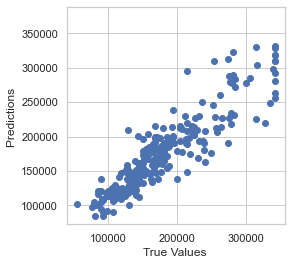

In [203]:
g=plt.scatter(Y_test, prediction1)
g.axes.set_xlabel('True Values ')
g.axes.set_ylabel('Predictions ')
g.axes.axis('equal')
g.axes.axis('square')

(40625.0, 356875.0, 54908.292578125, 371158.292578125)

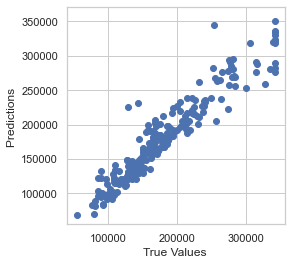

In [204]:
g=plt.scatter(Y_test, prediction2)
g.axes.set_xlabel('True Values ')
g.axes.set_ylabel('Predictions ')
g.axes.axis('equal')
g.axes.axis('square')

(40625.0, 356875.0, 72436.05259134105, 388686.0525913411)

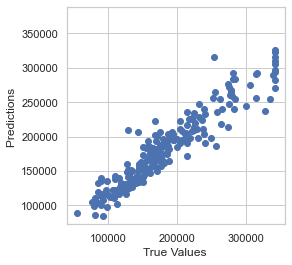

In [205]:
g=plt.scatter(Y_test, prediction3)
g.axes.set_xlabel('True Values ')
g.axes.set_ylabel('Predictions ')
g.axes.axis('equal')
g.axes.axis('square')

(40625.0, 356875.0, 98503.27418081327, 414753.2741808133)

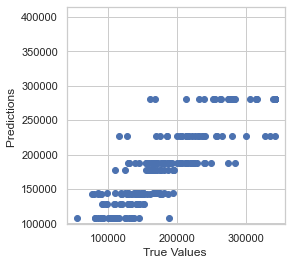

In [206]:
g=plt.scatter(Y_test, prediction4)
g.axes.set_xlabel('True Values ')
g.axes.set_ylabel('Predictions ')
g.axes.axis('equal')
g.axes.axis('square')

(40625.0, 356875.0, 60491.53157240084, 376741.5315724008)

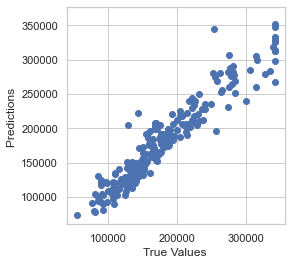

In [207]:
g=plt.scatter(Y_test, prediction5)
g.axes.set_xlabel('True Values ')
g.axes.set_ylabel('Predictions ')
g.axes.axis('equal')
g.axes.axis('square')

In [208]:
model5.fit(X_scaled_train,house_train_Y)

GradientBoostingRegressor(max_depth=4, min_samples_leaf=3, min_samples_split=5,
                          n_estimators=200)

**Both Gradient Boosting model and Random Forest have the minimun overfitting and standard deviation compared to all the other models with a good accuracy but Gradient Boosting usually perform better than random forest model**

In [209]:
#saving the model
House_pricing_Model= pickle.dumps(model5)

In [210]:
prediction_test=model5.predict(X_scaled_test)

In [211]:
prediction_test[0:10]

array([333982.87568897, 194697.61035704, 262561.33074611, 179411.87022286,
       228681.30408764,  75404.60934076, 128913.56441445, 302641.36068679,
       227542.71282785, 161950.741011  ])